In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

### 1. Read the data as an appropriate Time Series data and plot the data.

In [2]:
sparkling = pd.read_csv("Sparkling.csv")

In [3]:
sparkling.tail()

YearMonth  Sparkling
182   1995-03       1897
183   1995-04       1862
184   1995-05       1670
185   1995-06       1688
186   1995-07       2031

In [4]:
date = pd.date_range(start='1/1/1980', end='8/1/1995', freq='M')
date

DatetimeIndex(['1980-01-31', '1980-02-29', '1980-03-31', '1980-04-30',
               '1980-05-31', '1980-06-30', '1980-07-31', '1980-08-31',
               '1980-09-30', '1980-10-31',
               ...
               '1994-10-31', '1994-11-30', '1994-12-31', '1995-01-31',
               '1995-02-28', '1995-03-31', '1995-04-30', '1995-05-31',
               '1995-06-30', '1995-07-31'],
              dtype='datetime64[ns]', length=187, freq='M')

In [5]:
# Adding the time stamp to the data frame

sparkling['Time_Stamp'] = pd.DataFrame(date,columns=['Month'])

In [6]:
sparkling.head()

YearMonth  Sparkling Time_Stamp
0   1980-01       1686 1980-01-31
1   1980-02       1591 1980-02-29
2   1980-03       2304 1980-03-31
3   1980-04       1712 1980-04-30
4   1980-05       1471 1980-05-31

In [7]:
sparkling.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   YearMonth   187 non-null    object        
 1   Sparkling   187 non-null    int64         
 2   Time_Stamp  187 non-null    datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 4.5+ KB


In [8]:
sparkling.drop(['YearMonth'], axis=1, inplace=True)

In [9]:
sparkling.head()

Sparkling Time_Stamp
0       1686 1980-01-31
1       1591 1980-02-29
2       2304 1980-03-31
3       1712 1980-04-30
4       1471 1980-05-31

In [10]:
sparkling.isnull().sum()

Sparkling     0
Time_Stamp    0
dtype: int64

In [11]:
sparkling = sparkling.set_index('Time_Stamp')

In [12]:
sparkling.head()

Sparkling
Time_Stamp           
1980-01-31       1686
1980-02-29       1591
1980-03-31       2304
1980-04-30       1712
1980-05-31       1471

In [13]:
# The following code is to set the subsequent figure sizes

from pylab import rcParams
rcParams['figure.figsize'] = 20,8

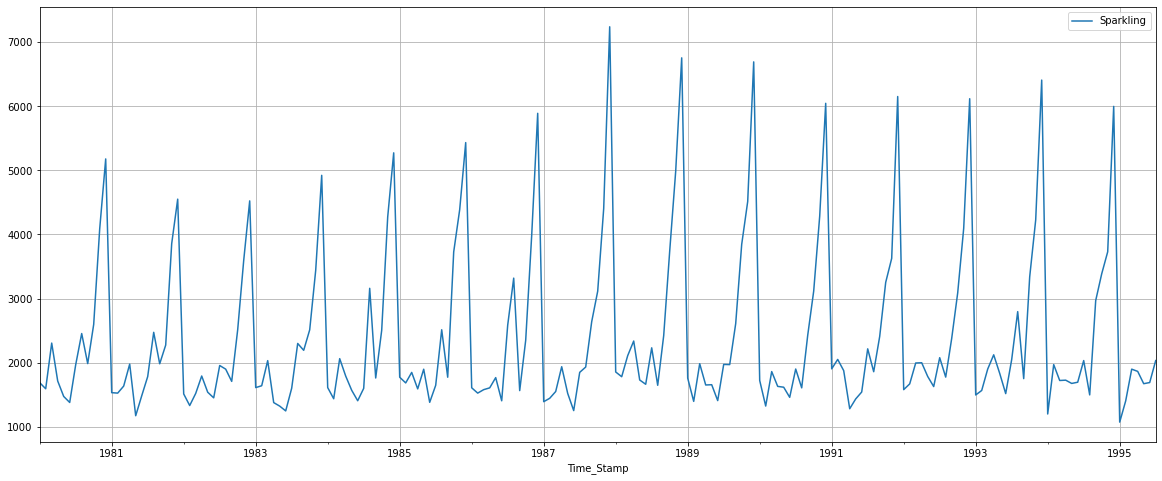

In [14]:
sparkling.plot()
plt.grid();

### 2. Perform appropriate Exploratory Data Analysis to understand the data and also perform decomposition.

In [15]:
sparkling.describe()

Sparkling
count   187.000000
mean   2402.417112
std    1295.111540
min    1070.000000
25%    1605.000000
50%    1874.000000
75%    2549.000000
max    7242.000000

### Yearly plot

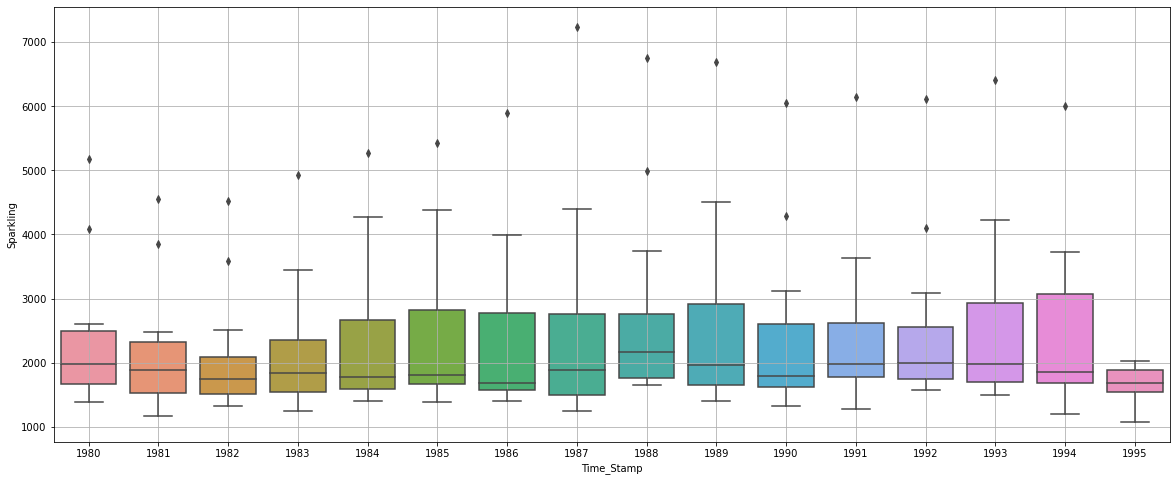

In [16]:
sns.boxplot(x = sparkling.index.year,y = sparkling['Sparkling']);
plt.grid();

### Montly plot

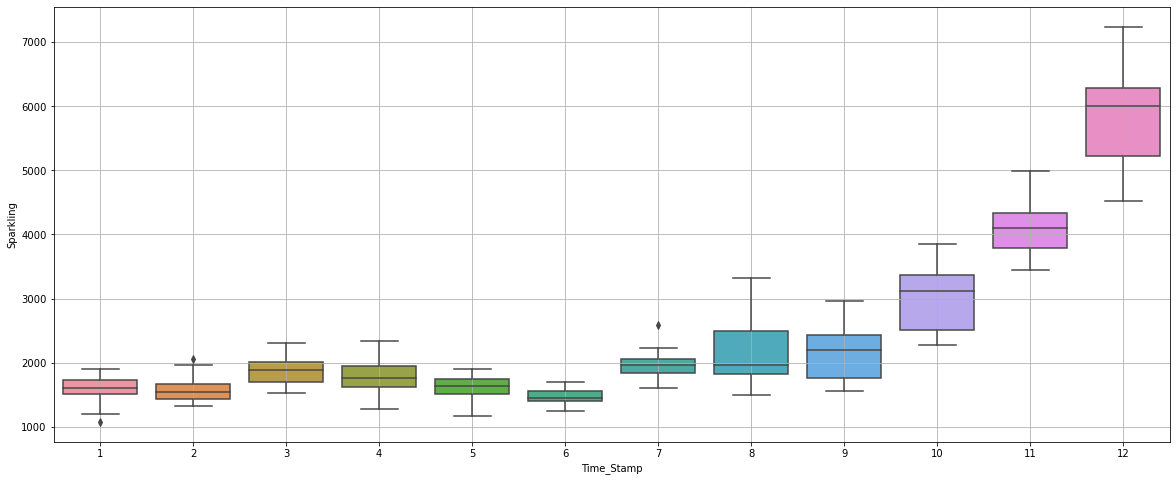

In [17]:
sns.boxplot(x = sparkling.index.month,y = sparkling['Sparkling'])
plt.grid();

### Plot a time series monthplot to understand the spread of sales across different years and within different months across years.

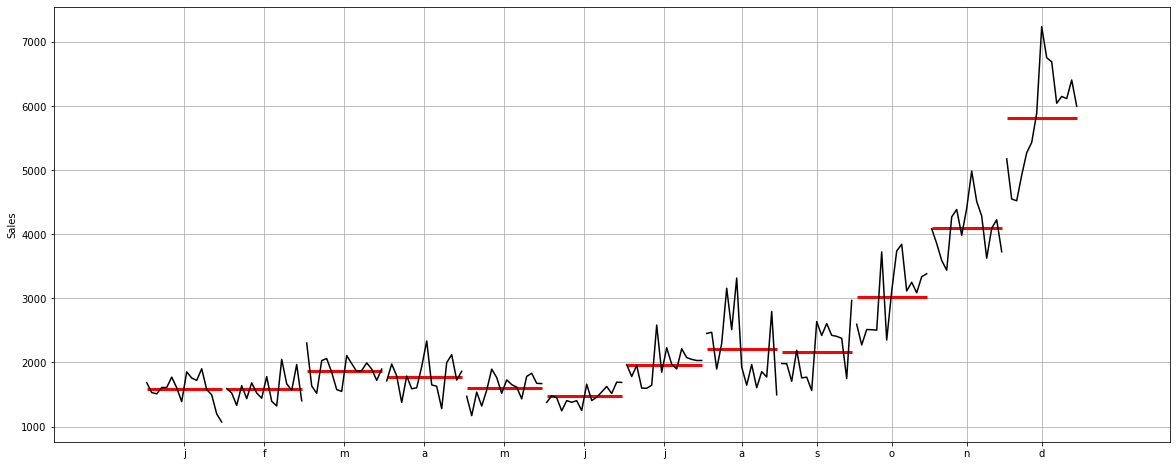

In [18]:
from statsmodels.graphics.tsaplots import month_plot

month_plot(sparkling['Sparkling'],ylabel='Sales')
plt.grid();

### Plot a graph of monthly RetailSales across years.

In [19]:
monthly_sales_across_years = pd.pivot_table(sparkling, values = 'Sparkling', columns = sparkling.index.month, index = sparkling.index.year)
monthly_sales_across_years

Time_Stamp      1       2       3       4       5       6       7       8   \
Time_Stamp                                                                   
1980        1686.0  1591.0  2304.0  1712.0  1471.0  1377.0  1966.0  2453.0   
1981        1530.0  1523.0  1633.0  1976.0  1170.0  1480.0  1781.0  2472.0   
1982        1510.0  1329.0  1518.0  1790.0  1537.0  1449.0  1954.0  1897.0   
1983        1609.0  1638.0  2030.0  1375.0  1320.0  1245.0  1600.0  2298.0   
1984        1609.0  1435.0  2061.0  1789.0  1567.0  1404.0  1597.0  3159.0   
1985        1771.0  1682.0  1846.0  1589.0  1896.0  1379.0  1645.0  2512.0   
1986        1606.0  1523.0  1577.0  1605.0  1765.0  1403.0  2584.0  3318.0   
1987        1389.0  1442.0  1548.0  1935.0  1518.0  1250.0  1847.0  1930.0   
1988        1853.0  1779.0  2108.0  2336.0  1728.0  1661.0  2230.0  1645.0   
1989        1757.0  1394.0  1982.0  1650.0  1654.0  1406.0  1971.0  1968.0   
1990        1720.0  1321.0  1859.0  1628.0  1615.0  1457.0  1899.0  1605.0   
1991        1902.0  2049.0  1874.0  1279.0  1432.0  1540.0  2214.0  1857.0   
1992        1577.0  1667.0  1993.0  1997.0  1783.0  1625.0  2076.0  1773.0   
1993        1494.0  1564.0  1898.0  2121.0  1831.0  1515.0  2048.0  2795.0   
1994        1197.0  1968.0  1720.0  1725.0  1674.0  1693.0  2031.0  1495.0   
1995        1070.0  1402.0  1897.0  1862.0  1670.0  1688.0  2031.0     NaN   

Time_Stamp      9       10      11      12  
Time_Stamp                                  
1980        1984.0  2596.0  4087.0  5179.0  
1981        1981.0  2273.0  3857.0  4551.0  
1982        1706.0  2514.0  3593.0  4524.0  
1983        2191.0  2511.0  3440.0  4923.0  
1984        1759.0  2504.0  4273.0  5274.0  
1985        1771.0  3727.0  4388.0  5434.0  
1986        1562.0  2349.0  3987.0  5891.0  
1987        2638.0  3114.0  4405.0  7242.0  
1988        2421.0  3740.0  4988.0  6757.0  
1989        2608.0  3845.0  4514.0  6694.0  
1990        2424.0  3116.0  4286.0  6047.0  
1991        2408.0  3252.0  3627.0  6153.0  
1992        2377.0  3088.0  4096.0  6119.0  
1993        1749.0  3339.0  4227.0  6410.0  
1994        2968.0  3385.0  3729.0  5999.0  
1995           NaN     NaN     NaN     NaN

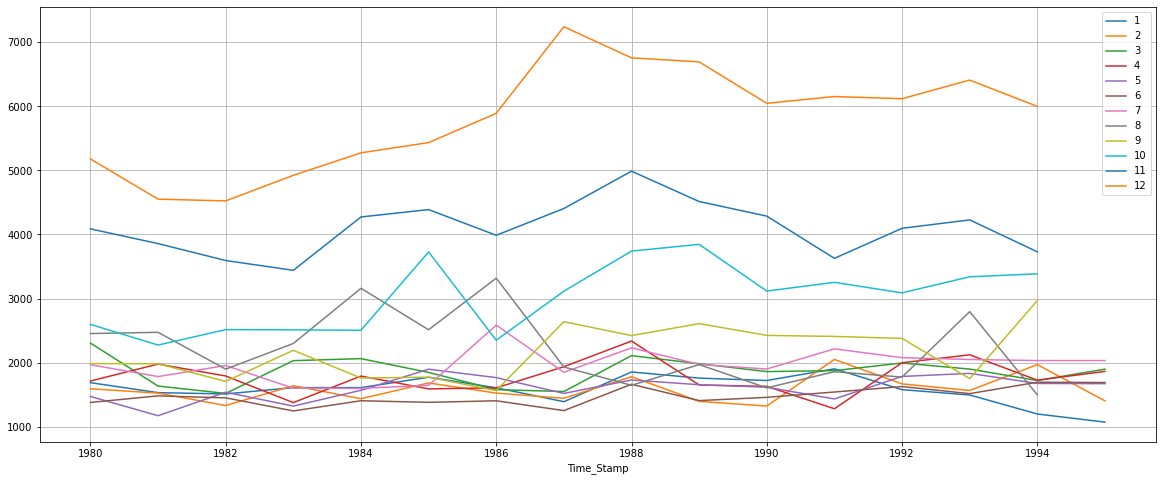

In [20]:
monthly_sales_across_years.plot()
plt.grid()
plt.legend(loc='best');

## Plot the Empirical Cumulative Distribution.

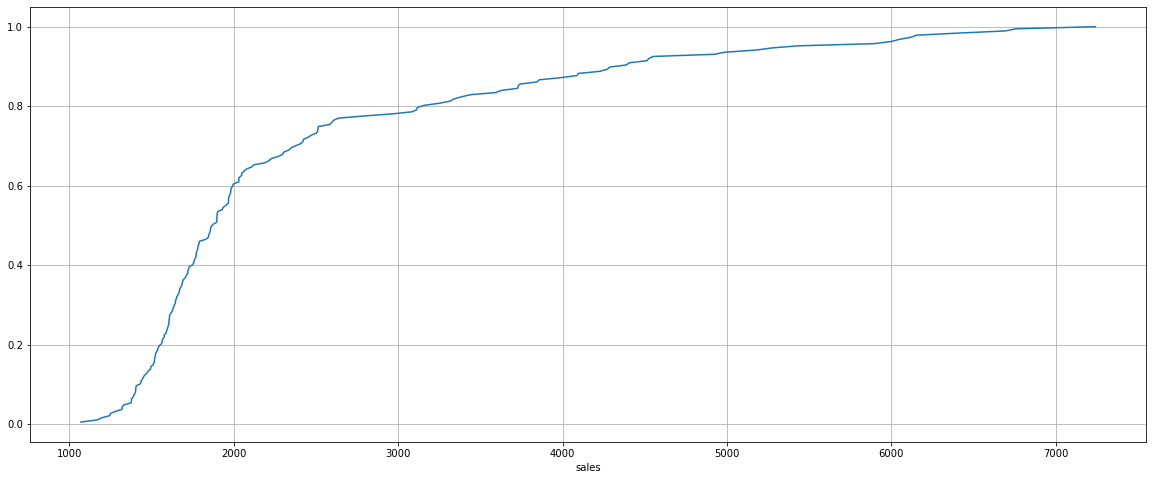

In [21]:
# statistics
from statsmodels.distributions.empirical_distribution import ECDF

plt.figure(figsize = (20, 8))
cdf = ECDF(sparkling['Sparkling'])
plt.plot(cdf.x, cdf.y, label = "statmodels");
plt.grid()
plt.xlabel('sales');

In [22]:
cdf.y

array([0.        , 0.00534759, 0.01069519, 0.01604278, 0.02139037,
       0.02673797, 0.03208556, 0.03743316, 0.04278075, 0.04812834,
       0.05347594, 0.05882353, 0.06417112, 0.06951872, 0.07486631,
       0.0802139 , 0.0855615 , 0.09090909, 0.09625668, 0.10160428,
       0.10695187, 0.11229947, 0.11764706, 0.12299465, 0.12834225,
       0.13368984, 0.13903743, 0.14438503, 0.14973262, 0.15508021,
       0.16042781, 0.1657754 , 0.17112299, 0.17647059, 0.18181818,
       0.18716578, 0.19251337, 0.19786096, 0.20320856, 0.20855615,
       0.21390374, 0.21925134, 0.22459893, 0.22994652, 0.23529412,
       0.24064171, 0.2459893 , 0.2513369 , 0.25668449, 0.26203209,
       0.26737968, 0.27272727, 0.27807487, 0.28342246, 0.28877005,
       0.29411765, 0.29946524, 0.30481283, 0.31016043, 0.31550802,
       0.32085561, 0.32620321, 0.3315508 , 0.3368984 , 0.34224599,
       0.34759358, 0.35294118, 0.35828877, 0.36363636, 0.36898396,
       0.37433155, 0.37967914, 0.38502674, 0.39037433, 0.39572

### Plot the average Sparkling sales per month and the month on month percentage change of Sparkling sales.

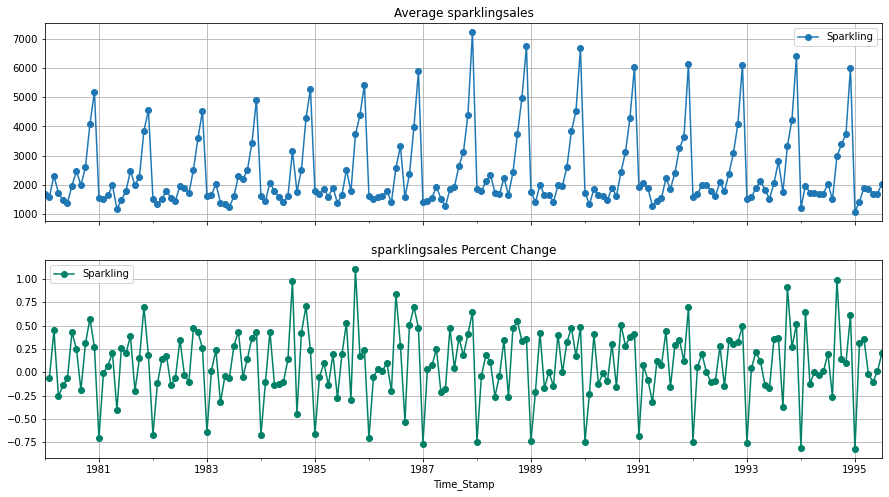

In [23]:
# group by date and get average RetailSales, and precent change
average    = sparkling.groupby(sparkling.index)["Sparkling"].mean()
pct_change = sparkling.groupby(sparkling.index)["Sparkling"].sum().pct_change()

fig, (axis1,axis2) = plt.subplots(2,1,sharex=True,figsize=(15,8))

# plot average RetailSales over time(year-month)
ax1 = average.plot(legend=True,ax=axis1,marker='o',title="Average sparklingsales",grid=True)
ax1.set_xticks(range(len(average)))
ax1.set_xticklabels(average.index.tolist())
# plot precent change for RetailSales over time(year-month)
ax2 = pct_change.plot(legend=True,ax=axis2,marker='o',colormap="summer",title="sparklingsales Percent Change",grid=True)

### Decomposition of time series

In [24]:
from statsmodels.tsa.seasonal import seasonal_decompose

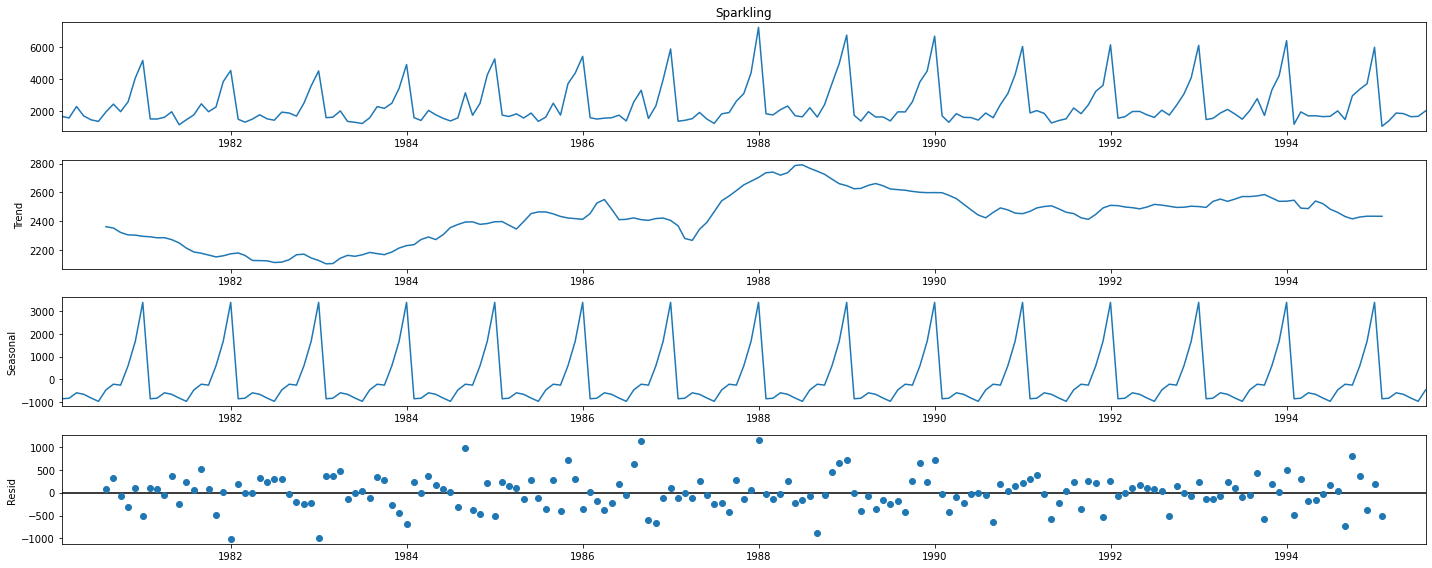

In [25]:
# Additive decomposition
decomposition = seasonal_decompose(sparkling['Sparkling'],model='additive')
decomposition.plot();

In [26]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 Time_Stamp
1980-01-31            NaN
1980-02-29            NaN
1980-03-31            NaN
1980-04-30            NaN
1980-05-31            NaN
1980-06-30            NaN
1980-07-31    2360.666667
1980-08-31    2351.333333
1980-09-30    2320.541667
1980-10-31    2303.583333
1980-11-30    2302.041667
1980-12-31    2293.791667
Name: trend, dtype: float64 

Seasonality 
 Time_Stamp
1980-01-31    -854.260599
1980-02-29    -830.350678
1980-03-31    -592.356630
1980-04-30    -658.490559
1980-05-31    -824.416154
1980-06-30    -967.434011
1980-07-31    -465.502265
1980-08-31    -214.332821
1980-09-30    -254.677265
1980-10-31     599.769957
1980-11-30    1675.067179
1980-12-31    3386.983846
Name: seasonal, dtype: float64 

Residual 
 Time_Stamp
1980-01-31           NaN
1980-02-29           NaN
1980-03-31           NaN
1980-04-30           NaN
1980-05-31           NaN
1980-06-30           NaN
1980-07-31     70.835599
1980-08-31    315.999487
1980-09-30    -81.864401
1980-10-31   -307.3532

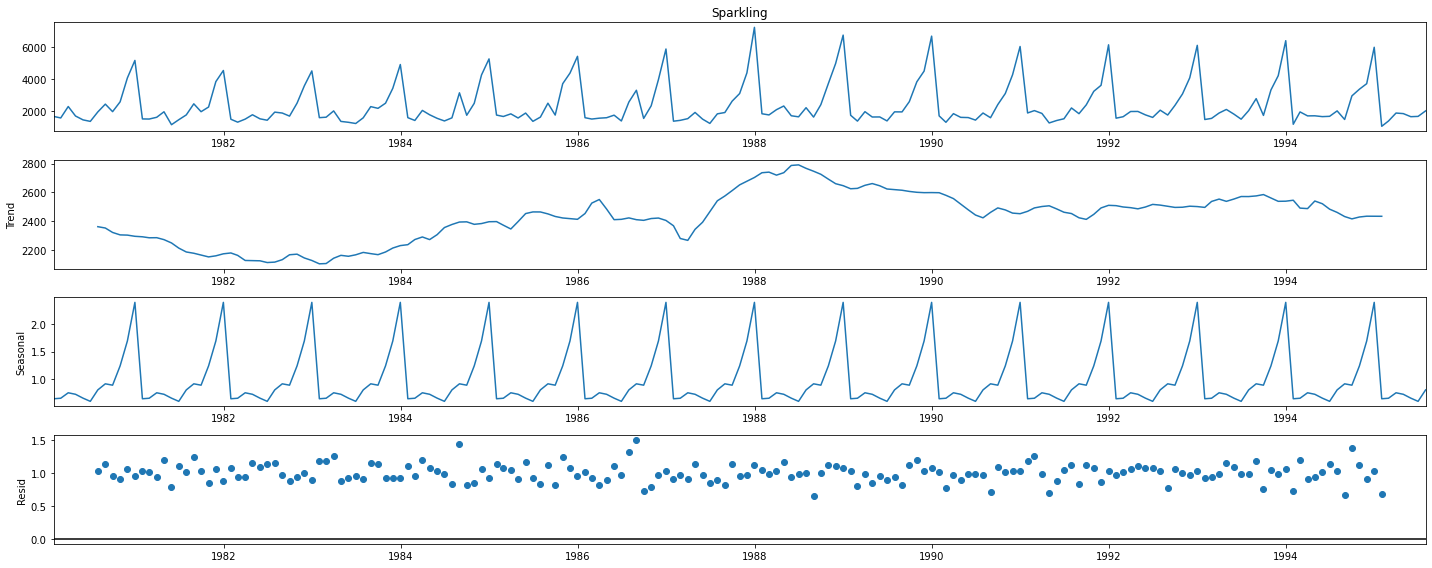

In [27]:
# Multiplicative decomposition
decomposition = seasonal_decompose(sparkling['Sparkling'],model='multiplicative')
decomposition.plot();

In [28]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 Time_Stamp
1980-01-31            NaN
1980-02-29            NaN
1980-03-31            NaN
1980-04-30            NaN
1980-05-31            NaN
1980-06-30            NaN
1980-07-31    2360.666667
1980-08-31    2351.333333
1980-09-30    2320.541667
1980-10-31    2303.583333
1980-11-30    2302.041667
1980-12-31    2293.791667
Name: trend, dtype: float64 

Seasonality 
 Time_Stamp
1980-01-31    0.649843
1980-02-29    0.659214
1980-03-31    0.757440
1980-04-30    0.730351
1980-05-31    0.660609
1980-06-30    0.603468
1980-07-31    0.809164
1980-08-31    0.918822
1980-09-30    0.894367
1980-10-31    1.241789
1980-11-30    1.690158
1980-12-31    2.384776
Name: seasonal, dtype: float64 

Residual 
 Time_Stamp
1980-01-31         NaN
1980-02-29         NaN
1980-03-31         NaN
1980-04-30         NaN
1980-05-31         NaN
1980-06-30         NaN
1980-07-31    1.029230
1980-08-31    1.135407
1980-09-30    0.955954
1980-10-31    0.907513
1980-11-30    1.050423
1980-12-31    0.946770
Name: r

### 3. Split the data into training and test. The test data should start in 1991.

In [29]:
train = sparkling[sparkling.index.year < 1991]
test = sparkling[sparkling.index.year >= 1991]

In [30]:
## This is to display multiple data frames from one cell
from IPython.display import display

In [31]:
print('First few rows of Training Data')
display(train.head())
print('Last few rows of Training Data')
display(train.tail())
print('First few rows of Test Data')
display(test.head())
print('Last few rows of Test Data')
display(test.tail())

First few rows of Training Data


Sparkling
Time_Stamp           
1980-01-31       1686
1980-02-29       1591
1980-03-31       2304
1980-04-30       1712
1980-05-31       1471

Last few rows of Training Data


Sparkling
Time_Stamp           
1990-08-31       1605
1990-09-30       2424
1990-10-31       3116
1990-11-30       4286
1990-12-31       6047

First few rows of Test Data


Sparkling
Time_Stamp           
1991-01-31       1902
1991-02-28       2049
1991-03-31       1874
1991-04-30       1279
1991-05-31       1432

Last few rows of Test Data


Sparkling
Time_Stamp           
1995-03-31       1897
1995-04-30       1862
1995-05-31       1670
1995-06-30       1688
1995-07-31       2031

In [32]:
print(train.shape)
print(test.shape)

(132, 1)
(55, 1)


### 4. Build all the exponential smoothing models on the training data and evaluate the model using RMSE on the test data. Other models such as regression,naïve forecast models and simple average models. should also be built on the training data and check the performance on the test data using RMSE.

### Model 1 - Linear Regression

In [33]:
train_time = [i+1 for i in range(len(train))]
test_time = [i+133 for i in range(len(test))]
print('Training Time instance','\n',train_time)
print('Test Time instance','\n',test_time)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132]
Test Time instance 
 [133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187]


In [34]:
LinearRegression_train = train.copy()
LinearRegression_test = test.copy()

In [35]:
LinearRegression_train['time'] = train_time
LinearRegression_test['time'] = test_time

print('First few rows of Training Data','\n',LinearRegression_train.head(),'\n')
print('Last few rows of Training Data','\n',LinearRegression_train.tail(),'\n')
print('First few rows of Test Data','\n',LinearRegression_test.head(),'\n')
print('Last few rows of Test Data','\n',LinearRegression_test.tail(),'\n')

First few rows of Training Data 
             Sparkling  time
Time_Stamp                 
1980-01-31       1686     1
1980-02-29       1591     2
1980-03-31       2304     3
1980-04-30       1712     4
1980-05-31       1471     5 

Last few rows of Training Data 
             Sparkling  time
Time_Stamp                 
1990-08-31       1605   128
1990-09-30       2424   129
1990-10-31       3116   130
1990-11-30       4286   131
1990-12-31       6047   132 

First few rows of Test Data 
             Sparkling  time
Time_Stamp                 
1991-01-31       1902   133
1991-02-28       2049   134
1991-03-31       1874   135
1991-04-30       1279   136
1991-05-31       1432   137 

Last few rows of Test Data 
             Sparkling  time
Time_Stamp                 
1995-03-31       1897   183
1995-04-30       1862   184
1995-05-31       1670   185
1995-06-30       1688   186
1995-07-31       2031   187 



In [36]:
from sklearn.linear_model import LinearRegression

In [37]:
lr = LinearRegression()

In [38]:
lr.fit(LinearRegression_train[['time']],LinearRegression_train['Sparkling'].values)

LinearRegression()

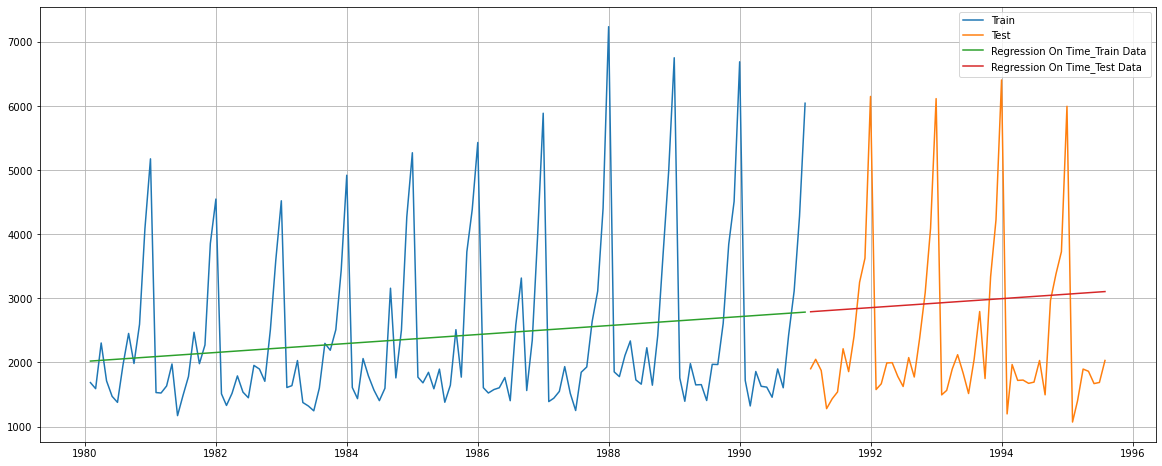

In [39]:
train_predictions_model1         = lr.predict(LinearRegression_train[['time']])
LinearRegression_train['RegOnTime'] = train_predictions_model1
test_predictions_model1         = lr.predict(LinearRegression_test[['time']])
LinearRegression_test['RegOnTime'] = test_predictions_model1

plt.figure(figsize=(20,8))
plt.plot( train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')
plt.plot(LinearRegression_train['RegOnTime'], label='Regression On Time_Train Data')
plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')
plt.legend(loc='best')
plt.grid();

### Model Evaluation

In [40]:
from sklearn import metrics

In [41]:
def MAPE(y, yhat):
    y, yhat = np.array(y),np.array(yhat)
    try:
        mape = round(np.sum(np.abs(yhat-y))/np.sum(y) * 100,2)
    except:
        print("Observed Values are empty")
        mape=np.nan
    return mape

In [42]:
import math
rmse = metrics.mean_squared_error(test['Sparkling'],test_predictions_model1)
math.sqrt(rmse)

1389.135174897992

In [43]:
## Train Data - RMSE and MAPE
rmse_model1_train = metrics.mean_squared_error(train['Sparkling'],train_predictions_model1,squared=False)
mape_model1_train = MAPE(train['Sparkling'],train_predictions_model1)
mape_model1_train

40.05

In [44]:
## Test Data - RMSE

rmse_model1_test = metrics.mean_squared_error(test['Sparkling'],test_predictions_model1,squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f" %(rmse_model1_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 1389.135


In [45]:
mape_model1_test = MAPE(test['Sparkling'],test_predictions_model1)
mape_model1_test

50.15

In [46]:
resultsDf = pd.DataFrame({'Test RMSE': [rmse_model1_test],'Test MAPE': [mape_model1_test]},index=['RegressionOnTime'])
resultsDf

Test RMSE  Test MAPE
RegressionOnTime  1389.135175      50.15

## Model 2: Naive Approach: $\hat{y}_{t+1} = y_t$

In [47]:
NaiveModel_train = train.copy()
NaiveModel_test = test.copy()

In [48]:
train.tail()

Sparkling
Time_Stamp           
1990-08-31       1605
1990-09-30       2424
1990-10-31       3116
1990-11-30       4286
1990-12-31       6047

In [49]:
NaiveModel_train['naive'] = np.asarray(train['Sparkling'])[len(np.asarray(train['Sparkling']))-1]
NaiveModel_train['naive'].head()

Time_Stamp
1980-01-31    6047
1980-02-29    6047
1980-03-31    6047
1980-04-30    6047
1980-05-31    6047
Name: naive, dtype: int64

In [50]:
NaiveModel_test['naive'] = np.asarray(train['Sparkling'])[len(np.asarray(train['Sparkling']))-1]
NaiveModel_test['naive'].head()

Time_Stamp
1991-01-31    6047
1991-02-28    6047
1991-03-31    6047
1991-04-30    6047
1991-05-31    6047
Name: naive, dtype: int64

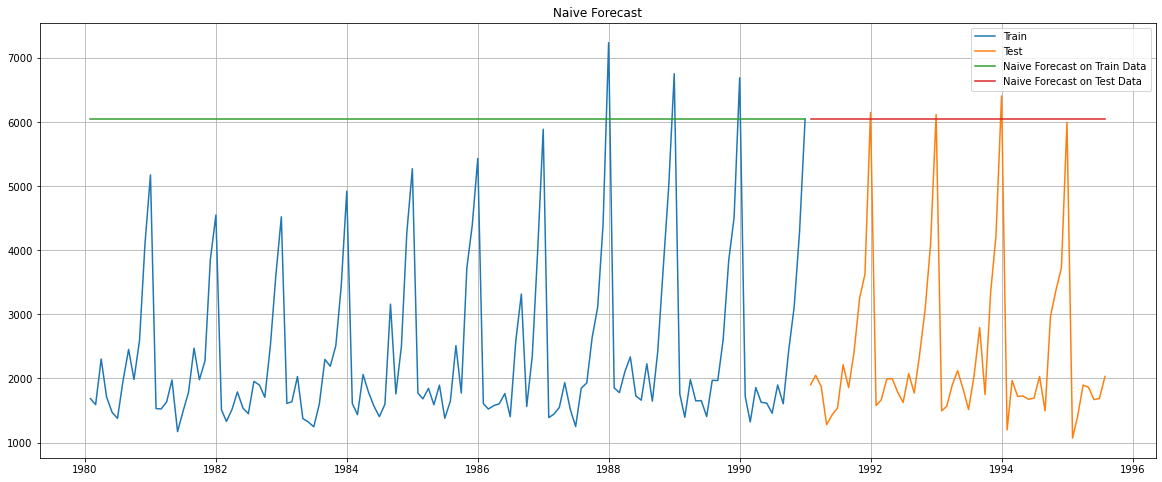

In [51]:
plt.figure(figsize=(20,8))
plt.plot(NaiveModel_train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')
plt.plot(NaiveModel_train['naive'], label='Naive Forecast on Train Data')
plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')
plt.legend(loc='best')
plt.title("Naive Forecast")
plt.grid();

### Model Evaluation

In [52]:
## Train Data - RMSE and MAPE

rmse_model2_train = metrics.mean_squared_error(train['Sparkling'],NaiveModel_train['naive'],squared=False)
mape_model2_train = MAPE(train['Sparkling'],NaiveModel_train['naive'])
rmse_model2_train, mape_model2_train

(3867.700801823254, 153.17)

In [53]:
## Test Data - RMSE

rmse_model2_test = metrics.mean_squared_error(test['Sparkling'],NaiveModel_test['naive'],squared=False)
mape_model2_test = MAPE(test['Sparkling'],NaiveModel_test['naive'])
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f" %(rmse_model2_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 3864.279


In [54]:
resultsDf_2 = pd.DataFrame({'Test RMSE': [rmse_model2_test],'Test MAPE': [mape_model2_test]},index=['NaiveModel'])

resultsDf = pd.concat([resultsDf, resultsDf_2])
resultsDf

Test RMSE  Test MAPE
RegressionOnTime  1389.135175      50.15
NaiveModel        3864.279352     152.87

## Method 3: Simple Average

In [55]:
SimpleAverage_train = train.copy()
SimpleAverage_test = test.copy()

In [56]:
SimpleAverage_train['mean_forecast'] = train['Sparkling'].mean()
SimpleAverage_train.head()

Sparkling  mean_forecast
Time_Stamp                          
1980-01-31       1686    2403.780303
1980-02-29       1591    2403.780303
1980-03-31       2304    2403.780303
1980-04-30       1712    2403.780303
1980-05-31       1471    2403.780303

In [57]:
SimpleAverage_test['mean_forecast'] = train['Sparkling'].mean()
SimpleAverage_test.head()

Sparkling  mean_forecast
Time_Stamp                          
1991-01-31       1902    2403.780303
1991-02-28       2049    2403.780303
1991-03-31       1874    2403.780303
1991-04-30       1279    2403.780303
1991-05-31       1432    2403.780303

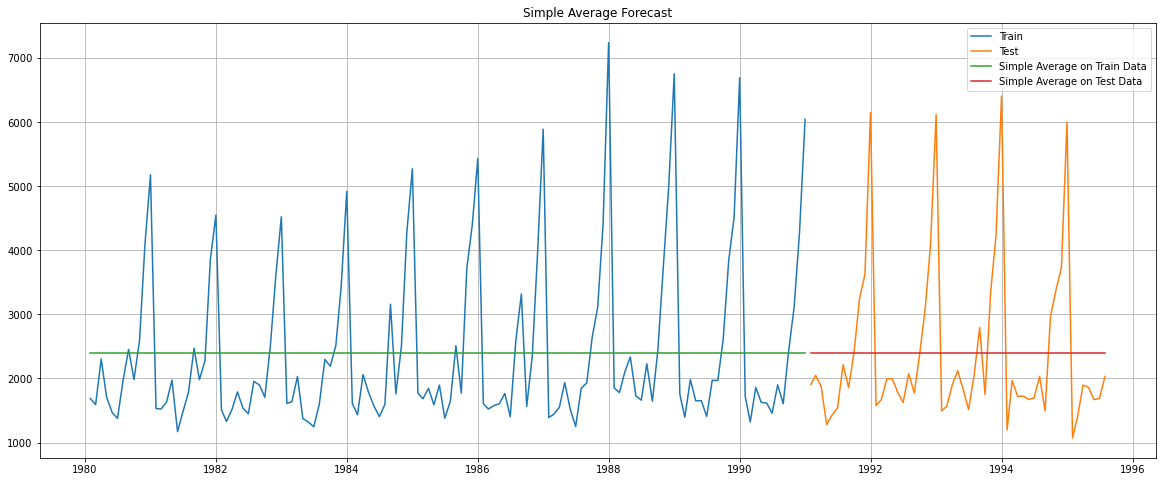

In [58]:
plt.figure(figsize=(20,8))
plt.plot(SimpleAverage_train['Sparkling'], label='Train')
plt.plot(SimpleAverage_test['Sparkling'], label='Test')
plt.plot(SimpleAverage_train['mean_forecast'], label='Simple Average on Train Data')
plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')
plt.legend(loc='best')
plt.title("Simple Average Forecast")
plt.grid();

### Model Evaluation

In [59]:
## Train and Test Data - RMSE  and MAPE

rmse_model3_train = metrics.mean_squared_error(train['Sparkling'],SimpleAverage_train['mean_forecast'],squared=False)
mape_model3_train = MAPE(train['Sparkling'],SimpleAverage_train['mean_forecast'])
rmse_model3_test = metrics.mean_squared_error(test['Sparkling'],SimpleAverage_test['mean_forecast'],squared=False)
mape_model3_test = MAPE(test['Sparkling'],SimpleAverage_test['mean_forecast'])


In [60]:
resultsDf_3 = pd.DataFrame({'Test RMSE': [rmse_model3_test],'Test MAPE': [mape_model3_test]},index=['SimpleAverageModel'])

resultsDf = pd.concat([resultsDf, resultsDf_3])
resultsDf

Test RMSE  Test MAPE
RegressionOnTime    1389.135175      50.15
NaiveModel          3864.279352     152.87
SimpleAverageModel  1275.081804      38.90

## Method 4: Moving Average(MA)

In [61]:
MovingAverage = sparkling.copy()
MovingAverage.head()

Sparkling
Time_Stamp           
1980-01-31       1686
1980-02-29       1591
1980-03-31       2304
1980-04-30       1712
1980-05-31       1471

In [62]:

MovingAverage['Trailing_2'] = MovingAverage['Sparkling'].rolling(2).mean()
MovingAverage['Trailing_4'] = MovingAverage['Sparkling'].rolling(4).mean()
MovingAverage['Trailing_6'] = MovingAverage['Sparkling'].rolling(6).mean()
MovingAverage['Trailing_9'] = MovingAverage['Sparkling'].rolling(9).mean()

MovingAverage.head(10)

Sparkling  Trailing_2  Trailing_4   Trailing_6   Trailing_9
Time_Stamp                                                             
1980-01-31       1686         NaN         NaN          NaN          NaN
1980-02-29       1591      1638.5         NaN          NaN          NaN
1980-03-31       2304      1947.5         NaN          NaN          NaN
1980-04-30       1712      2008.0     1823.25          NaN          NaN
1980-05-31       1471      1591.5     1769.50          NaN          NaN
1980-06-30       1377      1424.0     1716.00  1690.166667          NaN
1980-07-31       1966      1671.5     1631.50  1736.833333          NaN
1980-08-31       2453      2209.5     1816.75  1880.500000          NaN
1980-09-30       1984      2218.5     1945.00  1827.166667  1838.222222
1980-10-31       2596      2290.0     2249.75  1974.500000  1939.333333

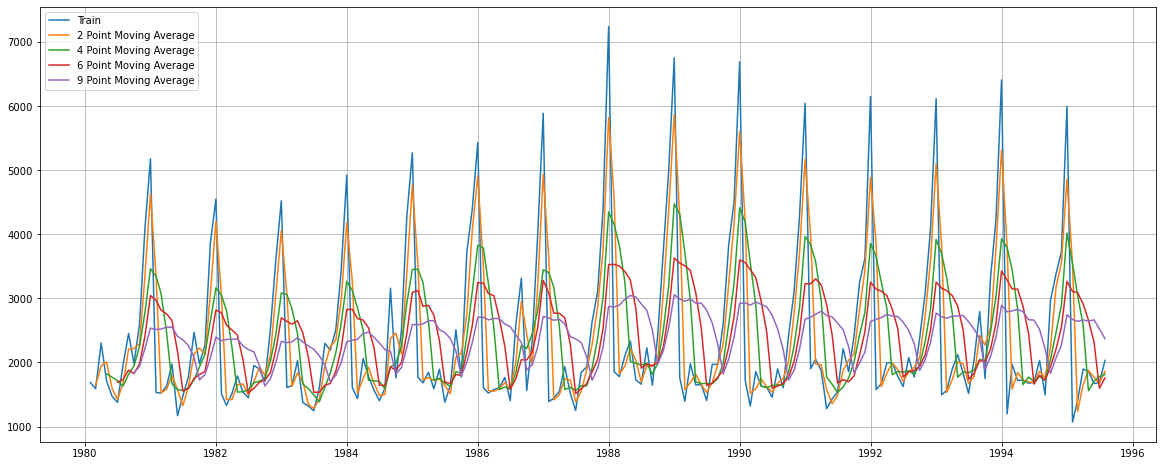

In [63]:
## Plotting on the whole data

plt.figure(figsize=(20,8))
plt.plot(MovingAverage['Sparkling'], label='Train')
plt.plot(MovingAverage['Trailing_2'], label='2 Point Moving Average')
plt.plot(MovingAverage['Trailing_4'], label='4 Point Moving Average')
plt.plot(MovingAverage['Trailing_6'],label = '6 Point Moving Average')
plt.plot(MovingAverage['Trailing_9'],label = '9 Point Moving Average')

plt.legend(loc = 'best')
plt.grid();

In [64]:
#Creating train and test set 
trailing_MovingAverage_train = MovingAverage[MovingAverage.index.year < 1991]
trailing_MovingAverage_test = MovingAverage[MovingAverage.index.year >= 1991]

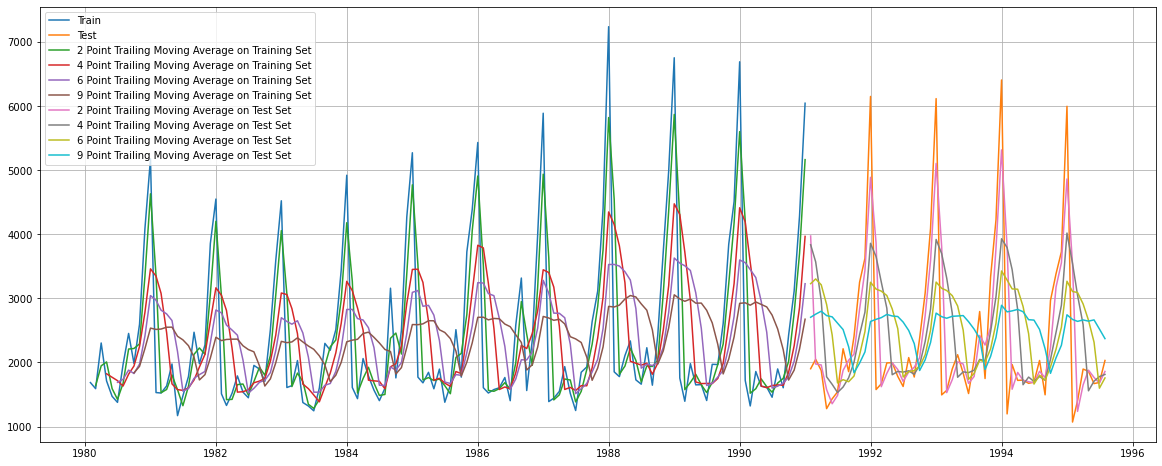

In [65]:
## Plotting on both the Training and Test data

plt.figure(figsize=(20,8))
plt.plot(trailing_MovingAverage_train['Sparkling'], label='Train')
plt.plot(trailing_MovingAverage_test['Sparkling'], label='Test')

plt.plot(trailing_MovingAverage_train['Trailing_2'], label='2 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_4'], label='4 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_6'],label = '6 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_9'],label = '9 Point Trailing Moving Average on Training Set')

plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_4'], label='4 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_6'],label = '6 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_9'],label = '9 Point Trailing Moving Average on Test Set')
plt.legend(loc = 'best')
plt.grid();

In [66]:
## Test Data - RMSE --> 2 point Trailing MA

rmse_model4_test_2 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Trailing_2'],squared=False)
mape_model4_test_2=MAPE(test['Sparkling'],trailing_MovingAverage_test['Trailing_2'])
print("For 2 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_2))

## Test Data - RMSE  --> 4 point Trailing MA


rmse_model4_test_4 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Trailing_4'],squared=False)
mape_model4_test_4=MAPE(test['Sparkling'],trailing_MovingAverage_test['Trailing_4'])
print("For 4 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_4))

## Test Data - RMSE --> 6 point Trailing MA


rmse_model4_test_6 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Trailing_6'],squared=False)
mape_model4_test_6=MAPE(test['Sparkling'],trailing_MovingAverage_test['Trailing_6'])
print("For 6 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_6))

## Test Data - RMSE  --> 9 point Trailing MA


rmse_model4_test_9 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Trailing_9'],squared=False)
mape_model4_test_9=MAPE(test['Sparkling'],trailing_MovingAverage_test['Trailing_9'])
print("For 9 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f " %(rmse_model4_test_9))

For 2 point Moving Average Model forecast on the Training Data,  RMSE is 813.401
For 4 point Moving Average Model forecast on the Training Data,  RMSE is 1156.590
For 6 point Moving Average Model forecast on the Training Data,  RMSE is 1283.927
For 9 point Moving Average Model forecast on the Training Data,  RMSE is 1346.278 


In [67]:
resultsDf_4 = pd.DataFrame({'Test RMSE': [rmse_model4_test_2,rmse_model4_test_4
                                          ,rmse_model4_test_6,rmse_model4_test_9],'Test MAPE': [mape_model4_test_2,mape_model4_test_4
                                          ,mape_model4_test_6,mape_model4_test_9]}
                           ,index=['2pointTrailingMovingAverage','4pointTrailingMovingAverage'
                                   ,'6pointTrailingMovingAverage','9pointTrailingMovingAverage'])

resultsDf = pd.concat([resultsDf, resultsDf_4])
resultsDf

Test RMSE  Test MAPE
RegressionOnTime             1389.135175      50.15
NaiveModel                   3864.279352     152.87
SimpleAverageModel           1275.081804      38.90
2pointTrailingMovingAverage   813.400684      19.70
4pointTrailingMovingAverage  1156.589694      35.96
6pointTrailingMovingAverage  1283.927428      43.86
9pointTrailingMovingAverage  1346.278315      46.86

## Before we go on to build the various Exponential Smoothing models, let us plot all the models and compare the Time Series plots.

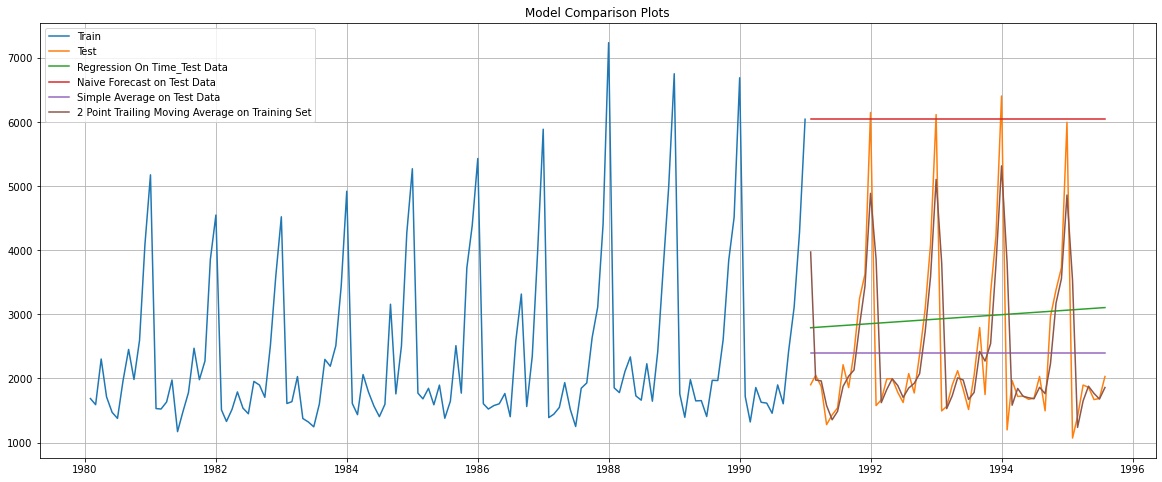

In [68]:
## Plotting on both Training and Test data

plt.figure(figsize=(20,8))
plt.plot(train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')

plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')

plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')

plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')

plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Training Set')


plt.legend(loc='best')
plt.title("Model Comparison Plots")
plt.grid();

## Method 5: Simple Exponential Smoothing

In [69]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [70]:
SES_train = train.copy()
SES_test = test.copy()

In [71]:
model_SES = SimpleExpSmoothing(SES_train['Sparkling'])

C:\Users\PAVAN KALYAN B\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


In [72]:
model_SES_autofit = model_SES.fit(optimized=True)

C:\Users\PAVAN KALYAN B\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [73]:
model_SES_autofit.params

{'smoothing_level': 0.04960659884563118,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 1818.5047543457245,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [74]:
SES_train.tail()

Sparkling
Time_Stamp           
1990-08-31       1605
1990-09-30       2424
1990-10-31       3116
1990-11-30       4286
1990-12-31       6047

In [75]:
SES_test['predict'] = model_SES_autofit.forecast(steps=len(test))
SES_test.head()

Sparkling      predict
Time_Stamp                        
1991-01-31       1902  2724.929339
1991-02-28       2049  2724.929339
1991-03-31       1874  2724.929339
1991-04-30       1279  2724.929339
1991-05-31       1432  2724.929339

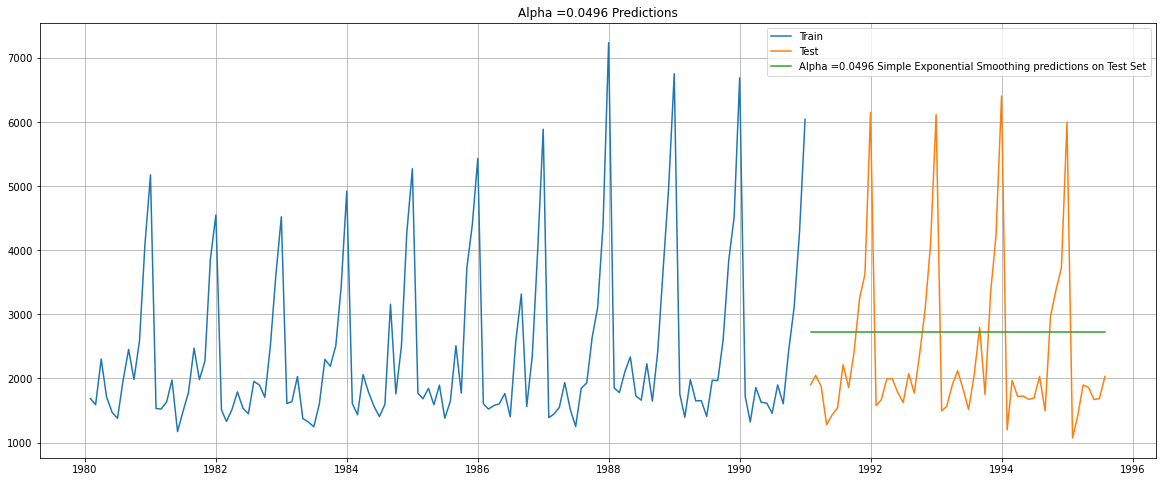

In [76]:
## Plotting on both the Training and Test data

plt.figure(figsize=(20,8))
plt.plot(SES_train['Sparkling'], label='Train')
plt.plot(SES_test['Sparkling'], label='Test')

plt.plot(SES_test['predict'], label='Alpha =0.0496 Simple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid() 
plt.title('Alpha =0.0496 Predictions');

### Model Evaluation for $\alpha$ = 0.0496 : Simple Exponential Smoothing

In [77]:
## Test Data

rmse_model5_test_1 = metrics.mean_squared_error(SES_test['Sparkling'],SES_test['predict'],squared=False)
mape_model5_test_1 = MAPE(SES_test['Sparkling'],SES_test['predict'])
print("For Alpha =0.0496 Simple Exponential Smoothing Model forecast on the Test Data, RMSE is %3.3f" %(rmse_model5_test_1))


For Alpha =0.0496 Simple Exponential Smoothing Model forecast on the Test Data, RMSE is 1316.035


In [78]:
resultsDf_5 = pd.DataFrame({'Test RMSE': [rmse_model5_test_1],'Test MAPE': [mape_model5_test_1]},index=['Alpha=0.0496,SimpleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_5])
resultsDf

Test RMSE  Test MAPE
RegressionOnTime                         1389.135175      50.15
NaiveModel                               3864.279352     152.87
SimpleAverageModel                       1275.081804      38.90
2pointTrailingMovingAverage               813.400684      19.70
4pointTrailingMovingAverage              1156.589694      35.96
6pointTrailingMovingAverage              1283.927428      43.86
9pointTrailingMovingAverage              1346.278315      46.86
Alpha=0.0496,SimpleExponentialSmoothing  1316.034674      45.47

In [79]:
## First we will define an empty dataframe to store our values from the loop

resultsDf_6 = pd.DataFrame({'Alpha Values':[],'Train RMSE':[],'Train MAPE':[],'Test RMSE': [],'Test MAPE': []})
resultsDf_6

Empty DataFrame
Columns: [Alpha Values, Train RMSE, Train MAPE, Test RMSE, Test MAPE]
Index: []

In [80]:
for i in np.arange(0.1,1,0.1):
    model_SES_alpha_i = model_SES.fit(smoothing_level=i,optimized=False,use_brute=True)
    SES_train['predict',i] = model_SES_alpha_i.fittedvalues
    SES_test['predict',i] = model_SES_alpha_i.forecast(len(test['Sparkling']))
    
    rmse_model5_train_i = metrics.mean_squared_error(SES_train['Sparkling'],SES_train['predict',i],squared=False)
    mape_model5_train_i = MAPE(SES_train['Sparkling'],SES_train['predict',i])
    
    rmse_model5_test_i = metrics.mean_squared_error(SES_test['Sparkling'],SES_test['predict',i],squared=False)
    mape_model5_test_i = MAPE(SES_test['Sparkling'],SES_test['predict',i])
    
    resultsDf_6 = resultsDf_6.append({'Alpha Values':i,'Train RMSE':rmse_model5_train_i 
                                      ,'Train MAPE':mape_model5_train_i
                                      ,'Test RMSE':rmse_model5_test_i
                                      ,'Test MAPE':mape_model5_test_i }, ignore_index=True)

## Model Evaluation

In [81]:
resultsDf_6.sort_values(by=['Test MAPE'])

Alpha Values   Train RMSE  Train MAPE    Test RMSE  Test MAPE
0           0.1  1333.873836       42.03  1375.393398      49.53
1           0.2  1356.042987       43.79  1595.206839      60.46
2           0.3  1359.511747       43.73  1935.507132      75.66
3           0.4  1352.588879       42.75  2311.919615      91.55
4           0.5  1344.004369       41.16  2666.351413     106.27
5           0.6  1338.805381       39.80  2979.204388     118.77
6           0.7  1338.844308       38.55  3249.944092     129.34
7           0.8  1344.462091       37.60  3483.801006     138.34
8           0.9  1355.723518       36.79  3686.794285     146.08

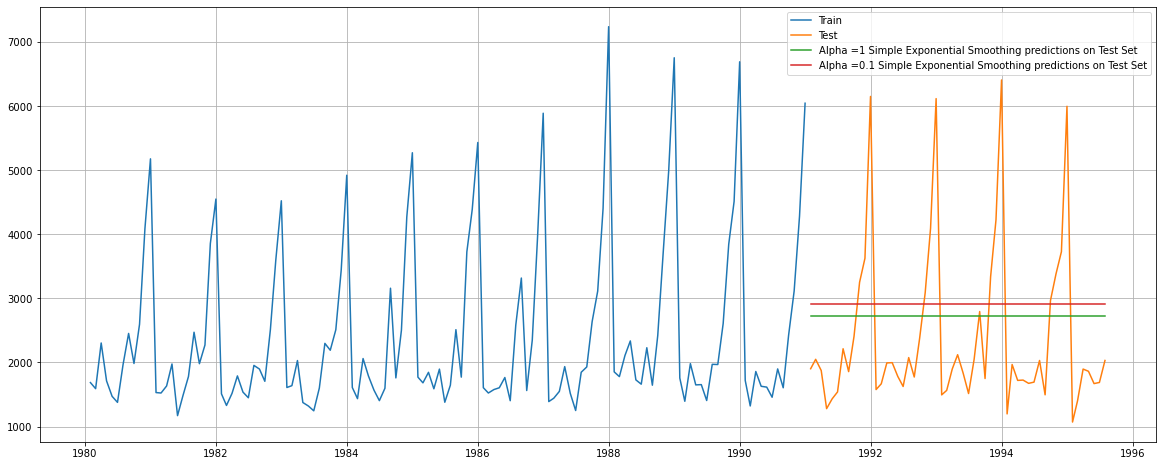

In [82]:
## Plotting on both the Training and Test data

plt.figure(figsize=(20,8))
plt.plot(SES_train['Sparkling'], label='Train')
plt.plot(SES_test['Sparkling'], label='Test')

plt.plot(SES_test['predict'], label='Alpha =1 Simple Exponential Smoothing predictions on Test Set')

plt.plot(SES_test['predict', 0.1], label='Alpha =0.1 Simple Exponential Smoothing predictions on Test Set')



plt.legend(loc='best')
plt.grid();

In [83]:
resultsDf_6_1 = pd.DataFrame({'Test RMSE': [resultsDf_6['Test RMSE'][1],resultsDf_6['Test RMSE'][2]]
                             ,'Test MAPE': [resultsDf_6['Test MAPE'][1],resultsDf_6['Test MAPE'][2]]}
                           ,index=['Alpha=0.1,SimpleExponentialSmoothing','Alpha=0.2,SimpleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_6_1])
resultsDf

Test RMSE  Test MAPE
RegressionOnTime                         1389.135175      50.15
NaiveModel                               3864.279352     152.87
SimpleAverageModel                       1275.081804      38.90
2pointTrailingMovingAverage               813.400684      19.70
4pointTrailingMovingAverage              1156.589694      35.96
6pointTrailingMovingAverage              1283.927428      43.86
9pointTrailingMovingAverage              1346.278315      46.86
Alpha=0.0496,SimpleExponentialSmoothing  1316.034674      45.47
Alpha=0.1,SimpleExponentialSmoothing     1595.206839      60.46
Alpha=0.2,SimpleExponentialSmoothing     1935.507132      75.66

## Method 6: Double Exponential Smoothing (Holt's Model)

##### Two parameters $\alpha$ and $\beta$ are estimated in this model. Level and Trend are accounted for in this model.

In [84]:
DES_train = train.copy()
DES_test = test.copy()

In [85]:
model_DES = Holt(DES_train['Sparkling'])

C:\Users\PAVAN KALYAN B\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


In [86]:
model_DES_autofit = model_DES.fit()

C:\Users\PAVAN KALYAN B\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [87]:
model_DES_autofit.params

{'smoothing_level': 0.6885714285714285,
 'smoothing_trend': 9.999999999999999e-05,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 1686.0,
 'initial_trend': -95.0,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [88]:
DES_train.tail()

Sparkling
Time_Stamp           
1990-08-31       1605
1990-09-30       2424
1990-10-31       3116
1990-11-30       4286
1990-12-31       6047

In [89]:
DES_test['predict'] = model_DES_autofit.forecast(steps=len(test))
DES_test.head()

Sparkling      predict
Time_Stamp                        
1991-01-31       1902  5221.278699
1991-02-28       2049  5127.886554
1991-03-31       1874  5034.494409
1991-04-30       1279  4941.102264
1991-05-31       1432  4847.710119

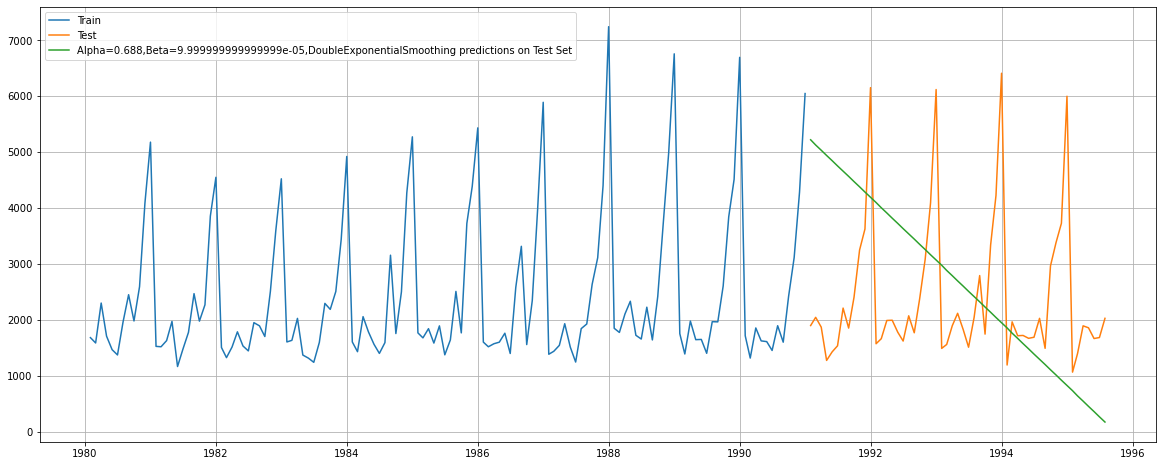

In [90]:
## Plotting on both the Training and Test using autofit

plt.figure(figsize=(20,8))
plt.plot(DES_train['Sparkling'], label='Train')
plt.plot(DES_test['Sparkling'], label='Test')

plt.plot(DES_test['predict'], label='Alpha=0.688,Beta=9.999999999999999e-05,DoubleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

### Model Evaluation for $\alpha$ = 0.0496, $\beta$ =9.999999999999999e-05: Double Exponential Smoothing

In [91]:
## Test Data

rmse_model6_test_1 = metrics.mean_squared_error(DES_test['Sparkling'],DES_test['predict'],squared=False)
mape_model6_test_1 = MAPE(DES_test['Sparkling'],DES_test['predict'])
print("For Alpha =0.0496,Beta=9.999999999999999e-05 Double Exponential Smoothing Model forecast on the Test Data, RMSE is %3.3f" %(rmse_model6_test_1))



For Alpha =0.0496,Beta=9.999999999999999e-05 Double Exponential Smoothing Model forecast on the Test Data, RMSE is 2007.239


In [92]:
resultsDf_7 = pd.DataFrame({'Test RMSE': [rmse_model6_test_1],'Test MAPE': [mape_model6_test_1]},index=['Alpha =0.0496,Beta=9.999999999999999e-05 Double Exponential Smoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_7])
resultsDf

Test RMSE  Test MAPE
RegressionOnTime                                    1389.135175      50.15
NaiveModel                                          3864.279352     152.87
SimpleAverageModel                                  1275.081804      38.90
2pointTrailingMovingAverage                          813.400684      19.70
4pointTrailingMovingAverage                         1156.589694      35.96
6pointTrailingMovingAverage                         1283.927428      43.86
9pointTrailingMovingAverage                         1346.278315      46.86
Alpha=0.0496,SimpleExponentialSmoothing             1316.034674      45.47
Alpha=0.1,SimpleExponentialSmoothing                1595.206839      60.46
Alpha=0.2,SimpleExponentialSmoothing                1935.507132      75.66
Alpha =0.0496,Beta=9.999999999999999e-05 Double...  2007.238526      68.23

In [93]:
## First we will define an empty dataframe to store our values from the loop

resultsDf_7 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Train RMSE':[],'Train MAPE':[],'Test RMSE': [],'Test MAPE':[]})
resultsDf_7

Empty DataFrame
Columns: [Alpha Values, Beta Values, Train RMSE, Train MAPE, Test RMSE, Test MAPE]
Index: []

In [94]:
for i in np.arange(0.1,1.1,0.1):
    for j in np.arange(0.1,1.1,0.1):
        model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_trend=j,optimized=False,use_brute=True)
        DES_train['predict',i,j] = model_DES_alpha_i_j.fittedvalues
        DES_test['predict',i,j] = model_DES_alpha_i_j.forecast(len(test['Sparkling']))
        
        rmse_model6_train = metrics.mean_squared_error(DES_train['Sparkling'],DES_train['predict',i,j],squared=False)
        mape_model6_train = MAPE(DES_train['Sparkling'],DES_train['predict',i,j])
        
        rmse_model6_test = metrics.mean_squared_error(DES_test['Sparkling'],DES_test['predict',i,j],squared=False)
        mape_model6_test = MAPE(DES_test['Sparkling'],DES_test['predict',i,j])
        resultsDf_7 = resultsDf_7.append({'Alpha Values':i,'Beta Values':j,'Train RMSE':rmse_model6_train, 'Train MAPE':mape_model6_train,
                                          'Test RMSE':rmse_model6_test,'Test MAPE':mape_model6_test}, ignore_index=True)

In [95]:
resultsDf_7

Alpha Values  Beta Values   Train RMSE  Train MAPE     Test RMSE  \
0            0.1          0.1  1382.520870       44.37   1778.564670   
1            0.1          0.2  1413.598835       46.14   2599.439986   
2            0.1          0.3  1445.762015       47.43   4293.084674   
3            0.1          0.4  1480.897776       48.79   6039.537339   
4            0.1          0.5  1521.108657       50.34   7390.522201   
..           ...          ...          ...         ...           ...   
95           1.0          0.6  1753.402326       45.75  49327.087977   
96           1.0          0.7  1825.187155       47.97  52655.765663   
97           1.0          0.8  1902.013709       50.11  55442.273880   
98           1.0          0.9  1985.368445       52.03  57823.177011   
99           1.0          1.0  2077.672157       53.81  59877.076519   

    Test MAPE  
0       67.20  
1       95.43  
2      155.43  
3      218.98  
4      267.94  
..        ...  
95    1824.42  
96    1945.23  
97    2046.36  
98    2132.75  
99    2207.28  

[100 rows x 6 columns]

In [96]:
resultsDf_7.sort_values(by=['Test MAPE']).head(10)

Alpha Values  Beta Values   Train RMSE  Train MAPE    Test RMSE  Test MAPE
0            0.1          0.1  1382.520870       44.37  1778.564670      67.20
1            0.1          0.2  1413.598835       46.14  2599.439986      95.43
10           0.2          0.1  1418.041591       46.65  3611.763322     135.41
2            0.1          0.3  1445.762015       47.43  4293.084674     155.43
3            0.1          0.4  1480.897776       48.79  6039.537339     218.98
20           0.3          0.1  1431.169601       46.99  5908.185554     223.50
11           0.2          0.2  1479.304667       49.34  6878.568717     254.38
4            0.1          0.5  1521.108657       50.34  7390.522201     267.94
30           0.4          0.1  1424.267932       45.50  8039.101904     305.92
5            0.1          0.6  1567.435801       52.07  8549.257632     309.05

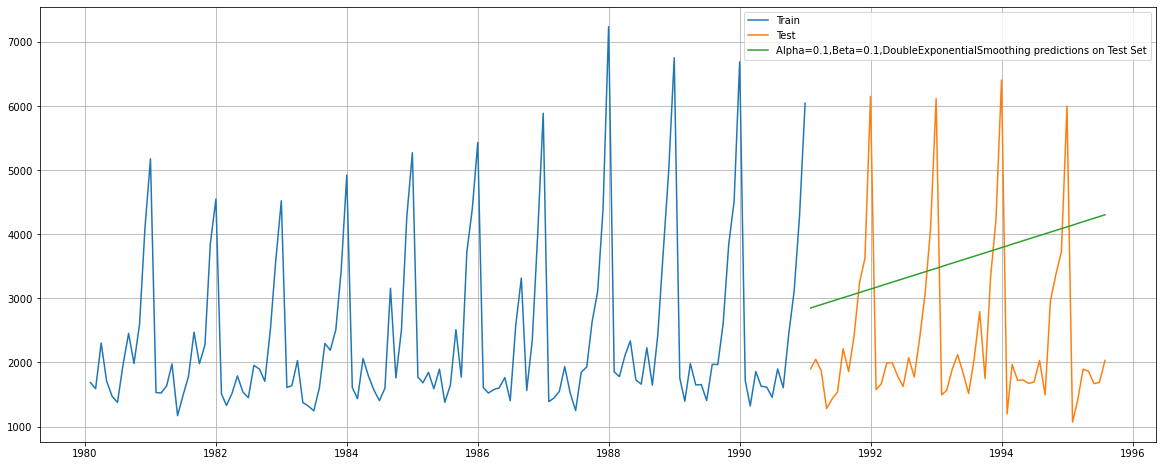

In [97]:
## Plotting on both the Training and Test data

plt.figure(figsize=(20,8))
plt.plot(DES_train['Sparkling'], label='Train')
plt.plot(DES_test['Sparkling'], label='Test')

plt.plot(DES_test['predict', 0.1, 0.1], label='Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

In [98]:
resultsDf_7_1 = pd.DataFrame({'Test RMSE': [resultsDf_7['Test RMSE'][0]],'Test MAPE': [resultsDf_7['Test MAPE'][0]]}
                           ,index=['Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_7_1])
resultsDf

Test RMSE  Test MAPE
RegressionOnTime                                    1389.135175      50.15
NaiveModel                                          3864.279352     152.87
SimpleAverageModel                                  1275.081804      38.90
2pointTrailingMovingAverage                          813.400684      19.70
4pointTrailingMovingAverage                         1156.589694      35.96
6pointTrailingMovingAverage                         1283.927428      43.86
9pointTrailingMovingAverage                         1346.278315      46.86
Alpha=0.0496,SimpleExponentialSmoothing             1316.034674      45.47
Alpha=0.1,SimpleExponentialSmoothing                1595.206839      60.46
Alpha=0.2,SimpleExponentialSmoothing                1935.507132      75.66
Alpha =0.0496,Beta=9.999999999999999e-05 Double...  2007.238526      68.23
Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing       1778.564670      67.20

## Method 7: Triple Exponential Smoothing (Holt - Winter's Model)

##### Three parameters $\alpha$, $\beta$ and $\gamma$ are estimated in this model. Level, Trend and Seasonality are accounted for in this model.

In [99]:
TES_train = train.copy()
TES_test = test.copy()

In [100]:
model_TES = ExponentialSmoothing(TES_train['Sparkling'],trend='additive',seasonal='additive',freq='M')

In [101]:
model_TES_autofit = model_TES.fit()

In [102]:
model_TES_autofit.params

{'smoothing_level': 0.11251389383851898,
 'smoothing_trend': 0.037513905124479975,
 'smoothing_seasonal': 0.493687892134789,
 'damping_trend': nan,
 'initial_level': 1640.1903994601003,
 'initial_trend': -2.883527455748493,
 'initial_seasons': array([  45.90357842,  -48.98920376,  662.93554561,   72.68953516,
        -168.88494907, -262.45259553,  326.06601139,  813.23429222,
         344.33124094,  956.08513572, 2446.81371315, 3538.45996852]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [103]:
## Prediction on the test data

TES_test['auto_predict'] = model_TES_autofit.forecast(steps=len(test))
TES_test.head()

Sparkling  auto_predict
Time_Stamp                         
1991-01-31       1902   1474.614638
1991-02-28       2049   1169.444327
1991-03-31       1874   1658.498607
1991-04-30       1279   1504.366522
1991-05-31       1432   1417.164025

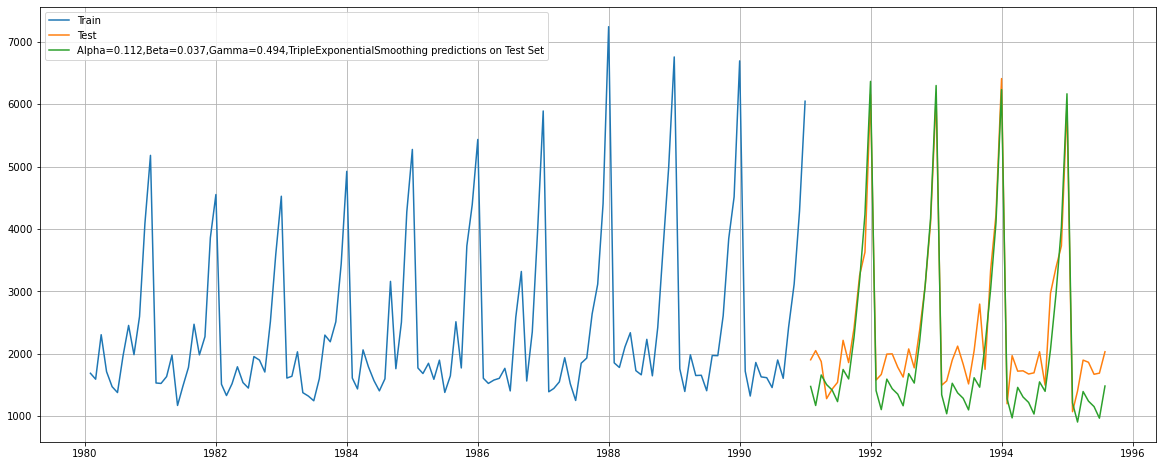

In [104]:
## Plotting on both the Training and Test using autofit

plt.figure(figsize=(20,8))
plt.plot(TES_train['Sparkling'], label='Train')
plt.plot(TES_test['Sparkling'], label='Test')

plt.plot(TES_test['auto_predict'], label='Alpha=0.112,Beta=0.037,Gamma=0.494,TripleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

In [105]:
## Test Data

rmse_model7_test_1 = metrics.mean_squared_error(TES_test['Sparkling'],TES_test['auto_predict'],squared=False)
mape_model7_test_1=MAPE(TES_test['Sparkling'],TES_test['auto_predict'])
print("For Alpha=0.112,Beta=0.037,Gamma=0.494,TripleExponentialSmoothing Model forecast on the Test Data,  RMSE is %3.3f" %(rmse_model7_test_1))

For Alpha=0.112,Beta=0.037,Gamma=0.494,TripleExponentialSmoothing Model forecast on the Test Data,  RMSE is 473.954


In [106]:
resultsDf_8_1 = pd.DataFrame({'Test RMSE': [rmse_model6_test_1],'Test MAPE': [mape_model6_test_1]}
                           ,index=['Alpha=0.112,Beta=0.037,Gamma=0.494,TripleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_8_1])
resultsDf

Test RMSE  Test MAPE
RegressionOnTime                                    1389.135175      50.15
NaiveModel                                          3864.279352     152.87
SimpleAverageModel                                  1275.081804      38.90
2pointTrailingMovingAverage                          813.400684      19.70
4pointTrailingMovingAverage                         1156.589694      35.96
6pointTrailingMovingAverage                         1283.927428      43.86
9pointTrailingMovingAverage                         1346.278315      46.86
Alpha=0.0496,SimpleExponentialSmoothing             1316.034674      45.47
Alpha=0.1,SimpleExponentialSmoothing                1595.206839      60.46
Alpha=0.2,SimpleExponentialSmoothing                1935.507132      75.66
Alpha =0.0496,Beta=9.999999999999999e-05 Double...  2007.238526      68.23
Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing       1778.564670      67.20
Alpha=0.112,Beta=0.037,Gamma=0.494,TripleExpone...  2007.238526      68.23

In [107]:
## First we will define an empty dataframe to store our values from the loop

resultsDf_8_2 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Gamma Values':[],'Train RMSE':[],'Train MAPE':[],'Test RMSE': [], 'Test MAPE':[]})
resultsDf_8_2

Empty DataFrame
Columns: [Alpha Values, Beta Values, Gamma Values, Train RMSE, Train MAPE, Test RMSE, Test MAPE]
Index: []

In [108]:
for i in np.arange(0.1,1,0.1):
    for j in np.arange(0.1,1,0.1):
        for k in np.arange(0.1,1,0.1):
            model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_trend=j,smoothing_seasonal=k,optimized=False,use_brute=True)
            TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
            TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(len(test['Sparkling']))
        
            rmse_model8_train = metrics.mean_squared_error(TES_train['Sparkling'],TES_train['predict',i,j,k],squared=False)
            mape_model8_train = MAPE(TES_train['Sparkling'],TES_train['predict',i,j,k])
            rmse_model8_test = metrics.mean_squared_error(TES_test['Sparkling'],TES_test['predict',i,j,k],squared=False)
            mape_model8_test = MAPE(TES_test['Sparkling'],TES_test['predict',i,j,k])
            
            resultsDf_8_2 = resultsDf_8_2.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,
                                                  'Train RMSE':rmse_model8_train,'Train MAPE':mape_model8_train,'Test RMSE':rmse_model8_test,'Test MAPE':mape_model8_test}
                                                 , ignore_index=True)

In [109]:
resultsDf_8_2

Alpha Values  Beta Values  Gamma Values    Train RMSE  Train MAPE  \
0             0.1          0.1           0.1    425.094821       12.94   
1             0.1          0.1           0.2    401.522221       12.10   
2             0.1          0.1           0.3    387.303366       11.70   
3             0.1          0.1           0.4    380.278116       11.41   
4             0.1          0.1           0.5    378.710709       11.21   
..            ...          ...           ...           ...         ...   
724           0.9          0.9           0.5   1556.994488       45.44   
725           0.9          0.9           0.6   2615.768162       71.50   
726           0.9          0.9           0.7   4705.776470      115.53   
727           0.9          0.9           0.8   9649.268921      224.98   
728           0.9          0.9           0.9  22351.884946      451.53   

        Test RMSE  Test MAPE  
0    5.200117e+02      18.27  
1    6.398682e+02      22.90  
2    7.427758e+02      26.92  
3    8.077458e+02      29.33  
4    8.409400e+02      30.51  
..            ...        ...  
724  6.427493e+04    2328.43  
725  2.032929e+04     711.43  
726  2.824120e+05   10369.52  
727  1.025562e+06   37463.64  
728  1.898276e+06   69121.21  

[729 rows x 7 columns]

In [110]:
resultsDf_8_2 = resultsDf_8_2.sort_values(by=['Test MAPE']).head()
resultsDf_8_2

Alpha Values  Beta Values  Gamma Values  Train RMSE  Train MAPE  \
77            0.1          0.9           0.6  438.525019       13.46   
90            0.2          0.2           0.1  452.507225       13.62   
27            0.1          0.4           0.1  447.900255       13.12   
162           0.3          0.1           0.1  452.346765       13.55   
244           0.4          0.1           0.2  441.242988       13.11   

      Test RMSE  Test MAPE  
77   338.458417       9.93  
90   343.715412      11.06  
27   346.302722      11.50  
162  372.390945      11.73  
244  365.192054      12.45

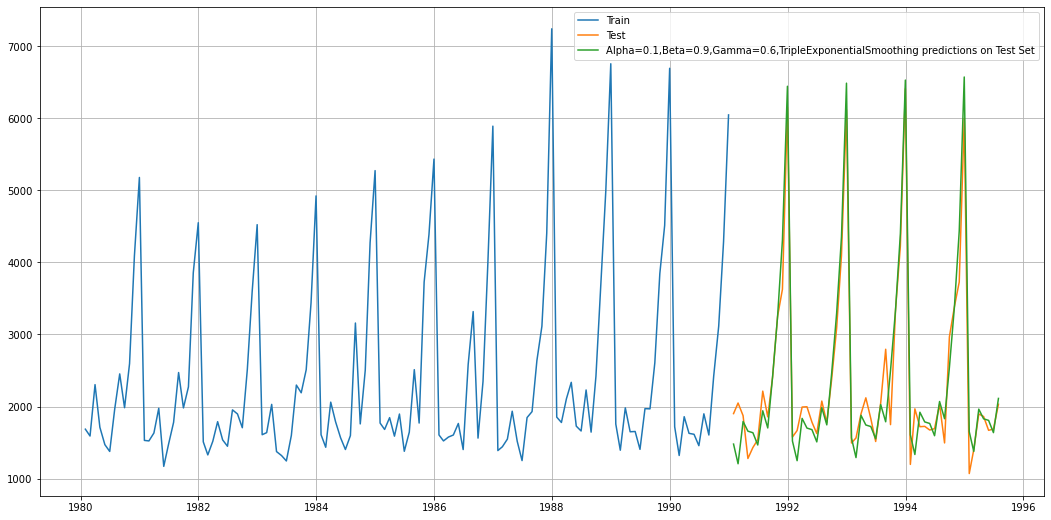

In [111]:
## Plotting on both the Training and Test data using brute force alpha, beta and gamma determination

plt.figure(figsize=(18,9))
plt.plot(TES_train['Sparkling'], label='Train')
plt.plot(TES_test['Sparkling'], label='Test')

#The value of alpha and beta is taken like that by python
plt.plot(TES_test['predict', 0.1, 0.9, 0.6], label='Alpha=0.1,Beta=0.9,Gamma=0.6,TripleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

In [112]:
resultsDf_8_3 = pd.DataFrame({'Test RMSE': [resultsDf_8_2['Test RMSE'][77]],'Test MAPE': [resultsDf_8_2['Test MAPE'][77]]}
                           ,index=['Alpha=0.1,Beta=0.9,Gamma=0.6,TripleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_8_3])
resultsDf

Test RMSE  Test MAPE
RegressionOnTime                                    1389.135175      50.15
NaiveModel                                          3864.279352     152.87
SimpleAverageModel                                  1275.081804      38.90
2pointTrailingMovingAverage                          813.400684      19.70
4pointTrailingMovingAverage                         1156.589694      35.96
6pointTrailingMovingAverage                         1283.927428      43.86
9pointTrailingMovingAverage                         1346.278315      46.86
Alpha=0.0496,SimpleExponentialSmoothing             1316.034674      45.47
Alpha=0.1,SimpleExponentialSmoothing                1595.206839      60.46
Alpha=0.2,SimpleExponentialSmoothing                1935.507132      75.66
Alpha =0.0496,Beta=9.999999999999999e-05 Double...  2007.238526      68.23
Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing       1778.564670      67.20
Alpha=0.112,Beta=0.037,Gamma=0.494,TripleExpone...  2007.238526      68.23
Alpha=0.1,Beta=0.9,Gamma=0.6,TripleExponentialS...   338.458417       9.93

### 5. Check for the stationarity of the data on which the model is being built on using appropriate statistical tests and also mention the hypothesis for the statistical test. If the data is found to be non-stationary, take appropriate steps to make it stationary. Check the new data for stationarity and comment. Note: Stationarity should be checked at alpha = 0.05.

## Check for stationarity of the whole Time Series data.

In [113]:
## Test for stationarity of the series - Dicky Fuller test

from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=7).mean() #determining the rolling mean
    rolstd = timeseries.rolling(window=7).std()   #determining the rolling standard deviation

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput,'\n')

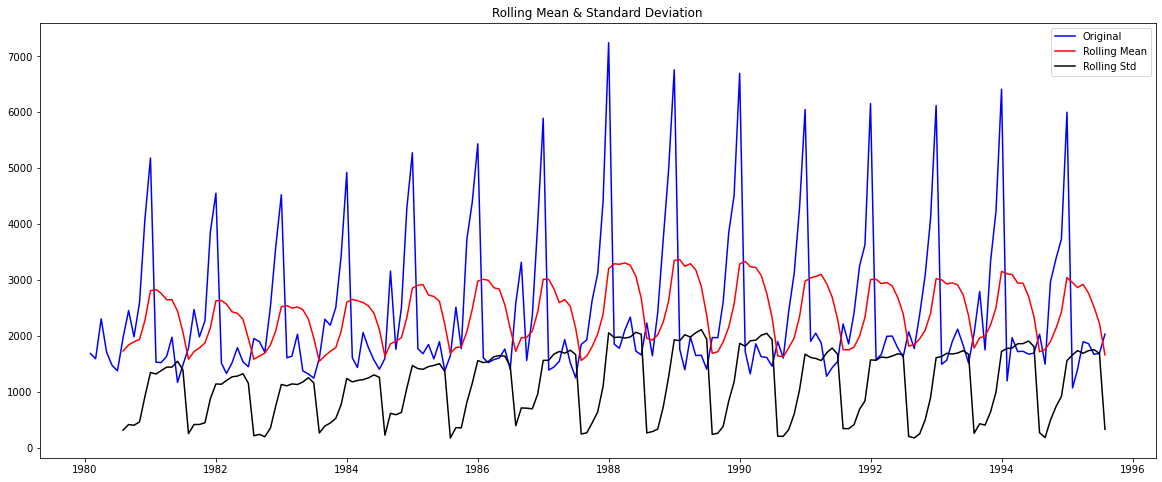

Results of Dickey-Fuller Test:
Test Statistic                  -1.360497
p-value                          0.601061
#Lags Used                      11.000000
Number of Observations Used    175.000000
Critical Value (1%)             -3.468280
Critical Value (5%)             -2.878202
Critical Value (10%)            -2.575653
dtype: float64 



In [114]:
test_stationarity(sparkling['Sparkling'])

In [115]:
# By looking into the pvalue, pvalue is greater than 5% so it is failed to reject null hyposthesis
# so, our data is said to be non-stationary

Let us take a difference of order 1 and check whether the Time Series is stationary or not.

In [116]:
((sparkling['Sparkling'].diff()).diff()).diff().dropna()

Time_Stamp
1980-04-30   -2113.0
1980-05-31    1656.0
1980-06-30    -204.0
1980-07-31     536.0
1980-08-31    -785.0
               ...  
1995-03-31   -5098.0
1995-04-30    -693.0
1995-05-31     373.0
1995-06-30     367.0
1995-07-31     115.0
Name: Sparkling, Length: 184, dtype: float64

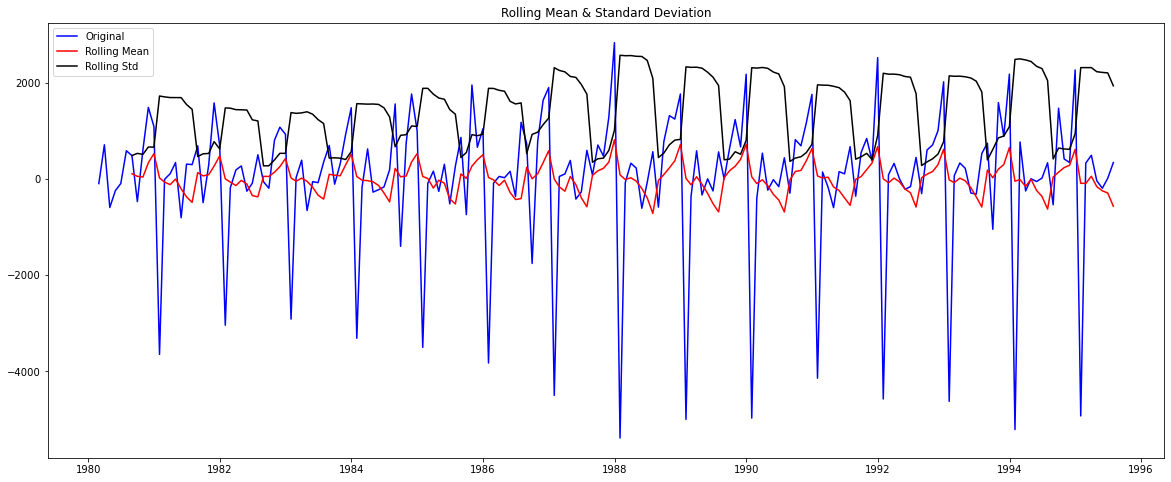

Results of Dickey-Fuller Test:
Test Statistic                 -45.050301
p-value                          0.000000
#Lags Used                      10.000000
Number of Observations Used    175.000000
Critical Value (1%)             -3.468280
Critical Value (5%)             -2.878202
Critical Value (10%)            -2.575653
dtype: float64 



In [117]:
test_stationarity(sparkling['Sparkling'].diff().dropna())

### 6. Build an automated version of the ARIMA/SARIMA model in which the parameters are selected using the lowest Akaike Information Criteria (AIC) on the training data and evaluate this model on the test data using RMSE.

### Automated ARIMA

In [118]:
from statsmodels.tsa.arima_model import ARIMA

In [119]:
## The following loop helps us in getting a combination of different parameters of p and q in the range of 0 and 2
## We have kept the value of d as 1 as we need to take a difference of the series to make it stationary.

import itertools
p = q = range(0, 4)
d= range(1,2)
pdq = list(itertools.product(p, d, q))
print('Some parameter combinations for the Model...')
for i in range(1,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Some parameter combinations for the Model...
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (0, 1, 3)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (1, 1, 3)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)
Model: (2, 1, 3)
Model: (3, 1, 0)
Model: (3, 1, 1)
Model: (3, 1, 2)
Model: (3, 1, 3)


In [120]:
pdq

[(0, 1, 0),
 (0, 1, 1),
 (0, 1, 2),
 (0, 1, 3),
 (1, 1, 0),
 (1, 1, 1),
 (1, 1, 2),
 (1, 1, 3),
 (2, 1, 0),
 (2, 1, 1),
 (2, 1, 2),
 (2, 1, 3),
 (3, 1, 0),
 (3, 1, 1),
 (3, 1, 2),
 (3, 1, 3)]

In [121]:
# Creating an empty Dataframe with column names only
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC

Empty DataFrame
Columns: [param, AIC]
Index: []

In [122]:
from statsmodels.tsa.arima_model import ARIMA

for param in pdq:
    ARIMA_model = ARIMA(train['Sparkling'].values,order=param).fit()
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))
    ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)

ARIMA(0, 1, 0) - AIC:2269.582796371201
ARIMA(0, 1, 1) - AIC:2264.9064368172944
ARIMA(0, 1, 2) - AIC:2232.783097684661
ARIMA(0, 1, 3) - AIC:2233.016605138244
ARIMA(1, 1, 0) - AIC:2268.5280606648653
ARIMA(1, 1, 1) - AIC:2235.0139453510988
ARIMA(1, 1, 2) - AIC:2233.597647119537
ARIMA(1, 1, 3) - AIC:2234.5741415471507
ARIMA(2, 1, 0) - AIC:2262.035600095461
ARIMA(2, 1, 1) - AIC:2232.3604898848293


C:\Users\PAVAN KALYAN B\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '


ARIMA(2, 1, 2) - AIC:2210.616429928409


C:\Users\PAVAN KALYAN B\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '


ARIMA(2, 1, 3) - AIC:2227.558862178724
ARIMA(3, 1, 0) - AIC:2259.471554860905
ARIMA(3, 1, 1) - AIC:2233.9217576682854


C:\Users\PAVAN KALYAN B\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '


ARIMA(3, 1, 2) - AIC:2228.9279853705893
ARIMA(3, 1, 3) - AIC:2225.661558524996


In [123]:
## Sort the above AIC values in the ascending order to get the parameters for the minimum AIC value

ARIMA_AIC.sort_values(by='AIC',ascending=True)

param          AIC
10  (2, 1, 2)  2210.616430
15  (3, 1, 3)  2225.661559
11  (2, 1, 3)  2227.558862
14  (3, 1, 2)  2228.927985
9   (2, 1, 1)  2232.360490
2   (0, 1, 2)  2232.783098
3   (0, 1, 3)  2233.016605
6   (1, 1, 2)  2233.597647
13  (3, 1, 1)  2233.921758
7   (1, 1, 3)  2234.574142
5   (1, 1, 1)  2235.013945
12  (3, 1, 0)  2259.471555
8   (2, 1, 0)  2262.035600
1   (0, 1, 1)  2264.906437
4   (1, 1, 0)  2268.528061
0   (0, 1, 0)  2269.582796

In [124]:
auto_ARIMA = ARIMA(train['Sparkling'], order=(2,1,2),freq='M')

results_auto_ARIMA = auto_ARIMA.fit()

print(results_auto_ARIMA.summary())

                             ARIMA Model Results                              
Dep. Variable:            D.Sparkling   No. Observations:                  131
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -1099.308
Method:                       css-mle   S.D. of innovations           1012.036
Date:                Sun, 05 Jun 2022   AIC                           2210.616
Time:                        23:25:49   BIC                           2227.868
Sample:                    02-29-1980   HQIC                          2217.626
                         - 12-31-1990                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 5.5847      0.517     10.803      0.000       4.571       6.598
ar.L1.D.Sparkling     1.2702      0.074     17.052      0.000       1.124       1.416
ar.L2.D.Sparkling    -0.

C:\Users\PAVAN KALYAN B\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '


## Predict on the Test Set using this model and evaluate the model.

In [125]:
predicted_auto_ARIMA = results_auto_ARIMA.forecast(steps=len(test))

In [126]:
from sklearn.metrics import  mean_squared_error
rmse = mean_squared_error(test['Sparkling'],predicted_auto_ARIMA[0],squared=False)
print(rmse)

1374.9580479969213


In [127]:
resultsDf_autoarima = pd.DataFrame({'Test RMSE': [rmse]}
                           ,index=['AUTO ARIMA(2,1,2)'])

resultsDf = pd.concat([resultsDf, resultsDf_autoarima])
resultsDf

Test RMSE  Test MAPE
RegressionOnTime                                    1389.135175      50.15
NaiveModel                                          3864.279352     152.87
SimpleAverageModel                                  1275.081804      38.90
2pointTrailingMovingAverage                          813.400684      19.70
4pointTrailingMovingAverage                         1156.589694      35.96
6pointTrailingMovingAverage                         1283.927428      43.86
9pointTrailingMovingAverage                         1346.278315      46.86
Alpha=0.0496,SimpleExponentialSmoothing             1316.034674      45.47
Alpha=0.1,SimpleExponentialSmoothing                1595.206839      60.46
Alpha=0.2,SimpleExponentialSmoothing                1935.507132      75.66
Alpha =0.0496,Beta=9.999999999999999e-05 Double...  2007.238526      68.23
Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing       1778.564670      67.20
Alpha=0.112,Beta=0.037,Gamma=0.494,TripleExpone...  2007.238526      68.23
Alpha=0.1,Beta=0.9,Gamma=0.6,TripleExponentialS...   338.458417       9.93
AUTO ARIMA(2,1,2)                                   1374.958048        NaN

### Automated SARIMA

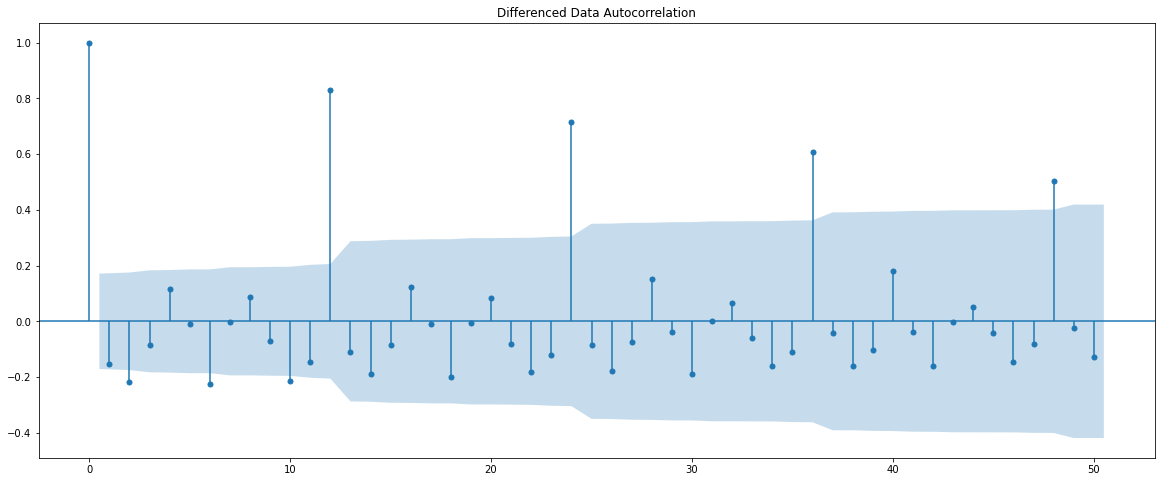

In [128]:
plot_acf(train['Sparkling'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plt.show()

In [129]:
pdq

[(0, 1, 0),
 (0, 1, 1),
 (0, 1, 2),
 (0, 1, 3),
 (1, 1, 0),
 (1, 1, 1),
 (1, 1, 2),
 (1, 1, 3),
 (2, 1, 0),
 (2, 1, 1),
 (2, 1, 2),
 (2, 1, 3),
 (3, 1, 0),
 (3, 1, 1),
 (3, 1, 2),
 (3, 1, 3)]

In [130]:
import itertools
p = q = range(0, 4)
P=Q=range(0,4)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 6) for x in list(itertools.product(P, D, Q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 0, 1, 6)
Model: (0, 1, 2)(0, 0, 2, 6)
Model: (0, 1, 3)(0, 0, 3, 6)
Model: (1, 1, 0)(1, 0, 0, 6)
Model: (1, 1, 1)(1, 0, 1, 6)
Model: (1, 1, 2)(1, 0, 2, 6)
Model: (1, 1, 3)(1, 0, 3, 6)
Model: (2, 1, 0)(2, 0, 0, 6)
Model: (2, 1, 1)(2, 0, 1, 6)
Model: (2, 1, 2)(2, 0, 2, 6)
Model: (2, 1, 3)(2, 0, 3, 6)
Model: (3, 1, 0)(3, 0, 0, 6)
Model: (3, 1, 1)(3, 0, 1, 6)
Model: (3, 1, 2)(3, 0, 2, 6)
Model: (3, 1, 3)(3, 0, 3, 6)


In [131]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

Empty DataFrame
Columns: [param, seasonal, AIC]
Index: []

In [132]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train['Sparkling'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 6) - AIC:2251.3597196862966
SARIMA(0, 1, 0)x(0, 0, 1, 6) - AIC:2152.378076171629
SARIMA(0, 1, 0)x(0, 0, 2, 6) - AIC:1955.635553689071
SARIMA(0, 1, 0)x(0, 0, 3, 6) - AIC:1863.784515497332
SARIMA(0, 1, 0)x(1, 0, 0, 6) - AIC:2164.4097581959904
SARIMA(0, 1, 0)x(1, 0, 1, 6) - AIC:2079.559984443091
SARIMA(0, 1, 0)x(1, 0, 2, 6) - AIC:1926.9360111440978
SARIMA(0, 1, 0)x(1, 0, 3, 6) - AIC:1803.392909486036
SARIMA(0, 1, 0)x(2, 0, 0, 6) - AIC:1839.4012986872267
SARIMA(0, 1, 0)x(2, 0, 1, 6) - AIC:1841.1993617510511
SARIMA(0, 1, 0)x(2, 0, 2, 6) - AIC:1810.9177805657544
SARIMA(0, 1, 0)x(2, 0, 3, 6) - AIC:1725.5376425549457
SARIMA(0, 1, 0)x(3, 0, 0, 6) - AIC:1748.7622668155268
SARIMA(0, 1, 0)x(3, 0, 1, 6) - AIC:1750.6879953816454
SARIMA(0, 1, 0)x(3, 0, 2, 6) - AIC:1739.4489858031943
SARIMA(0, 1, 0)x(3, 0, 3, 6) - AIC:1725.0138759447605
SARIMA(0, 1, 1)x(0, 0, 0, 6) - AIC:2230.1629078505825
SARIMA(0, 1, 1)x(0, 0, 1, 6) - AIC:2130.565285908282
SARIMA(0, 1, 1)x(0, 0, 2, 6) - AIC

SARIMA(2, 1, 1)x(2, 0, 1, 6) - AIC:1763.2674862123888
SARIMA(2, 1, 1)x(2, 0, 2, 6) - AIC:1744.0407537408987
SARIMA(2, 1, 1)x(2, 0, 3, 6) - AIC:1661.5703182417922
SARIMA(2, 1, 1)x(3, 0, 0, 6) - AIC:1676.1994485026514
SARIMA(2, 1, 1)x(3, 0, 1, 6) - AIC:1678.5274447884733
SARIMA(2, 1, 1)x(3, 0, 2, 6) - AIC:1661.2560702613468
SARIMA(2, 1, 1)x(3, 0, 3, 6) - AIC:1663.3315077024708
SARIMA(2, 1, 2)x(0, 0, 0, 6) - AIC:2176.8681144920774
SARIMA(2, 1, 2)x(0, 0, 1, 6) - AIC:2068.7781454183796
SARIMA(2, 1, 2)x(0, 0, 2, 6) - AIC:1889.787540459286
SARIMA(2, 1, 2)x(0, 0, 3, 6) - AIC:1797.0726419076705
SARIMA(2, 1, 2)x(1, 0, 0, 6) - AIC:2074.110221760579
SARIMA(2, 1, 2)x(1, 0, 1, 6) - AIC:1955.6058949688763
SARIMA(2, 1, 2)x(1, 0, 2, 6) - AIC:1826.0433798717777
SARIMA(2, 1, 2)x(1, 0, 3, 6) - AIC:1715.810574057602
SARIMA(2, 1, 2)x(2, 0, 0, 6) - AIC:1763.2783297130923
SARIMA(2, 1, 2)x(2, 0, 1, 6) - AIC:1760.82674496632
SARIMA(2, 1, 2)x(2, 0, 2, 6) - AIC:1729.1785943398436
SARIMA(2, 1, 2)x(2, 0, 3, 6) - AI

In [133]:
SARIMA_AIC.sort_values(by=['AIC']).head()

param      seasonal          AIC
187  (2, 1, 3)  (2, 0, 3, 6)  1632.639242
59   (0, 1, 3)  (2, 0, 3, 6)  1633.327889
251  (3, 1, 3)  (2, 0, 3, 6)  1634.597834
63   (0, 1, 3)  (3, 0, 3, 6)  1635.102973
123  (1, 1, 3)  (2, 0, 3, 6)  1635.428147

In [134]:
import statsmodels.api as sm

auto_SARIMA_6 = sm.tsa.statespace.SARIMAX(train['Sparkling'].values,
                                order=(2, 1, 3),
                                seasonal_order=(2, 0, 3, 6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA_6 = auto_SARIMA_6.fit(maxiter=1000)
print(results_auto_SARIMA_6.summary())

                                     SARIMAX Results                                     
Dep. Variable:                                 y   No. Observations:                  132
Model:             SARIMAX(2, 1, 3)x(2, 0, 3, 6)   Log Likelihood                -805.320
Date:                           Sun, 05 Jun 2022   AIC                           1632.639
Time:                                   23:36:08   BIC                           1662.244
Sample:                                        0   HQIC                          1644.645
                                           - 132                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.1887      0.032    -37.036      0.000      -1.252      -1.126
ar.L2         -0.9412      0.045    -20.715

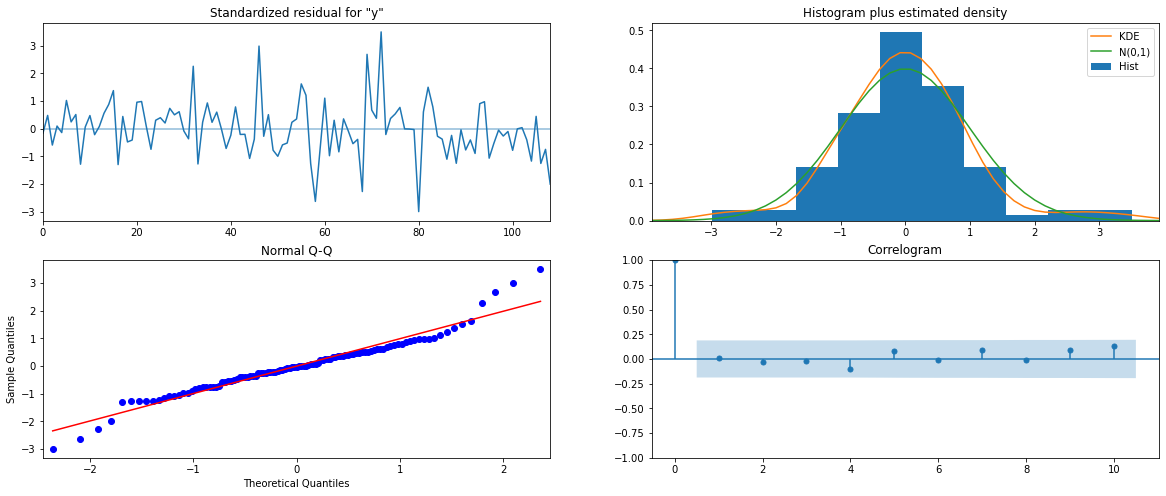

In [135]:
results_auto_SARIMA_6.plot_diagnostics()
plt.show()

From the model diagnostics plot, we can see that all the individual diagnostics plots almost follow the theoretical numbers and thus we cannot develop any pattern from these plots. 

## Predict on the Test Set using this model and evaluate the model.

In [136]:
predicted_auto_SARIMA_6 = results_auto_SARIMA_6.get_forecast(steps=len(test))

In [137]:
predicted_auto_SARIMA_6.summary_frame(alpha=0.05).head()

y         mean     mean_se  mean_ci_lower  mean_ci_upper
0  1382.472211  377.135550     643.300116    2121.644307
1   951.755919  387.026084     193.198732    1710.313106
2  1658.940831  388.434796     897.622621    2420.259041
3  1539.859946  391.879707     771.789835    2307.930057
4  1273.580555  400.121961     489.355922    2057.805188

In [138]:
rmse = mean_squared_error(test['Sparkling'],predicted_auto_SARIMA_6.predicted_mean,squared=False)
print(rmse)

737.8558108396751


In [139]:
temp_resultsDf_auto_sarima6 = pd.DataFrame({'Test RMSE': [rmse]}
                           ,index=['Auto_SARIMA_6(2,1,3)(2,0,3,6)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf_auto_sarima6])

resultsDf

Test RMSE  Test MAPE
RegressionOnTime                                    1389.135175      50.15
NaiveModel                                          3864.279352     152.87
SimpleAverageModel                                  1275.081804      38.90
2pointTrailingMovingAverage                          813.400684      19.70
4pointTrailingMovingAverage                         1156.589694      35.96
6pointTrailingMovingAverage                         1283.927428      43.86
9pointTrailingMovingAverage                         1346.278315      46.86
Alpha=0.0496,SimpleExponentialSmoothing             1316.034674      45.47
Alpha=0.1,SimpleExponentialSmoothing                1595.206839      60.46
Alpha=0.2,SimpleExponentialSmoothing                1935.507132      75.66
Alpha =0.0496,Beta=9.999999999999999e-05 Double...  2007.238526      68.23
Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing       1778.564670      67.20
Alpha=0.112,Beta=0.037,Gamma=0.494,TripleExpone...  2007.238526      68.23
Alpha=0.1,Beta=0.9,Gamma=0.6,TripleExponentialS...   338.458417       9.93
AUTO ARIMA(2,1,2)                                   1374.958048        NaN
Auto_SARIMA_6(2,1,3)(2,0,3,6)                        737.855811        NaN

### Setting the seasonality as 12 for the second iteration of the auto SARIMA model.

In [140]:
import itertools
p = q = range(0, 3)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 0, 1, 12)
Model: (0, 1, 2)(0, 0, 2, 12)
Model: (1, 1, 0)(1, 0, 0, 12)
Model: (1, 1, 1)(1, 0, 1, 12)
Model: (1, 1, 2)(1, 0, 2, 12)
Model: (2, 1, 0)(2, 0, 0, 12)
Model: (2, 1, 1)(2, 0, 1, 12)
Model: (2, 1, 2)(2, 0, 2, 12)


In [141]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

Empty DataFrame
Columns: [param, seasonal, AIC]
Index: []

In [142]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train['Sparkling'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 12) - AIC:2251.3597196862966
SARIMA(0, 1, 0)x(0, 0, 1, 12) - AIC:1956.261461684553
SARIMA(0, 1, 0)x(0, 0, 2, 12) - AIC:1723.1533640237064
SARIMA(0, 1, 0)x(1, 0, 0, 12) - AIC:1837.4366022456675
SARIMA(0, 1, 0)x(1, 0, 1, 12) - AIC:1806.9905301389308
SARIMA(0, 1, 0)x(1, 0, 2, 12) - AIC:1633.2108735792024
SARIMA(0, 1, 0)x(2, 0, 0, 12) - AIC:1648.3776153470856
SARIMA(0, 1, 0)x(2, 0, 1, 12) - AIC:1647.2054158613328
SARIMA(0, 1, 0)x(2, 0, 2, 12) - AIC:1630.9898053920729
SARIMA(0, 1, 1)x(0, 0, 0, 12) - AIC:2230.1629078505825
SARIMA(0, 1, 1)x(0, 0, 1, 12) - AIC:1923.7688649566726
SARIMA(0, 1, 1)x(0, 0, 2, 12) - AIC:1692.7089572748998
SARIMA(0, 1, 1)x(1, 0, 0, 12) - AIC:1797.179588183803
SARIMA(0, 1, 1)x(1, 0, 1, 12) - AIC:1738.0903193766617
SARIMA(0, 1, 1)x(1, 0, 2, 12) - AIC:1570.1509144566762
SARIMA(0, 1, 1)x(2, 0, 0, 12) - AIC:1605.6751954175065
SARIMA(0, 1, 1)x(2, 0, 1, 12) - AIC:1599.224508535863
SARIMA(0, 1, 1)x(2, 0, 2, 12) - AIC:1570.3683738379118
SARIMA(0, 1, 

In [143]:
SARIMA_AIC.sort_values(by=['AIC']).head()

param       seasonal          AIC
50  (1, 1, 2)  (1, 0, 2, 12)  1555.584247
53  (1, 1, 2)  (2, 0, 2, 12)  1555.934563
26  (0, 1, 2)  (2, 0, 2, 12)  1557.121563
23  (0, 1, 2)  (1, 0, 2, 12)  1557.160507
77  (2, 1, 2)  (1, 0, 2, 12)  1557.340402

In [144]:
import statsmodels.api as sm

auto_SARIMA_12 = sm.tsa.statespace.SARIMAX(train['Sparkling'].values,
                                order=(1, 1, 2),
                                seasonal_order=(1, 0, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA_12 = auto_SARIMA_12.fit(maxiter=1000)
print(results_auto_SARIMA_12.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  132
Model:             SARIMAX(1, 1, 2)x(1, 0, 2, 12)   Log Likelihood                -770.792
Date:                            Sun, 05 Jun 2022   AIC                           1555.584
Time:                                    23:37:56   BIC                           1574.095
Sample:                                         0   HQIC                          1563.083
                                            - 132                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6282      0.255     -2.463      0.014      -1.128      -0.128
ma.L1         -0.1041      0.225   

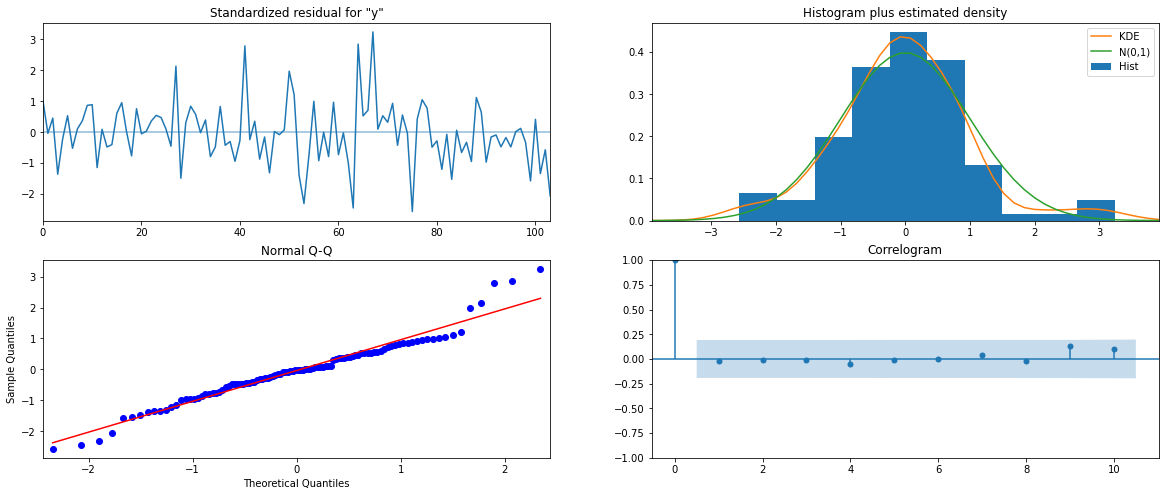

In [145]:
results_auto_SARIMA_12.plot_diagnostics()
plt.show()

Similar to the last iteration of the model where the seasonality parameter was taken as 6, here also we see that the model diagnostics plot does not indicate any remaining information that we can get.

## Predict on the Test Set using this model and evaluate the model.

In [146]:
predicted_auto_SARIMA_12 = results_auto_SARIMA_12.get_forecast(steps=len(test))

In [147]:
predicted_auto_SARIMA_12.summary_frame(alpha=0.05).head()

y         mean     mean_se  mean_ci_lower  mean_ci_upper
0  1327.410286  388.341287     566.275351    2088.545222
1  1315.147036  402.003217     527.235209    2103.058862
2  1621.610514  401.996827     833.711211    2409.509817
3  1598.899171  407.234059     800.735083    2397.063259
4  1392.717796  407.963724     593.123589    2192.312002

In [148]:
rmse = mean_squared_error(test['Sparkling'],predicted_auto_SARIMA_12.predicted_mean,squared=False)
print(rmse)

528.5880339212471


In [149]:
temp_resultsDf_auto_sarima12 = pd.DataFrame({'Test RMSE': [rmse]}
                           ,index=['AUTO_SARIMA_12(1,1,2)(1,0,2,12)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf_auto_sarima12])

resultsDf

Test RMSE  Test MAPE
RegressionOnTime                                    1389.135175      50.15
NaiveModel                                          3864.279352     152.87
SimpleAverageModel                                  1275.081804      38.90
2pointTrailingMovingAverage                          813.400684      19.70
4pointTrailingMovingAverage                         1156.589694      35.96
6pointTrailingMovingAverage                         1283.927428      43.86
9pointTrailingMovingAverage                         1346.278315      46.86
Alpha=0.0496,SimpleExponentialSmoothing             1316.034674      45.47
Alpha=0.1,SimpleExponentialSmoothing                1595.206839      60.46
Alpha=0.2,SimpleExponentialSmoothing                1935.507132      75.66
Alpha =0.0496,Beta=9.999999999999999e-05 Double...  2007.238526      68.23
Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing       1778.564670      67.20
Alpha=0.112,Beta=0.037,Gamma=0.494,TripleExpone...  2007.238526      68.23
Alpha=0.1,Beta=0.9,Gamma=0.6,TripleExponentialS...   338.458417       9.93
AUTO ARIMA(2,1,2)                                   1374.958048        NaN
Auto_SARIMA_6(2,1,3)(2,0,3,6)                        737.855811        NaN
AUTO_SARIMA_12(1,1,2)(1,0,2,12)                      528.588034        NaN

### 7. Build ARIMA/SARIMA models based on the cut-off points of ACF and PACF on the training data and evaluate this model on the test data using RMSE.

Let us look at the ACF and the PACF plots once more.

## Manual ARIMA

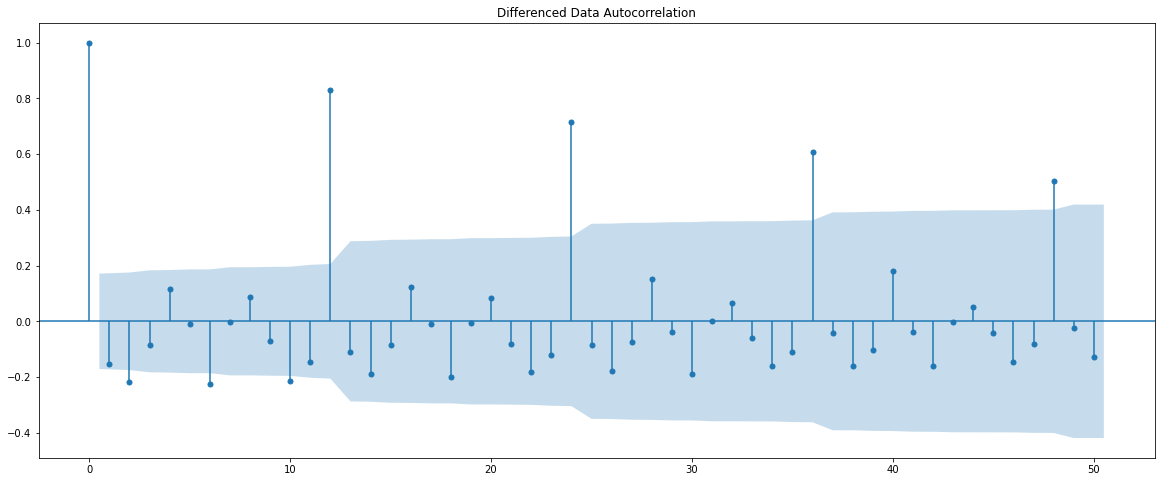

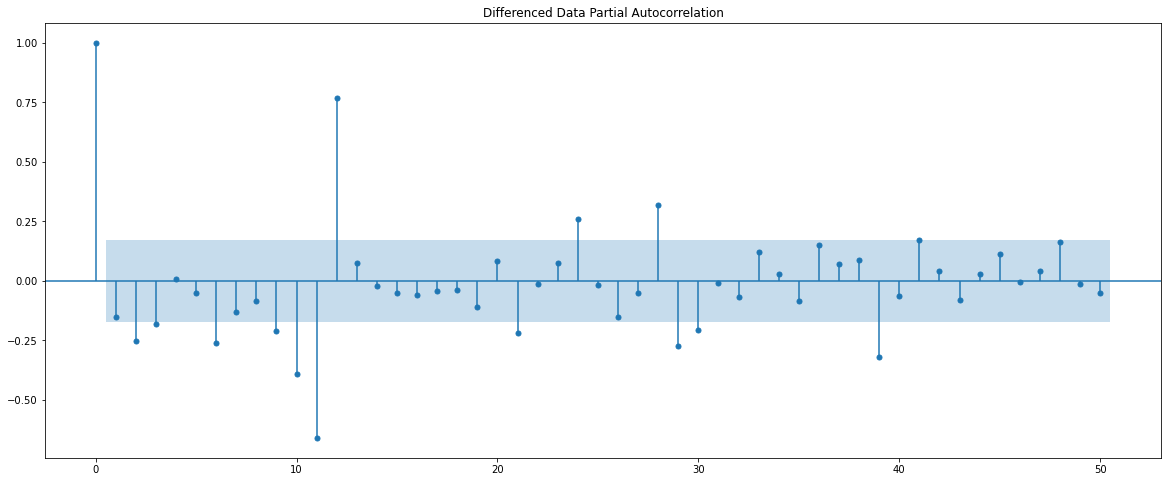

In [150]:
plot_acf(train['Sparkling'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plot_pacf(train['Sparkling'].diff().dropna(),lags=50,title='Differenced Data Partial Autocorrelation')
plt.show()

In [151]:
manual_ARIMA = ARIMA(train['Sparkling'].astype('float64'), order=(0,1,0),freq='M')

results_manual_ARIMA = manual_ARIMA.fit()

print(results_manual_ARIMA.summary())

                             ARIMA Model Results                              
Dep. Variable:            D.Sparkling   No. Observations:                  131
Model:                 ARIMA(0, 1, 0)   Log Likelihood               -1132.791
Method:                           css   S.D. of innovations           1377.911
Date:                Sun, 05 Jun 2022   AIC                           2269.583
Time:                        23:37:59   BIC                           2275.333
Sample:                    02-29-1980   HQIC                          2271.919
                         - 12-31-1990                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         33.2901    120.389      0.277      0.782    -202.667     269.248


## Predict on the Test Set using this model and evaluate the model.

In [152]:
predicted_manual_ARIMA = results_manual_ARIMA.forecast(steps=len(test))

In [153]:
rmse = mean_squared_error(test['Sparkling'],predicted_manual_ARIMA[0],squared=False)
print(rmse)

4779.15429919654


In [154]:
temp_resultsDf_manualarima = pd.DataFrame({'Test RMSE': [rmse]}
                           ,index=['MANUAL ARIMA(0,1,0)'])


resultsDf = pd.concat([resultsDf, temp_resultsDf_manualarima])
resultsDf

Test RMSE  Test MAPE
RegressionOnTime                                    1389.135175      50.15
NaiveModel                                          3864.279352     152.87
SimpleAverageModel                                  1275.081804      38.90
2pointTrailingMovingAverage                          813.400684      19.70
4pointTrailingMovingAverage                         1156.589694      35.96
6pointTrailingMovingAverage                         1283.927428      43.86
9pointTrailingMovingAverage                         1346.278315      46.86
Alpha=0.0496,SimpleExponentialSmoothing             1316.034674      45.47
Alpha=0.1,SimpleExponentialSmoothing                1595.206839      60.46
Alpha=0.2,SimpleExponentialSmoothing                1935.507132      75.66
Alpha =0.0496,Beta=9.999999999999999e-05 Double...  2007.238526      68.23
Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing       1778.564670      67.20
Alpha=0.112,Beta=0.037,Gamma=0.494,TripleExpone...  2007.238526      68.23
Alpha=0.1,Beta=0.9,Gamma=0.6,TripleExponentialS...   338.458417       9.93
AUTO ARIMA(2,1,2)                                   1374.958048        NaN
Auto_SARIMA_6(2,1,3)(2,0,3,6)                        737.855811        NaN
AUTO_SARIMA_12(1,1,2)(1,0,2,12)                      528.588034        NaN
MANUAL ARIMA(0,1,0)                                 4779.154299        NaN

### 8. Build a table (create a data frame) with all the models built along with their corresponding parameters and the respective RMSE values on the test data.

In [155]:
sparkling_results = pd.DataFrame(resultsDf.iloc[:,0])

In [156]:
sparkling_results

Test RMSE
RegressionOnTime                                    1389.135175
NaiveModel                                          3864.279352
SimpleAverageModel                                  1275.081804
2pointTrailingMovingAverage                          813.400684
4pointTrailingMovingAverage                         1156.589694
6pointTrailingMovingAverage                         1283.927428
9pointTrailingMovingAverage                         1346.278315
Alpha=0.0496,SimpleExponentialSmoothing             1316.034674
Alpha=0.1,SimpleExponentialSmoothing                1595.206839
Alpha=0.2,SimpleExponentialSmoothing                1935.507132
Alpha =0.0496,Beta=9.999999999999999e-05 Double...  2007.238526
Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing       1778.564670
Alpha=0.112,Beta=0.037,Gamma=0.494,TripleExpone...  2007.238526
Alpha=0.1,Beta=0.9,Gamma=0.6,TripleExponentialS...   338.458417
AUTO ARIMA(2,1,2)                                   1374.958048
Auto_SARIMA_6(2,1,3)(2,0,3,6)                        737.855811
AUTO_SARIMA_12(1,1,2)(1,0,2,12)                      528.588034
MANUAL ARIMA(0,1,0)                                 4779.154299

### 9. Based on the model-building exercise, build the most optimum model(s) on the complete data and predict 12 months into the future with appropriate confidence intervals/bands

In [157]:
sparkling_results.sort_values(by=['Test RMSE'])

Test RMSE
Alpha=0.1,Beta=0.9,Gamma=0.6,TripleExponentialS...   338.458417
AUTO_SARIMA_12(1,1,2)(1,0,2,12)                      528.588034
Auto_SARIMA_6(2,1,3)(2,0,3,6)                        737.855811
2pointTrailingMovingAverage                          813.400684
4pointTrailingMovingAverage                         1156.589694
SimpleAverageModel                                  1275.081804
6pointTrailingMovingAverage                         1283.927428
Alpha=0.0496,SimpleExponentialSmoothing             1316.034674
9pointTrailingMovingAverage                         1346.278315
AUTO ARIMA(2,1,2)                                   1374.958048
RegressionOnTime                                    1389.135175
Alpha=0.1,SimpleExponentialSmoothing                1595.206839
Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing       1778.564670
Alpha=0.2,SimpleExponentialSmoothing                1935.507132
Alpha=0.112,Beta=0.037,Gamma=0.494,TripleExpone...  2007.238526
Alpha =0.0496,Beta=9.999999999999999e-05 Double...  2007.238526
NaiveModel                                          3864.279352
MANUAL ARIMA(0,1,0)                                 4779.154299

### Manual SARIMA

In [158]:
full_data_model = sm.tsa.statespace.SARIMAX(sparkling['Sparkling'],
                                order=(1,1,2),
                                seasonal_order=(2, 0, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_full_data_model = full_data_model.fit(maxiter=1000)
print(results_full_data_model.summary())

C:\Users\PAVAN KALYAN B\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\PAVAN KALYAN B\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


                                     SARIMAX Results                                      
Dep. Variable:                          Sparkling   No. Observations:                  187
Model:             SARIMAX(1, 1, 2)x(2, 0, 2, 12)   Log Likelihood               -1172.688
Date:                            Sun, 05 Jun 2022   AIC                           2361.375
Time:                                    23:38:03   BIC                           2385.926
Sample:                                01-31-1980   HQIC                          2371.345
                                     - 07-31-1995                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6536      0.269     -2.429      0.015      -1.181      -0.126
ma.L1         -0.1847      0.243   

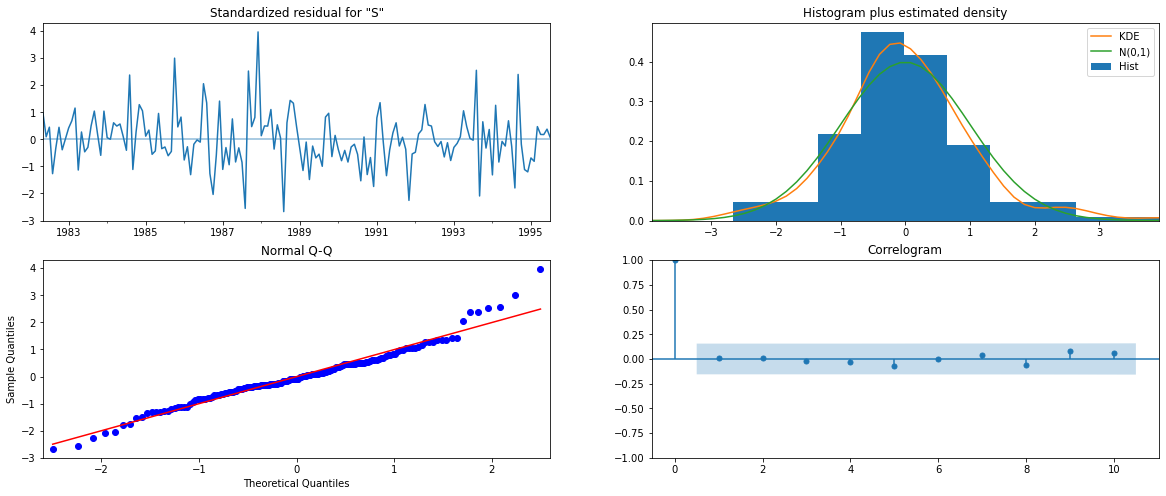

In [159]:
results_full_data_model.plot_diagnostics()
plt.show()

## Predict on the Test Set using this model and evaluate the model.

In [160]:
predicted_manual_SARIMA_12 = results_full_data_model.get_forecast(steps=12)

In [161]:
predicted_manual_SARIMA_12.summary_frame(alpha=0.05).head()

Sparkling          mean     mean_se  mean_ci_lower  mean_ci_upper
1995-08-31  1857.466483  381.067667    1110.587580    2604.345386
1995-09-30  2457.764714  386.016778    1701.185732    3214.343695
1995-10-31  3317.353645  386.125438    2560.561692    4074.145598
1995-11-30  4018.941372  387.903661    3258.664167    4779.218577
1995-12-31  6289.723074  387.964224    5529.327168    7050.118980

In [162]:
rmse = mean_squared_error(sparkling['Sparkling'],results_full_data_model.fittedvalues,squared=False)
print('RMSE of the Full Model',rmse)

RMSE of the Full Model 536.2087812928711


In [163]:
temp_resultsDf_manual_sarima_12 = pd.DataFrame({'Test RMSE': [rmse]}
                           ,index=['MANUAL_SARIMA_12(1,1,2)(1,0,2,12)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf_manual_sarima_12])

resultsDf

Test RMSE  Test MAPE
RegressionOnTime                                    1389.135175      50.15
NaiveModel                                          3864.279352     152.87
SimpleAverageModel                                  1275.081804      38.90
2pointTrailingMovingAverage                          813.400684      19.70
4pointTrailingMovingAverage                         1156.589694      35.96
6pointTrailingMovingAverage                         1283.927428      43.86
9pointTrailingMovingAverage                         1346.278315      46.86
Alpha=0.0496,SimpleExponentialSmoothing             1316.034674      45.47
Alpha=0.1,SimpleExponentialSmoothing                1595.206839      60.46
Alpha=0.2,SimpleExponentialSmoothing                1935.507132      75.66
Alpha =0.0496,Beta=9.999999999999999e-05 Double...  2007.238526      68.23
Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing       1778.564670      67.20
Alpha=0.112,Beta=0.037,Gamma=0.494,TripleExpone...  2007.238526      68.23
Alpha=0.1,Beta=0.9,Gamma=0.6,TripleExponentialS...   338.458417       9.93
AUTO ARIMA(2,1,2)                                   1374.958048        NaN
Auto_SARIMA_6(2,1,3)(2,0,3,6)                        737.855811        NaN
AUTO_SARIMA_12(1,1,2)(1,0,2,12)                      528.588034        NaN
MANUAL ARIMA(0,1,0)                                 4779.154299        NaN
MANUAL_SARIMA_12(1,1,2)(1,0,2,12)                    536.208781        NaN

In [164]:
pred_full_manual_SARIMA_date = predicted_manual_SARIMA_12.summary_frame(alpha=0.05).set_index(pd.date_range(start='1995-08-31',end='1996-7-31', freq='M'))

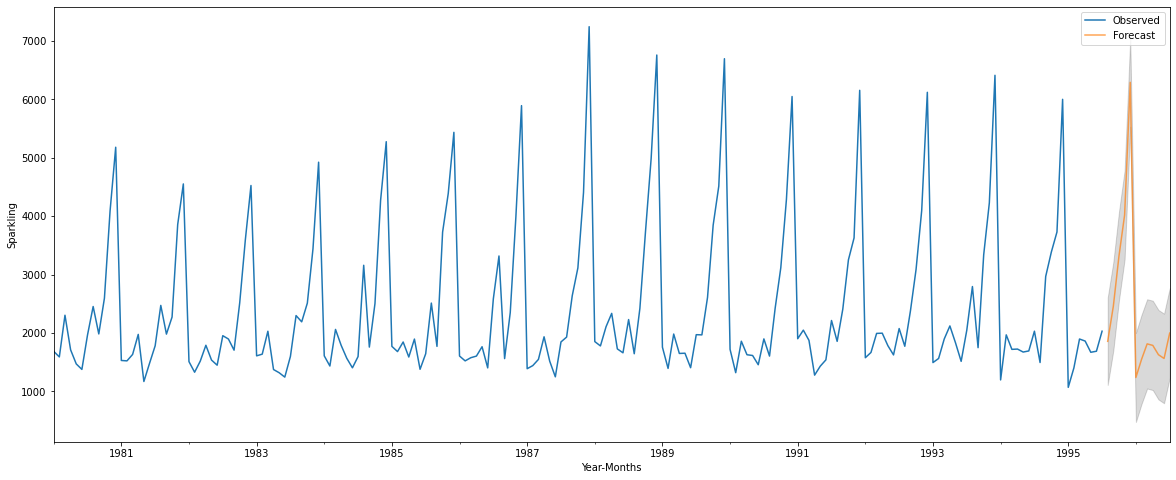

In [165]:
# plot the forecast along with the confidence band

axis = sparkling['Sparkling'].plot(label='Observed')
pred_full_manual_SARIMA_date['mean'].plot(ax=axis, label='Forecast', alpha=0.7)
axis.fill_between(pred_full_manual_SARIMA_date.index, pred_full_manual_SARIMA_date['mean_ci_lower'], 
                  pred_full_manual_SARIMA_date['mean_ci_upper'], color='k', alpha=.15)
axis.set_xlabel('Year-Months')
axis.set_ylabel('Sparkling')
plt.legend(loc='best')
plt.show()

### --------------------------------------------------------------------------------------------------------------------------------------------------------------

In [166]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

### 1. Read the data as an appropriate Time Series data and plot the data.

In [167]:
Rose = pd.read_csv("Rose.csv")

In [168]:
Rose.tail()

YearMonth  Rose
182   1995-03  45.0
183   1995-04  52.0
184   1995-05  28.0
185   1995-06  40.0
186   1995-07  62.0

In [169]:
date = pd.date_range(start='1/1/1980', end='8/1/1995', freq='M')
date

DatetimeIndex(['1980-01-31', '1980-02-29', '1980-03-31', '1980-04-30',
               '1980-05-31', '1980-06-30', '1980-07-31', '1980-08-31',
               '1980-09-30', '1980-10-31',
               ...
               '1994-10-31', '1994-11-30', '1994-12-31', '1995-01-31',
               '1995-02-28', '1995-03-31', '1995-04-30', '1995-05-31',
               '1995-06-30', '1995-07-31'],
              dtype='datetime64[ns]', length=187, freq='M')

In [170]:
# Adding the time stamp to the data frame

Rose['Time_Stamp'] = pd.DataFrame(date,columns=['Month'])

In [171]:
Rose.head()

YearMonth   Rose Time_Stamp
0   1980-01  112.0 1980-01-31
1   1980-02  118.0 1980-02-29
2   1980-03  129.0 1980-03-31
3   1980-04   99.0 1980-04-30
4   1980-05  116.0 1980-05-31

In [172]:
Rose.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   YearMonth   187 non-null    object        
 1   Rose        185 non-null    float64       
 2   Time_Stamp  187 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 4.5+ KB


In [173]:
Rose.isnull().sum()

YearMonth     0
Rose          2
Time_Stamp    0
dtype: int64

In [174]:
Rose.duplicated().sum()

0

In [175]:
Rose.drop(['YearMonth'], axis=1, inplace=True)

In [176]:
Rose.head()

Rose Time_Stamp
0  112.0 1980-01-31
1  118.0 1980-02-29
2  129.0 1980-03-31
3   99.0 1980-04-30
4  116.0 1980-05-31

In [177]:
Rose = Rose.set_index('Time_Stamp')

In [178]:
Rose.head()

Rose
Time_Stamp       
1980-01-31  112.0
1980-02-29  118.0
1980-03-31  129.0
1980-04-30   99.0
1980-05-31  116.0

In [179]:
# The following code is to set the subsequent figure sizes

from pylab import rcParams
rcParams['figure.figsize'] = 20,8

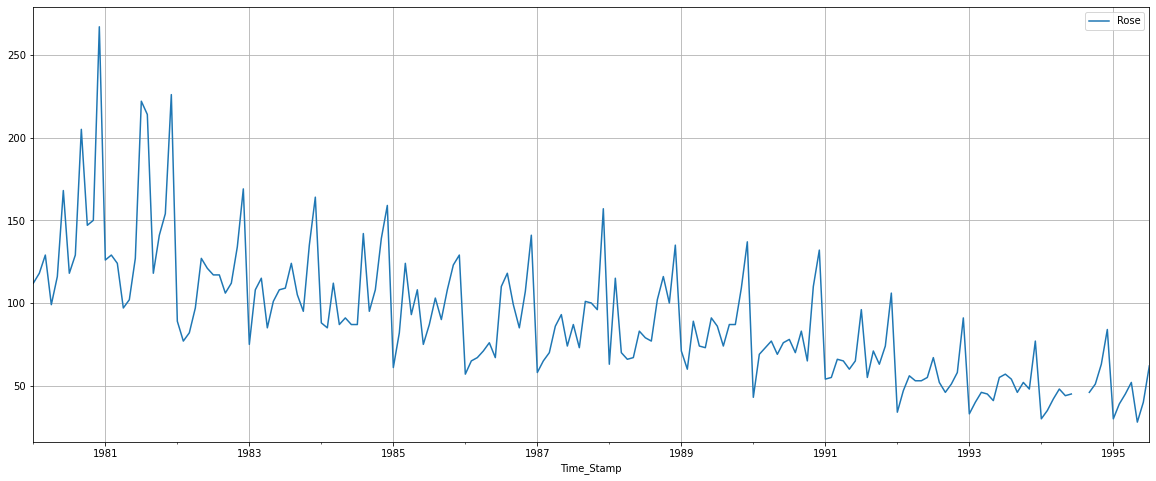

In [180]:
Rose.plot()
plt.grid();

In [181]:
Rose.isnull().sum()

Rose    2
dtype: int64

### Imputing null values

In [182]:
Rose_col = ['Rose']
#Technique 1: Using mean to impute the missing values
for i in Rose_col:
     Rose.loc[Rose.loc[:,i].isnull(),i]=Rose.loc[:,i].mean()


In [183]:
Rose.isnull().sum()

Rose    0
dtype: int64

### 2. Perform appropriate Exploratory Data Analysis to understand the data and also perform decomposition.

In [184]:
Rose.describe()

Rose
count  187.000000
mean    90.394595
std     38.964155
min     28.000000
25%     63.000000
50%     86.000000
75%    111.000000
max    267.000000

### Yearly plot

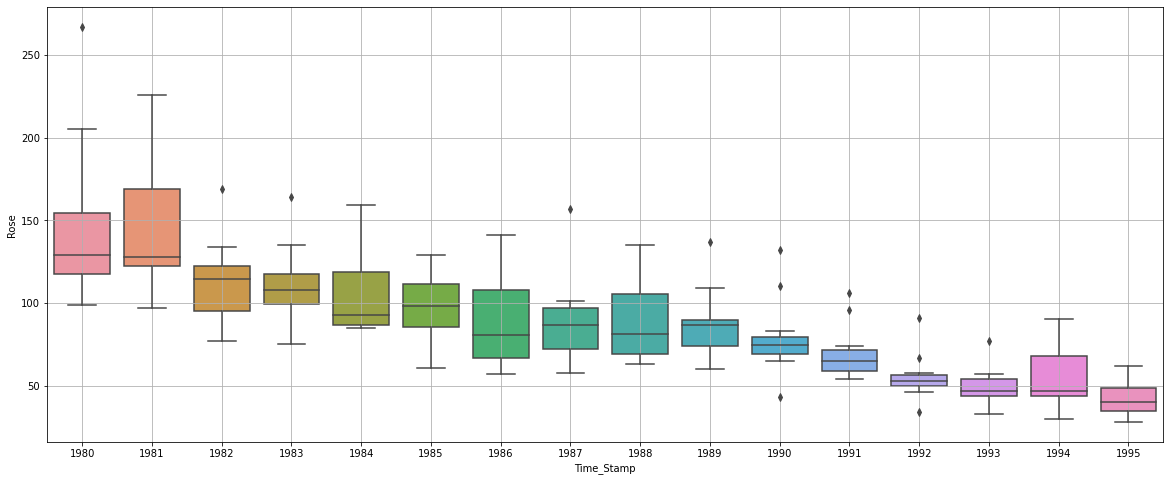

In [185]:
sns.boxplot(x = Rose.index.year,y = Rose['Rose']);
plt.grid();

### Montly plot

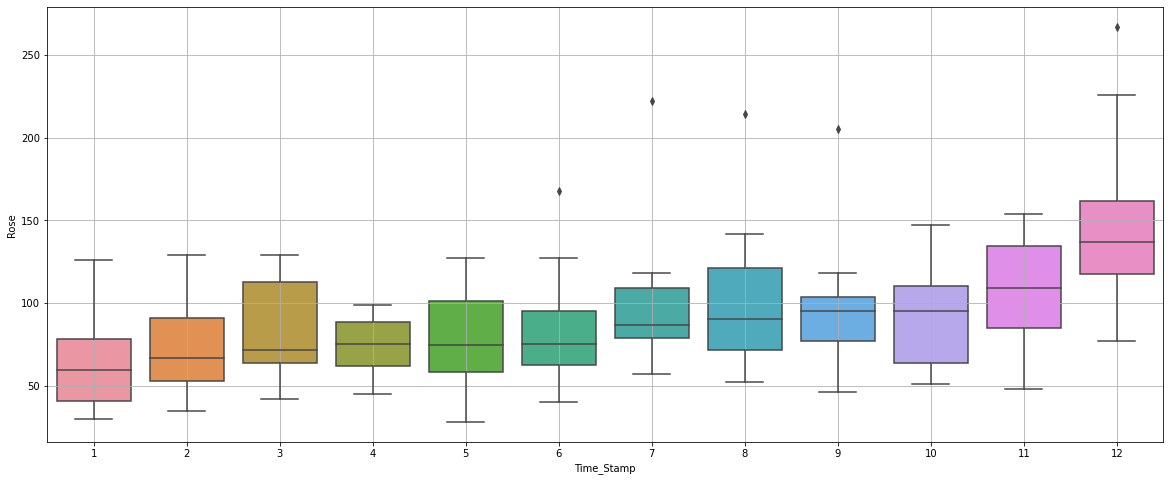

In [186]:
sns.boxplot(x = Rose.index.month,y = Rose['Rose'])
plt.grid();

### Plot a time series monthplot to understand the spread of sales across different years and within different months across years.

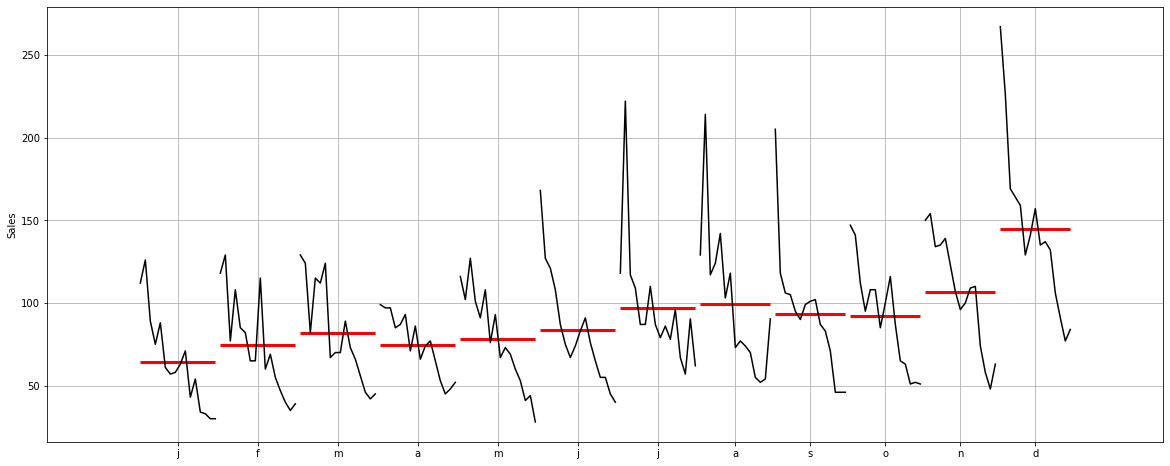

In [187]:
from statsmodels.graphics.tsaplots import month_plot

month_plot(Rose['Rose'],ylabel='Sales')
plt.grid();

### Plot a graph of monthly RetailSales across years.

In [188]:
monthly_sales_across_years = pd.pivot_table(Rose, values = 'Rose', columns = Rose.index.month, index = Rose.index.year)
monthly_sales_across_years

Time_Stamp     1      2      3     4      5      6           7           8   \
Time_Stamp                                                                    
1980        112.0  118.0  129.0  99.0  116.0  168.0  118.000000  129.000000   
1981        126.0  129.0  124.0  97.0  102.0  127.0  222.000000  214.000000   
1982         89.0   77.0   82.0  97.0  127.0  121.0  117.000000  117.000000   
1983         75.0  108.0  115.0  85.0  101.0  108.0  109.000000  124.000000   
1984         88.0   85.0  112.0  87.0   91.0   87.0   87.000000  142.000000   
1985         61.0   82.0  124.0  93.0  108.0   75.0   87.000000  103.000000   
1986         57.0   65.0   67.0  71.0   76.0   67.0  110.000000  118.000000   
1987         58.0   65.0   70.0  86.0   93.0   74.0   87.000000   73.000000   
1988         63.0  115.0   70.0  66.0   67.0   83.0   79.000000   77.000000   
1989         71.0   60.0   89.0  74.0   73.0   91.0   86.000000   74.000000   
1990         43.0   69.0   73.0  77.0   69.0   76.0   78.000000   70.000000   
1991         54.0   55.0   66.0  65.0   60.0   65.0   96.000000   55.000000   
1992         34.0   47.0   56.0  53.0   53.0   55.0   67.000000   52.000000   
1993         33.0   40.0   46.0  45.0   41.0   55.0   57.000000   54.000000   
1994         30.0   35.0   42.0  48.0   44.0   45.0   90.394595   90.394595   
1995         30.0   39.0   45.0  52.0   28.0   40.0   62.000000         NaN   

Time_Stamp     9      10     11     12  
Time_Stamp                              
1980        205.0  147.0  150.0  267.0  
1981        118.0  141.0  154.0  226.0  
1982        106.0  112.0  134.0  169.0  
1983        105.0   95.0  135.0  164.0  
1984         95.0  108.0  139.0  159.0  
1985         90.0  108.0  123.0  129.0  
1986         99.0   85.0  107.0  141.0  
1987        101.0  100.0   96.0  157.0  
1988        102.0  116.0  100.0  135.0  
1989         87.0   87.0  109.0  137.0  
1990         83.0   65.0  110.0  132.0  
1991         71.0   63.0   74.0  106.0  
1992         46.0   51.0   58.0   91.0  
1993         46.0   52.0   48.0   77.0  
1994         46.0   51.0   63.0   84.0  
1995          NaN    NaN    NaN    NaN

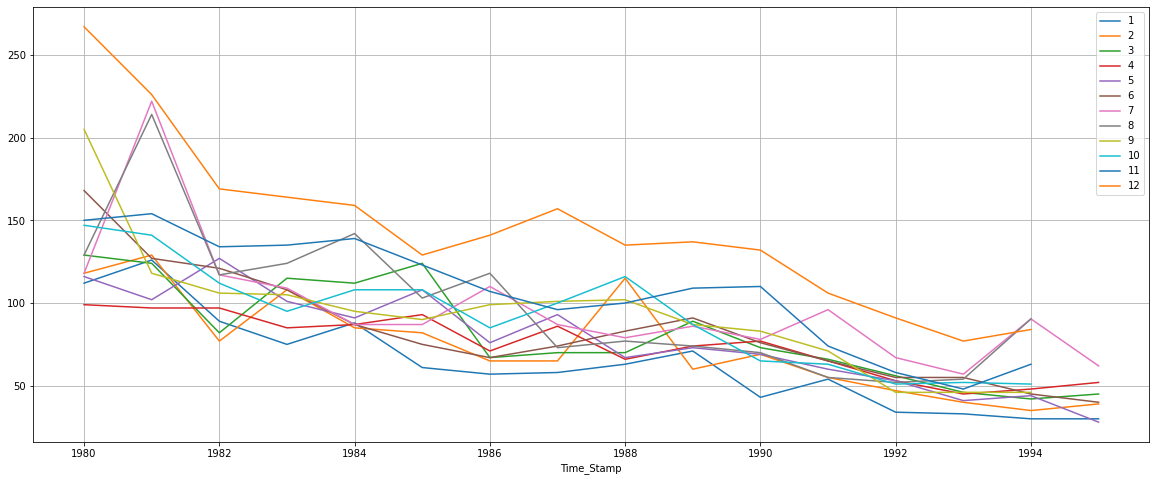

In [189]:
monthly_sales_across_years.plot()
plt.grid()
plt.legend(loc='best');

## Plot the Empirical Cumulative Distribution.

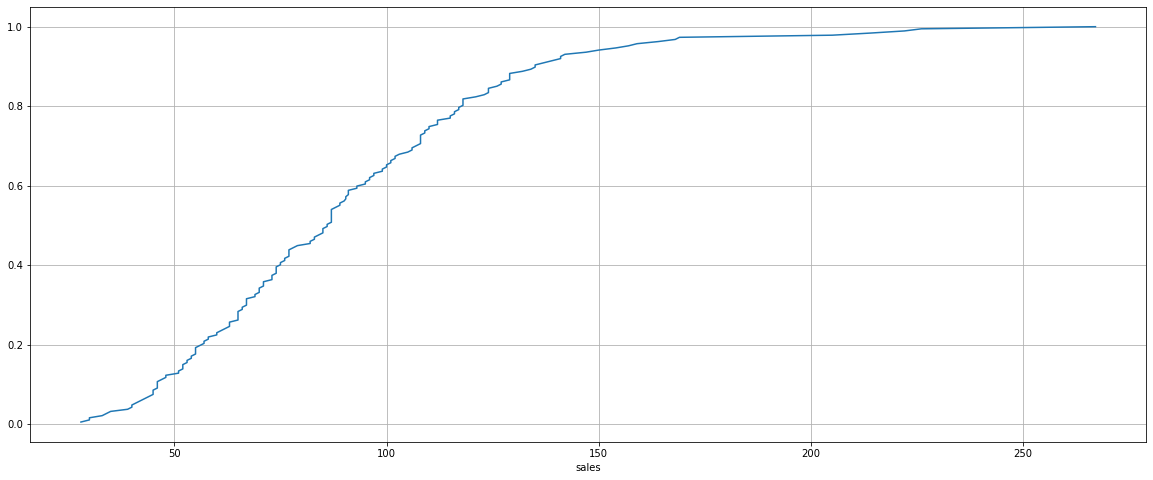

In [190]:
# statistics
from statsmodels.distributions.empirical_distribution import ECDF

plt.figure(figsize = (20, 8))
cdf = ECDF(Rose['Rose'])
plt.plot(cdf.x, cdf.y, label = "statmodels");
plt.grid()
plt.xlabel('sales');

In [191]:
cdf.y

array([0.        , 0.00534759, 0.01069519, 0.01604278, 0.02139037,
       0.02673797, 0.03208556, 0.03743316, 0.04278075, 0.04812834,
       0.05347594, 0.05882353, 0.06417112, 0.06951872, 0.07486631,
       0.0802139 , 0.0855615 , 0.09090909, 0.09625668, 0.10160428,
       0.10695187, 0.11229947, 0.11764706, 0.12299465, 0.12834225,
       0.13368984, 0.13903743, 0.14438503, 0.14973262, 0.15508021,
       0.16042781, 0.1657754 , 0.17112299, 0.17647059, 0.18181818,
       0.18716578, 0.19251337, 0.19786096, 0.20320856, 0.20855615,
       0.21390374, 0.21925134, 0.22459893, 0.22994652, 0.23529412,
       0.24064171, 0.2459893 , 0.2513369 , 0.25668449, 0.26203209,
       0.26737968, 0.27272727, 0.27807487, 0.28342246, 0.28877005,
       0.29411765, 0.29946524, 0.30481283, 0.31016043, 0.31550802,
       0.32085561, 0.32620321, 0.3315508 , 0.3368984 , 0.34224599,
       0.34759358, 0.35294118, 0.35828877, 0.36363636, 0.36898396,
       0.37433155, 0.37967914, 0.38502674, 0.39037433, 0.39572

### Plot the average Sparkling sales per month and the month on month percentage change of Sparkling sales.

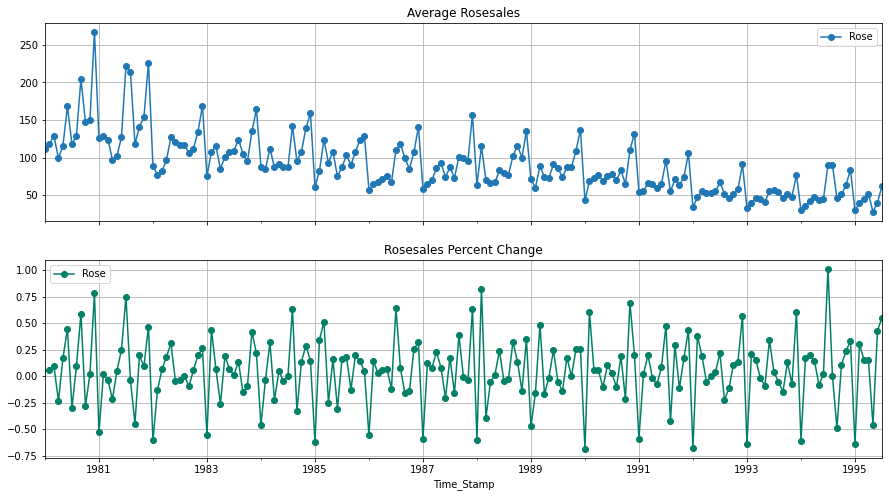

In [192]:
# group by date and get average RetailSales, and precent change
average    = Rose.groupby(Rose.index)["Rose"].mean()
pct_change = Rose.groupby(Rose.index)["Rose"].sum().pct_change()

fig, (axis1,axis2) = plt.subplots(2,1,sharex=True,figsize=(15,8))

# plot average RetailSales over time(year-month)
ax1 = average.plot(legend=True,ax=axis1,marker='o',title="Average Rosesales",grid=True)
ax1.set_xticks(range(len(average)))
ax1.set_xticklabels(average.index.tolist())
# plot precent change for RetailSales over time(year-month)
ax2 = pct_change.plot(legend=True,ax=axis2,marker='o',colormap="summer",title="Rosesales Percent Change",grid=True)

### Decomposition of time series

In [193]:
from statsmodels.tsa.seasonal import seasonal_decompose

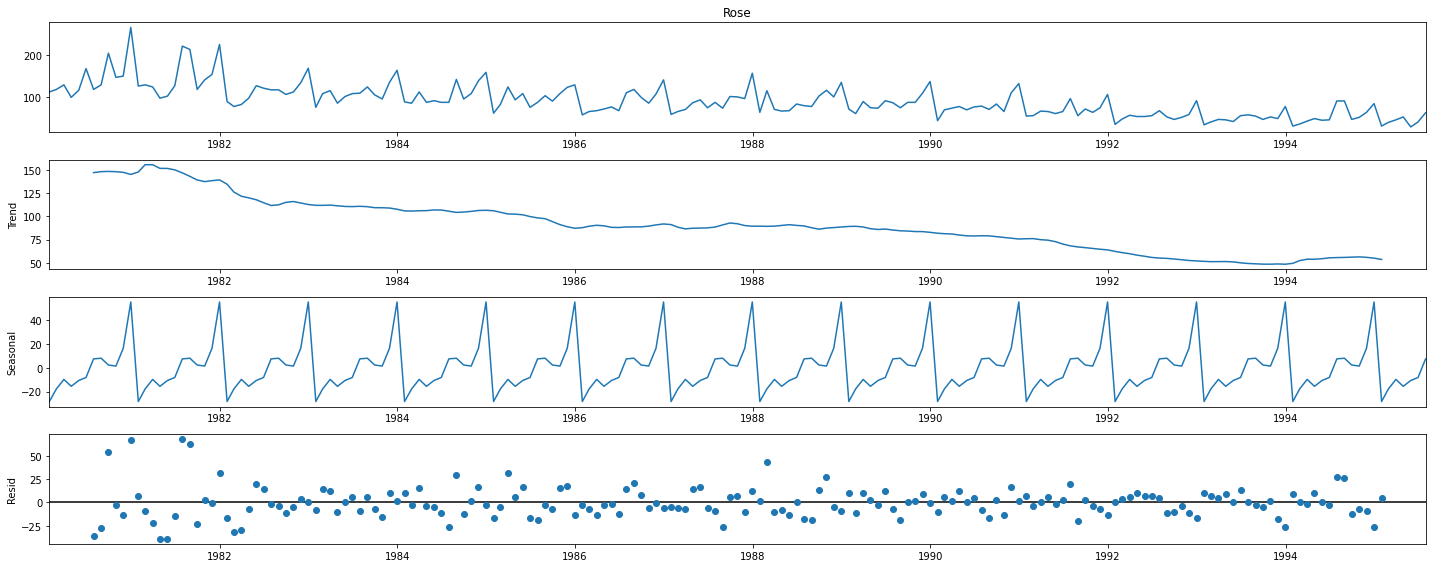

In [194]:
# Additive decomposition
decomposition = seasonal_decompose(Rose['Rose'],model='additive')
decomposition.plot();

In [195]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 Time_Stamp
1980-01-31           NaN
1980-02-29           NaN
1980-03-31           NaN
1980-04-30           NaN
1980-05-31           NaN
1980-06-30           NaN
1980-07-31    147.083333
1980-08-31    148.125000
1980-09-30    148.375000
1980-10-31    148.083333
1980-11-30    147.416667
1980-12-31    145.125000
Name: trend, dtype: float64 

Seasonality 
 Time_Stamp
1980-01-31   -28.403723
1980-02-29   -17.833219
1980-03-31    -9.816537
1980-04-30   -15.629037
1980-05-31   -10.727251
1980-06-30    -8.209394
1980-07-31     7.405916
1980-08-31     7.986472
1980-09-30     2.279610
1980-10-31     1.376832
1980-11-30    16.351832
1980-12-31    55.218499
Name: seasonal, dtype: float64 

Residual 
 Time_Stamp
1980-01-31          NaN
1980-02-29          NaN
1980-03-31          NaN
1980-04-30          NaN
1980-05-31          NaN
1980-06-30          NaN
1980-07-31   -36.489250
1980-08-31   -27.111472
1980-09-30    54.345390
1980-10-31    -2.460165
1980-11-30   -13.768499
1980-12-31    66.65

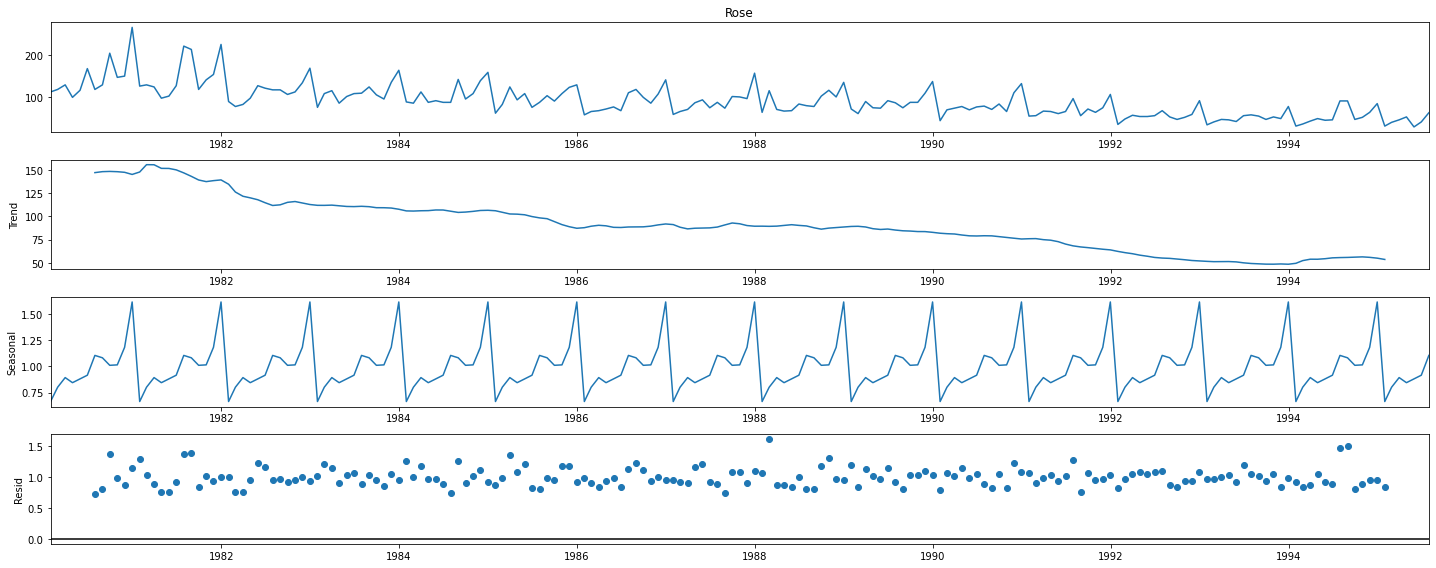

In [196]:
# Multiplicative decomposition
decomposition = seasonal_decompose(Rose['Rose'],model='multiplicative')
decomposition.plot();

In [197]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 Time_Stamp
1980-01-31           NaN
1980-02-29           NaN
1980-03-31           NaN
1980-04-30           NaN
1980-05-31           NaN
1980-06-30           NaN
1980-07-31    147.083333
1980-08-31    148.125000
1980-09-30    148.375000
1980-10-31    148.083333
1980-11-30    147.416667
1980-12-31    145.125000
Name: trend, dtype: float64 

Seasonality 
 Time_Stamp
1980-01-31    0.664388
1980-02-29    0.800694
1980-03-31    0.892495
1980-04-30    0.844044
1980-05-31    0.880516
1980-06-30    0.915220
1980-07-31    1.103899
1980-08-31    1.081169
1980-09-30    1.009574
1980-10-31    1.013692
1980-11-30    1.181135
1980-12-31    1.613174
Name: seasonal, dtype: float64 

Residual 
 Time_Stamp
1980-01-31         NaN
1980-02-29         NaN
1980-03-31         NaN
1980-04-30         NaN
1980-05-31         NaN
1980-06-30         NaN
1980-07-31    0.726757
1980-08-31    0.805504
1980-09-30    1.368532
1980-10-31    0.979276
1980-11-30    0.861480
1980-12-31    1.140480
Name: resid, dtype:

### 3. Split the data into training and test. The test data should start in 1991.

In [198]:
train = Rose[Rose.index.year < 1991]
test = Rose[Rose.index.year >= 1991]

In [199]:
## This is to display multiple data frames from one cell
from IPython.display import display

In [200]:
print('First few rows of Training Data')
display(train.head())
print('Last few rows of Training Data')
display(train.tail())
print('First few rows of Test Data')
display(test.head())
print('Last few rows of Test Data')
display(test.tail())

First few rows of Training Data


Rose
Time_Stamp       
1980-01-31  112.0
1980-02-29  118.0
1980-03-31  129.0
1980-04-30   99.0
1980-05-31  116.0

Last few rows of Training Data


Rose
Time_Stamp       
1990-08-31   70.0
1990-09-30   83.0
1990-10-31   65.0
1990-11-30  110.0
1990-12-31  132.0

First few rows of Test Data


Rose
Time_Stamp      
1991-01-31  54.0
1991-02-28  55.0
1991-03-31  66.0
1991-04-30  65.0
1991-05-31  60.0

Last few rows of Test Data


Rose
Time_Stamp      
1995-03-31  45.0
1995-04-30  52.0
1995-05-31  28.0
1995-06-30  40.0
1995-07-31  62.0

In [201]:
print(train.shape)
print(test.shape)

(132, 1)
(55, 1)


### 4. Build all the exponential smoothing models on the training data and evaluate the model using RMSE on the test data. Other models such as regression,naïve forecast models and simple average models. should also be built on the training data and check the performance on the test data using RMSE.

### Model 1 - Linear Regression

In [202]:
train_time = [i+1 for i in range(len(train))]
test_time = [i+133 for i in range(len(test))]
print('Training Time instance','\n',train_time)
print('Test Time instance','\n',test_time)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132]
Test Time instance 
 [133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187]


In [203]:
LinearRegression_train = train.copy()
LinearRegression_test = test.copy()

In [204]:
LinearRegression_train['time'] = train_time
LinearRegression_test['time'] = test_time

print('First few rows of Training Data','\n',LinearRegression_train.head(),'\n')
print('Last few rows of Training Data','\n',LinearRegression_train.tail(),'\n')
print('First few rows of Test Data','\n',LinearRegression_test.head(),'\n')
print('Last few rows of Test Data','\n',LinearRegression_test.tail(),'\n')

First few rows of Training Data 
              Rose  time
Time_Stamp             
1980-01-31  112.0     1
1980-02-29  118.0     2
1980-03-31  129.0     3
1980-04-30   99.0     4
1980-05-31  116.0     5 

Last few rows of Training Data 
              Rose  time
Time_Stamp             
1990-08-31   70.0   128
1990-09-30   83.0   129
1990-10-31   65.0   130
1990-11-30  110.0   131
1990-12-31  132.0   132 

First few rows of Test Data 
             Rose  time
Time_Stamp            
1991-01-31  54.0   133
1991-02-28  55.0   134
1991-03-31  66.0   135
1991-04-30  65.0   136
1991-05-31  60.0   137 

Last few rows of Test Data 
             Rose  time
Time_Stamp            
1995-03-31  45.0   183
1995-04-30  52.0   184
1995-05-31  28.0   185
1995-06-30  40.0   186
1995-07-31  62.0   187 



In [205]:
from sklearn.linear_model import LinearRegression

In [206]:
lr = LinearRegression()

In [207]:
lr.fit(LinearRegression_train[['time']],LinearRegression_train['Rose'].values)

LinearRegression()

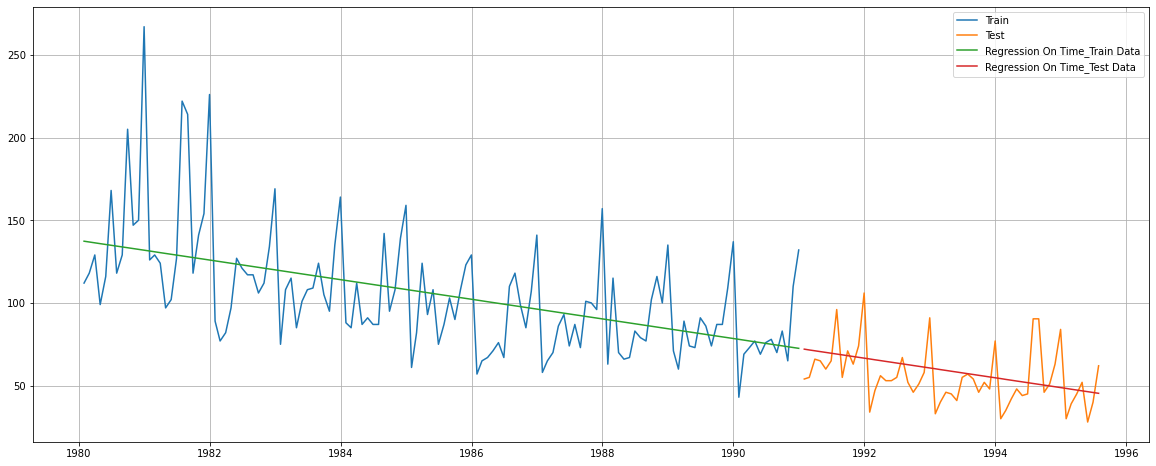

In [208]:
train_predictions_model1 = lr.predict(LinearRegression_train[['time']])
LinearRegression_train['RegOnTime'] = train_predictions_model1
test_predictions_model1 = lr.predict(LinearRegression_test[['time']])
LinearRegression_test['RegOnTime'] = test_predictions_model1

plt.figure(figsize=(20,8))
plt.plot( train['Rose'], label='Train')
plt.plot(test['Rose'], label='Test')
plt.plot(LinearRegression_train['RegOnTime'], label='Regression On Time_Train Data')
plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')
plt.legend(loc='best')
plt.grid();

### Model Evaluation

In [209]:
from sklearn import metrics

In [210]:
def MAPE(y, yhat):
    y, yhat = np.array(y),np.array(yhat)
    try:
        mape = round(np.sum(np.abs(yhat-y))/np.sum(y) * 100,2)
    except:
        print("Observed Values are empty")
        mape=np.nan
    return mape

In [211]:
import math
rmse = metrics.mean_squared_error(test['Rose'],test_predictions_model1)
math.sqrt(rmse)

16.979413812873954

In [212]:
## Train Data - RMSE and MAPE
rmse_model1_train = metrics.mean_squared_error(train['Rose'],train_predictions_model1,squared=False)
mape_model1_train = MAPE(train['Rose'],train_predictions_model1)
mape_model1_train

21.22

In [213]:
## Test Data - RMSE

rmse_model1_test = metrics.mean_squared_error(test['Rose'],test_predictions_model1,squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f" %(rmse_model1_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 16.979


In [214]:
mape_model1_test = MAPE(test['Rose'],test_predictions_model1)
mape_model1_test

24.36

In [215]:
resultsDf = pd.DataFrame({'Test RMSE': [rmse_model1_test],'Test MAPE': [mape_model1_test]},index=['RegressionOnTime'])
resultsDf

Test RMSE  Test MAPE
RegressionOnTime  16.979414      24.36

## Model 2: Naive Approach: $\hat{y}_{t+1} = y_t$

In [216]:
NaiveModel_train = train.copy()
NaiveModel_test = test.copy()

In [217]:
train.tail()

Rose
Time_Stamp       
1990-08-31   70.0
1990-09-30   83.0
1990-10-31   65.0
1990-11-30  110.0
1990-12-31  132.0

In [218]:
NaiveModel_train['naive'] = np.asarray(train['Rose'])[len(np.asarray(train['Rose']))-1]
NaiveModel_train['naive'].head()

Time_Stamp
1980-01-31    132.0
1980-02-29    132.0
1980-03-31    132.0
1980-04-30    132.0
1980-05-31    132.0
Name: naive, dtype: float64

In [219]:
NaiveModel_test['naive'] = np.asarray(train['Rose'])[len(np.asarray(train['Rose']))-1]
NaiveModel_test['naive'].head()

Time_Stamp
1991-01-31    132.0
1991-02-28    132.0
1991-03-31    132.0
1991-04-30    132.0
1991-05-31    132.0
Name: naive, dtype: float64

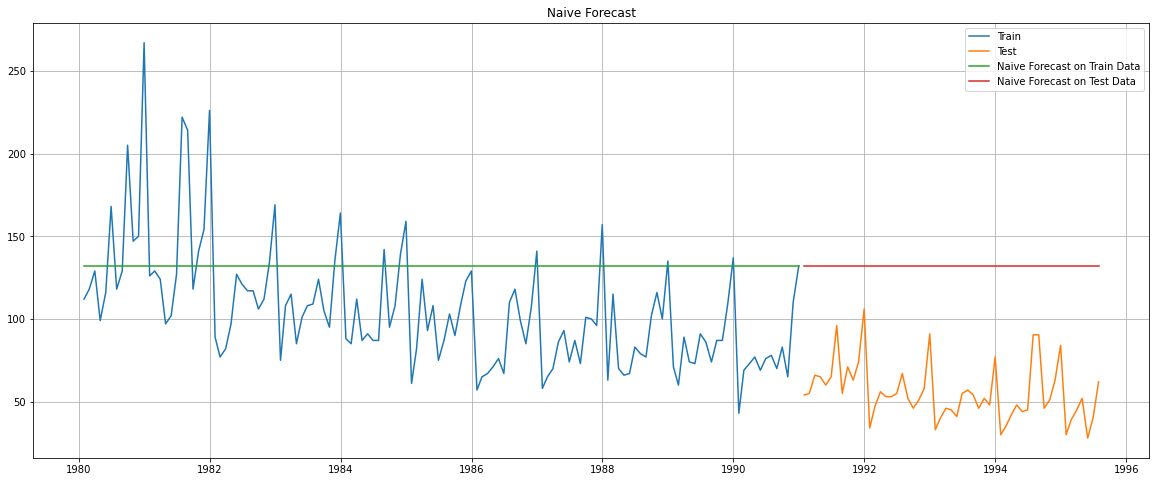

In [220]:
plt.figure(figsize=(20,8))
plt.plot(NaiveModel_train['Rose'], label='Train')
plt.plot(test['Rose'], label='Test')
plt.plot(NaiveModel_train['naive'], label='Naive Forecast on Train Data')
plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')
plt.legend(loc='best')
plt.title("Naive Forecast")
plt.grid();

### Model Evaluation

In [221]:
## Train Data - RMSE and MAPE

rmse_model2_train = metrics.mean_squared_error(train['Rose'],NaiveModel_train['naive'],squared=False)
mape_model2_train = MAPE(train['Rose'],NaiveModel_train['naive'])
rmse_model2_train, mape_model2_train

(45.06375954403299, 36.38)

In [222]:
## Test Data - RMSE

rmse_model2_test = metrics.mean_squared_error(test['Rose'],NaiveModel_test['naive'],squared=False)
mape_model2_test = MAPE(test['Rose'],NaiveModel_test['naive'])
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f" %(rmse_model2_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 78.396


In [223]:
resultsDf_2 = pd.DataFrame({'Test RMSE': [rmse_model2_test],'Test MAPE': [mape_model2_test]},index=['NaiveModel'])

resultsDf = pd.concat([resultsDf, resultsDf_2])
resultsDf

Test RMSE  Test MAPE
RegressionOnTime  16.979414      24.36
NaiveModel        78.396083     137.89

## Method 3: Simple Average

In [224]:
SimpleAverage_train = train.copy()
SimpleAverage_test = test.copy()

In [225]:
SimpleAverage_train['mean_forecast'] = train['Rose'].mean()
SimpleAverage_train.head()

Rose  mean_forecast
Time_Stamp                      
1980-01-31  112.0     104.939394
1980-02-29  118.0     104.939394
1980-03-31  129.0     104.939394
1980-04-30   99.0     104.939394
1980-05-31  116.0     104.939394

In [226]:
SimpleAverage_test['mean_forecast'] = train['Rose'].mean()
SimpleAverage_test.head()

Rose  mean_forecast
Time_Stamp                     
1991-01-31  54.0     104.939394
1991-02-28  55.0     104.939394
1991-03-31  66.0     104.939394
1991-04-30  65.0     104.939394
1991-05-31  60.0     104.939394

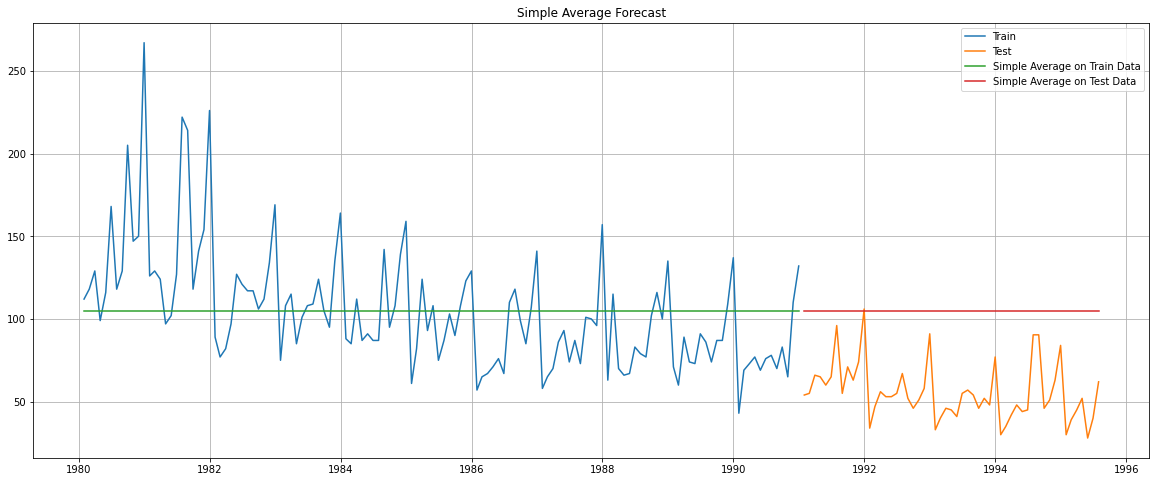

In [227]:
plt.figure(figsize=(20,8))
plt.plot(SimpleAverage_train['Rose'], label='Train')
plt.plot(SimpleAverage_test['Rose'], label='Test')
plt.plot(SimpleAverage_train['mean_forecast'], label='Simple Average on Train Data')
plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')
plt.legend(loc='best')
plt.title("Simple Average Forecast")
plt.grid();

### Model Evaluation

In [228]:
## Train and Test Data - RMSE  and MAPE

rmse_model3_train = metrics.mean_squared_error(train['Rose'],SimpleAverage_train['mean_forecast'],squared=False)
mape_model3_train = MAPE(train['Rose'],SimpleAverage_train['mean_forecast'])
rmse_model3_test = metrics.mean_squared_error(test['Rose'],SimpleAverage_test['mean_forecast'],squared=False)
mape_model3_test = MAPE(test['Rose'],SimpleAverage_test['mean_forecast'])


In [229]:
resultsDf_3 = pd.DataFrame({'Test RMSE': [rmse_model3_test],'Test MAPE': [mape_model3_test]},index=['SimpleAverageModel'])

resultsDf = pd.concat([resultsDf, resultsDf_3])
resultsDf

Test RMSE  Test MAPE
RegressionOnTime    16.979414      24.36
NaiveModel          78.396083     137.89
SimpleAverageModel  52.318735      89.19

## Method 4: Moving Average(MA)

In [230]:
MovingAverage = Rose.copy()
MovingAverage.head()

Rose
Time_Stamp       
1980-01-31  112.0
1980-02-29  118.0
1980-03-31  129.0
1980-04-30   99.0
1980-05-31  116.0

In [231]:

MovingAverage['Trailing_2'] = MovingAverage['Rose'].rolling(2).mean()
MovingAverage['Trailing_4'] = MovingAverage['Rose'].rolling(4).mean()
MovingAverage['Trailing_6'] = MovingAverage['Rose'].rolling(6).mean()
MovingAverage['Trailing_9'] = MovingAverage['Rose'].rolling(9).mean()

MovingAverage.head(10)

Rose  Trailing_2  Trailing_4  Trailing_6  Trailing_9
Time_Stamp                                                       
1980-01-31  112.0         NaN         NaN         NaN         NaN
1980-02-29  118.0       115.0         NaN         NaN         NaN
1980-03-31  129.0       123.5         NaN         NaN         NaN
1980-04-30   99.0       114.0      114.50         NaN         NaN
1980-05-31  116.0       107.5      115.50         NaN         NaN
1980-06-30  168.0       142.0      128.00  123.666667         NaN
1980-07-31  118.0       143.0      125.25  124.666667         NaN
1980-08-31  129.0       123.5      132.75  126.500000         NaN
1980-09-30  205.0       167.0      155.00  139.166667  132.666667
1980-10-31  147.0       176.0      149.75  147.166667  136.555556

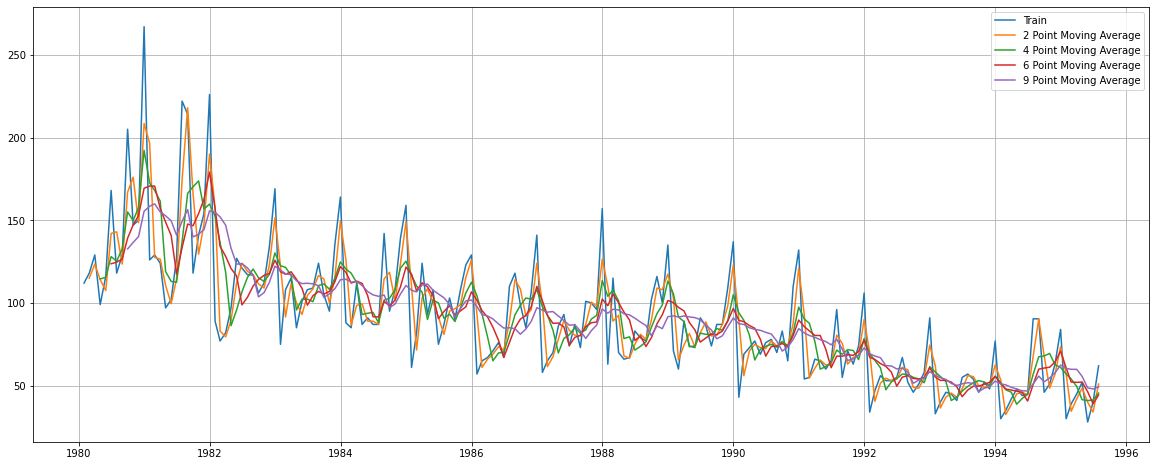

In [232]:
## Plotting on the whole data

plt.figure(figsize=(20,8))
plt.plot(MovingAverage['Rose'], label='Train')
plt.plot(MovingAverage['Trailing_2'], label='2 Point Moving Average')
plt.plot(MovingAverage['Trailing_4'], label='4 Point Moving Average')
plt.plot(MovingAverage['Trailing_6'],label = '6 Point Moving Average')
plt.plot(MovingAverage['Trailing_9'],label = '9 Point Moving Average')

plt.legend(loc = 'best')
plt.grid();

In [233]:
#Creating train and test set 
trailing_MovingAverage_train = MovingAverage[MovingAverage.index.year < 1991]
trailing_MovingAverage_test = MovingAverage[MovingAverage.index.year >= 1991]

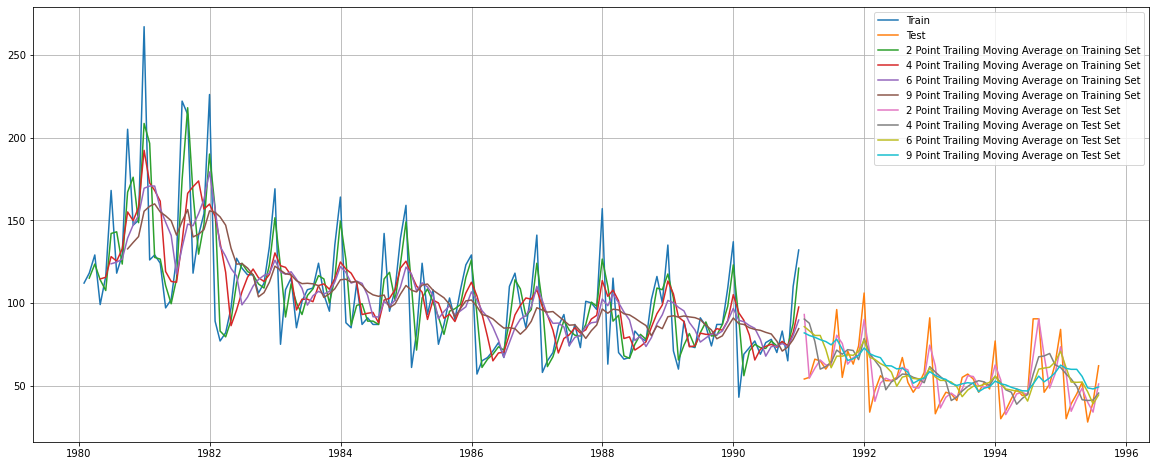

In [234]:
## Plotting on both the Training and Test data

plt.figure(figsize=(20,8))
plt.plot(trailing_MovingAverage_train['Rose'], label='Train')
plt.plot(trailing_MovingAverage_test['Rose'], label='Test')

plt.plot(trailing_MovingAverage_train['Trailing_2'], label='2 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_4'], label='4 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_6'],label = '6 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_9'],label = '9 Point Trailing Moving Average on Training Set')

plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_4'], label='4 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_6'],label = '6 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_9'],label = '9 Point Trailing Moving Average on Test Set')
plt.legend(loc = 'best')
plt.grid();

In [235]:
## Test Data - RMSE --> 2 point Trailing MA

rmse_model4_test_2 = metrics.mean_squared_error(test['Rose'],trailing_MovingAverage_test['Trailing_2'],squared=False)
mape_model4_test_2=MAPE(test['Rose'],trailing_MovingAverage_test['Trailing_2'])
print("For 2 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_2))

## Test Data - RMSE  --> 4 point Trailing MA


rmse_model4_test_4 = metrics.mean_squared_error(test['Rose'],trailing_MovingAverage_test['Trailing_4'],squared=False)
mape_model4_test_4=MAPE(test['Rose'],trailing_MovingAverage_test['Trailing_4'])
print("For 4 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_4))

## Test Data - RMSE --> 6 point Trailing MA


rmse_model4_test_6 = metrics.mean_squared_error(test['Rose'],trailing_MovingAverage_test['Trailing_6'],squared=False)
mape_model4_test_6=MAPE(test['Rose'],trailing_MovingAverage_test['Trailing_6'])
print("For 6 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_6))

## Test Data - RMSE  --> 9 point Trailing MA


rmse_model4_test_9 = metrics.mean_squared_error(test['Rose'],trailing_MovingAverage_test['Trailing_9'],squared=False)
mape_model4_test_9=MAPE(test['Rose'],trailing_MovingAverage_test['Trailing_9'])
print("For 9 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f " %(rmse_model4_test_9))

For 2 point Moving Average Model forecast on the Training Data,  RMSE is 12.298
For 4 point Moving Average Model forecast on the Training Data,  RMSE is 15.846
For 6 point Moving Average Model forecast on the Training Data,  RMSE is 15.986
For 9 point Moving Average Model forecast on the Training Data,  RMSE is 16.501 


In [236]:
resultsDf_4 = pd.DataFrame({'Test RMSE': [rmse_model4_test_2,rmse_model4_test_4
                                          ,rmse_model4_test_6,rmse_model4_test_9],'Test MAPE': [mape_model4_test_2,mape_model4_test_4
                                          ,mape_model4_test_6,mape_model4_test_9]}
                           ,index=['2pointTrailingMovingAverage','4pointTrailingMovingAverage'
                                   ,'6pointTrailingMovingAverage','9pointTrailingMovingAverage'])

resultsDf = pd.concat([resultsDf, resultsDf_4])
resultsDf

Test RMSE  Test MAPE
RegressionOnTime             16.979414      24.36
NaiveModel                   78.396083     137.89
SimpleAverageModel           52.318735      89.19
2pointTrailingMovingAverage  12.298291      14.59
4pointTrailingMovingAverage  15.845558      21.55
6pointTrailingMovingAverage  15.986163      22.40
9pointTrailingMovingAverage  16.500823      23.18

## Before we go on to build the various Exponential Smoothing models, let us plot all the models and compare the Time Series plots.

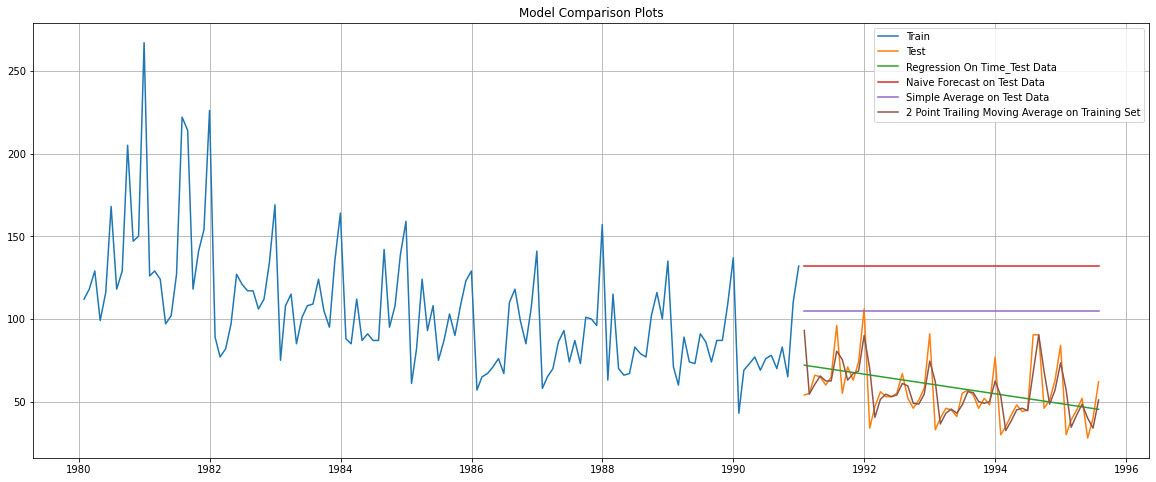

In [237]:
## Plotting on both Training and Test data

plt.figure(figsize=(20,8))
plt.plot(train['Rose'], label='Train')
plt.plot(test['Rose'], label='Test')

plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')

plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')

plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')

plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Training Set')


plt.legend(loc='best')
plt.title("Model Comparison Plots")
plt.grid();

## Method 5: Simple Exponential Smoothing

In [238]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [239]:
SES_train = train.copy()
SES_test = test.copy()

In [240]:
model_SES = SimpleExpSmoothing(SES_train['Rose'])

In [241]:
model_SES_autofit = model_SES.fit(optimized=True)

In [242]:
model_SES_autofit.params

{'smoothing_level': 0.09874995336438987,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 134.38681121931316,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [243]:
SES_train.tail()

Rose
Time_Stamp       
1990-08-31   70.0
1990-09-30   83.0
1990-10-31   65.0
1990-11-30  110.0
1990-12-31  132.0

In [244]:
SES_test['predict'] = model_SES_autofit.forecast(steps=len(test))
SES_test.head()

Rose    predict
Time_Stamp                 
1991-01-31  54.0  87.105001
1991-02-28  55.0  87.105001
1991-03-31  66.0  87.105001
1991-04-30  65.0  87.105001
1991-05-31  60.0  87.105001

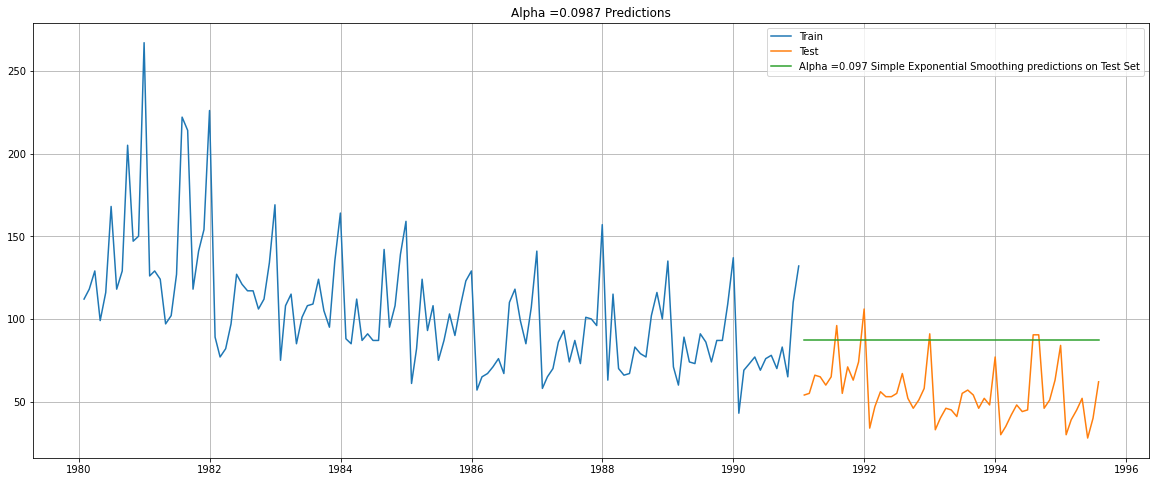

In [245]:
## Plotting on both the Training and Test data

plt.figure(figsize=(20,8))
plt.plot(SES_train['Rose'], label='Train')
plt.plot(SES_test['Rose'], label='Test')

plt.plot(SES_test['predict'], label='Alpha =0.097 Simple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid() 
plt.title('Alpha =0.0987 Predictions');

### Model Evaluation for $\alpha$ = 0.0987 : Simple Exponential Smoothing

In [246]:
## Test Data

rmse_model5_test_1 = metrics.mean_squared_error(SES_test['Rose'],SES_test['predict'],squared=False)
mape_model5_test_1 = MAPE(SES_test['Rose'],SES_test['predict'])
print("For Alpha =0.0987 Simple Exponential Smoothing Model forecast on the Test Data, RMSE is %3.3f" %(rmse_model5_test_1))


For Alpha =0.0987 Simple Exponential Smoothing Model forecast on the Test Data, RMSE is 35.936


In [247]:
resultsDf_5 = pd.DataFrame({'Test RMSE': [rmse_model5_test_1],'Test MAPE': [mape_model5_test_1]},index=['Alpha=0.0987,SimpleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_5])
resultsDf

Test RMSE  Test MAPE
RegressionOnTime                         16.979414      24.36
NaiveModel                               78.396083     137.89
SimpleAverageModel                       52.318735      89.19
2pointTrailingMovingAverage              12.298291      14.59
4pointTrailingMovingAverage              15.845558      21.55
6pointTrailingMovingAverage              15.986163      22.40
9pointTrailingMovingAverage              16.500823      23.18
Alpha=0.0987,SimpleExponentialSmoothing  35.936214      59.49

In [248]:
## First we will define an empty dataframe to store our values from the loop

resultsDf_6 = pd.DataFrame({'Alpha Values':[],'Train RMSE':[],'Train MAPE':[],'Test RMSE': [],'Test MAPE': []})
resultsDf_6

Empty DataFrame
Columns: [Alpha Values, Train RMSE, Train MAPE, Test RMSE, Test MAPE]
Index: []

In [249]:
for i in np.arange(0.1,1,0.1):
    model_SES_alpha_i = model_SES.fit(smoothing_level=i,optimized=False,use_brute=True)
    SES_train['predict',i] = model_SES_alpha_i.fittedvalues
    SES_test['predict',i] = model_SES_alpha_i.forecast(len(test['Rose']))
    
    rmse_model5_train_i = metrics.mean_squared_error(SES_train['Rose'],SES_train['predict',i],squared=False)
    mape_model5_train_i = MAPE(SES_train['Rose'],SES_train['predict',i])
    
    rmse_model5_test_i = metrics.mean_squared_error(SES_test['Rose'],SES_test['predict',i],squared=False)
    mape_model5_test_i = MAPE(SES_test['Rose'],SES_test['predict',i])
    
    resultsDf_6 = resultsDf_6.append({'Alpha Values':i,'Train RMSE':rmse_model5_train_i 
                                      ,'Train MAPE':mape_model5_train_i
                                      ,'Test RMSE':rmse_model5_test_i
                                      ,'Test MAPE':mape_model5_test_i }, ignore_index=True)

## Model Evaluation

In [250]:
resultsDf_6.sort_values(by=['Test MAPE'])

Alpha Values  Train RMSE  Train MAPE  Test RMSE  Test MAPE
0           0.1   31.815610       22.47  35.967167      59.54
1           0.2   31.979391       22.20  40.397472      67.14
2           0.3   32.470164       22.31  46.437040      78.30
3           0.4   33.035130       22.50  52.622270      89.75
4           0.5   33.682839       22.68  58.440933     100.73
5           0.6   34.441171       22.88  63.729750     110.65
6           0.7   35.323261       23.08  68.426395     119.42
7           0.8   36.334596       23.41  72.479641     126.95
8           0.9   37.482782       23.93  75.828283     133.15

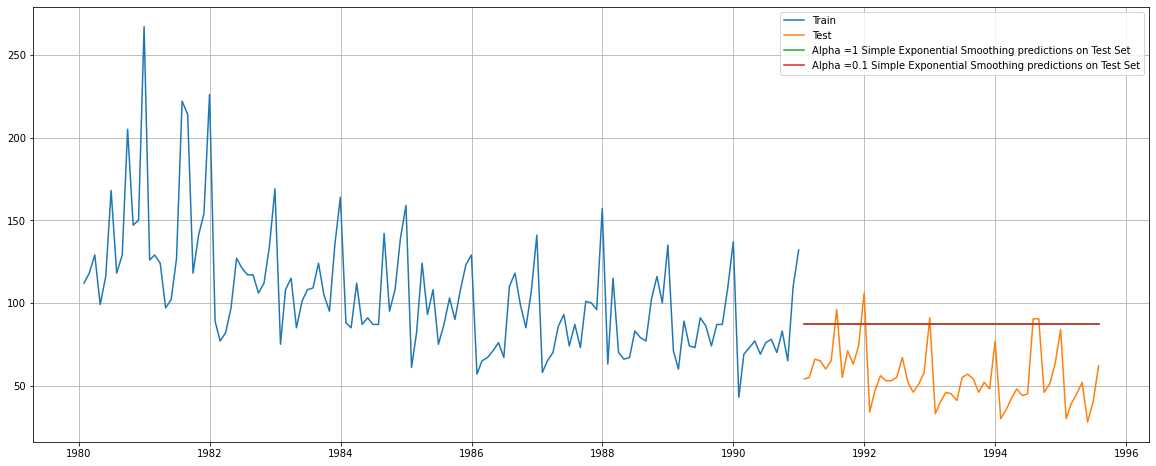

In [251]:
## Plotting on both the Training and Test data

plt.figure(figsize=(20,8))
plt.plot(SES_train['Rose'], label='Train')
plt.plot(SES_test['Rose'], label='Test')

plt.plot(SES_test['predict'], label='Alpha =1 Simple Exponential Smoothing predictions on Test Set')

plt.plot(SES_test['predict', 0.1], label='Alpha =0.1 Simple Exponential Smoothing predictions on Test Set')



plt.legend(loc='best')
plt.grid();

In [252]:
resultsDf_6_1 = pd.DataFrame({'Test RMSE': [resultsDf_6['Test RMSE'][1],resultsDf_6['Test RMSE'][2]]
                             ,'Test MAPE': [resultsDf_6['Test MAPE'][1],resultsDf_6['Test MAPE'][2]]}
                           ,index=['Alpha=0.1,SimpleExponentialSmoothing','Alpha=0.2,SimpleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_6_1])
resultsDf

Test RMSE  Test MAPE
RegressionOnTime                         16.979414      24.36
NaiveModel                               78.396083     137.89
SimpleAverageModel                       52.318735      89.19
2pointTrailingMovingAverage              12.298291      14.59
4pointTrailingMovingAverage              15.845558      21.55
6pointTrailingMovingAverage              15.986163      22.40
9pointTrailingMovingAverage              16.500823      23.18
Alpha=0.0987,SimpleExponentialSmoothing  35.936214      59.49
Alpha=0.1,SimpleExponentialSmoothing     40.397472      67.14
Alpha=0.2,SimpleExponentialSmoothing     46.437040      78.30

## Method 6: Double Exponential Smoothing (Holt's Model)

##### Two parameters $\alpha$ and $\beta$ are estimated in this model. Level and Trend are accounted for in this model.

In [253]:
DES_train = train.copy()
DES_test = test.copy()

In [254]:
model_DES = Holt(DES_train['Rose'])

In [255]:
model_DES_autofit = model_DES.fit()

In [256]:
model_DES_autofit.params

{'smoothing_level': 0.12981260063088668,
 'smoothing_trend': 0.05376220098709802,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 145.73070601479063,
 'initial_trend': -0.10069596155782001,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [257]:
DES_train.tail()

Rose
Time_Stamp       
1990-08-31   70.0
1990-09-30   83.0
1990-10-31   65.0
1990-11-30  110.0
1990-12-31  132.0

In [258]:
DES_test['predict'] = model_DES_autofit.forecast(steps=len(test))
DES_test.head()

Rose    predict
Time_Stamp                 
1991-01-31  54.0  86.161875
1991-02-28  55.0  86.247204
1991-03-31  66.0  86.332532
1991-04-30  65.0  86.417860
1991-05-31  60.0  86.503188

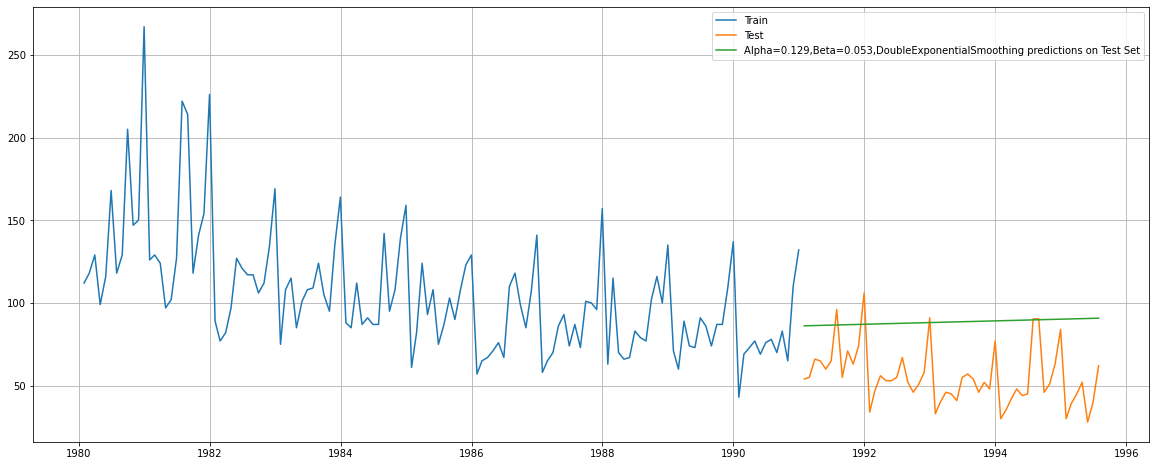

In [259]:
## Plotting on both the Training and Test using autofit

plt.figure(figsize=(20,8))
plt.plot(DES_train['Rose'], label='Train')
plt.plot(DES_test['Rose'], label='Test')

plt.plot(DES_test['predict'], label='Alpha=0.129,Beta=0.053,DoubleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

### Model Evaluation for $\alpha$ = 0.129, $\beta$ =0.043: Double Exponential Smoothing

In [260]:
## Test Data

rmse_model6_test_1 = metrics.mean_squared_error(DES_test['Rose'],DES_test['predict'],squared=False)
mape_model6_test_1 = MAPE(DES_test['Rose'],DES_test['predict'])
print("For Alpha =0.129,Beta=0.053 Double Exponential Smoothing Model forecast on the Test Data, RMSE is %3.3f" %(rmse_model6_test_1))



For Alpha =0.129,Beta=0.053 Double Exponential Smoothing Model forecast on the Test Data, RMSE is 37.339


In [261]:
resultsDf_7 = pd.DataFrame({'Test RMSE': [rmse_model6_test_1],'Test MAPE': [mape_model6_test_1]},index=['Alpha =0.129,Beta=0.053 Double Exponential Smoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_7])
resultsDf

Test RMSE  Test MAPE
RegressionOnTime                                    16.979414      24.36
NaiveModel                                          78.396083     137.89
SimpleAverageModel                                  52.318735      89.19
2pointTrailingMovingAverage                         12.298291      14.59
4pointTrailingMovingAverage                         15.845558      21.55
6pointTrailingMovingAverage                         15.986163      22.40
9pointTrailingMovingAverage                         16.500823      23.18
Alpha=0.0987,SimpleExponentialSmoothing             35.936214      59.49
Alpha=0.1,SimpleExponentialSmoothing                40.397472      67.14
Alpha=0.2,SimpleExponentialSmoothing                46.437040      78.30
Alpha =0.129,Beta=0.053 Double Exponential Smoo...  37.338507      61.55

In [262]:
## First we will define an empty dataframe to store our values from the loop

resultsDf_7 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Train RMSE':[],'Train MAPE':[],'Test RMSE': [],'Test MAPE':[]})
resultsDf_7

Empty DataFrame
Columns: [Alpha Values, Beta Values, Train RMSE, Train MAPE, Test RMSE, Test MAPE]
Index: []

In [263]:
for i in np.arange(0.1,1.1,0.1):
    for j in np.arange(0.1,1.1,0.1):
        model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_trend=j,optimized=False,use_brute=True)
        DES_train['predict',i,j] = model_DES_alpha_i_j.fittedvalues
        DES_test['predict',i,j] = model_DES_alpha_i_j.forecast(len(test['Rose']))
        
        rmse_model6_train = metrics.mean_squared_error(DES_train['Rose'],DES_train['predict',i,j],squared=False)
        mape_model6_train = MAPE(DES_train['Rose'],DES_train['predict',i,j])
        
        rmse_model6_test = metrics.mean_squared_error(DES_test['Rose'],DES_test['predict',i,j],squared=False)
        mape_model6_test = MAPE(DES_test['Rose'],DES_test['predict',i,j])
        resultsDf_7 = resultsDf_7.append({'Alpha Values':i,'Beta Values':j,'Train RMSE':rmse_model6_train, 'Train MAPE':mape_model6_train,
                                          'Test RMSE':rmse_model6_test,'Test MAPE':mape_model6_test}, ignore_index=True)

In [264]:
resultsDf_7

Alpha Values  Beta Values  Train RMSE  Train MAPE   Test RMSE  Test MAPE
0            0.1          0.1   34.439111       24.83   35.999680      59.20
1            0.1          0.2   33.450729       24.45   47.365373      77.70
2            0.1          0.3   33.145789       24.46   76.462652     124.44
3            0.1          0.4   33.262191       24.68   97.767003     157.72
4            0.1          0.5   33.688415       24.92  122.366868     196.43
..           ...          ...         ...         ...         ...        ...
95           1.0          0.6   51.831610       34.67  799.538675    1281.96
96           1.0          0.7   54.497039       36.43  839.747831    1345.07
97           1.0          0.8   57.365879       38.27  851.819895    1364.01
98           1.0          0.9   60.474309       40.21  832.566741    1333.80
99           1.0          1.0   63.873454       42.49  777.939896    1248.06

[100 rows x 6 columns]

In [265]:
resultsDf_7.sort_values(by=['Test MAPE']).head(10)

Alpha Values  Beta Values  Train RMSE  Train MAPE   Test RMSE  Test MAPE
0            0.1          0.1   34.439111       24.83   35.999680      59.20
1            0.1          0.2   33.450729       24.45   47.365373      77.70
10           0.2          0.1   33.097427       23.69   64.212172     106.93
2            0.1          0.3   33.145789       24.46   76.462652     124.44
3            0.1          0.4   33.262191       24.68   97.767003     157.72
20           0.3          0.1   33.611269       23.80   96.915102     162.17
11           0.2          0.2   33.591496       24.25  112.193445     183.86
4            0.1          0.5   33.688415       24.92  122.366868     196.43
30           0.4          0.1   34.255060       23.84  127.144675     213.06
5            0.1          0.6   34.271715       25.24  155.342941     248.22

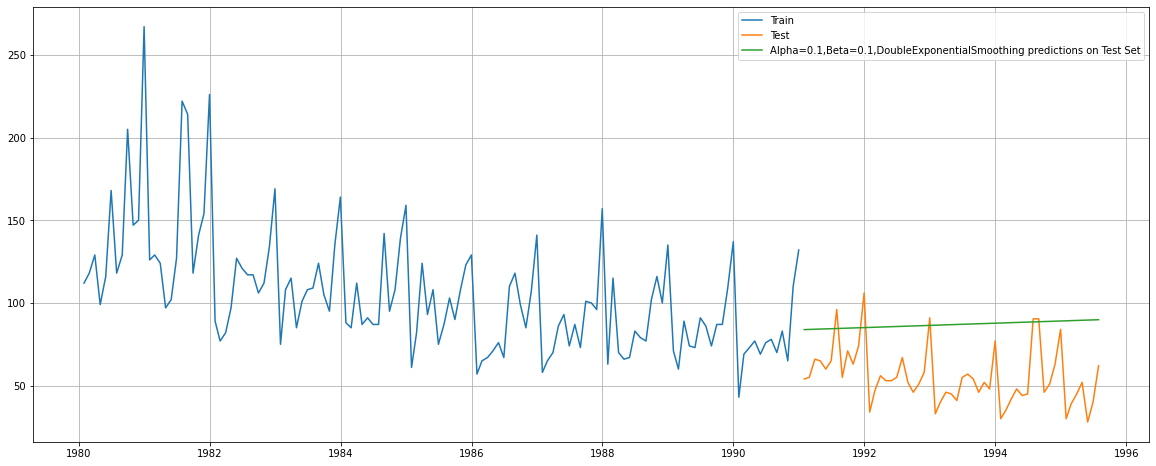

In [266]:
## Plotting on both the Training and Test data

plt.figure(figsize=(20,8))
plt.plot(DES_train['Rose'], label='Train')
plt.plot(DES_test['Rose'], label='Test')

plt.plot(DES_test['predict', 0.1, 0.1], label='Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

In [267]:
resultsDf_7_1 = pd.DataFrame({'Test RMSE': [resultsDf_7['Test RMSE'][0]],'Test MAPE': [resultsDf_7['Test MAPE'][0]]}
                           ,index=['Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_7_1])
resultsDf

Test RMSE  Test MAPE
RegressionOnTime                                    16.979414      24.36
NaiveModel                                          78.396083     137.89
SimpleAverageModel                                  52.318735      89.19
2pointTrailingMovingAverage                         12.298291      14.59
4pointTrailingMovingAverage                         15.845558      21.55
6pointTrailingMovingAverage                         15.986163      22.40
9pointTrailingMovingAverage                         16.500823      23.18
Alpha=0.0987,SimpleExponentialSmoothing             35.936214      59.49
Alpha=0.1,SimpleExponentialSmoothing                40.397472      67.14
Alpha=0.2,SimpleExponentialSmoothing                46.437040      78.30
Alpha =0.129,Beta=0.053 Double Exponential Smoo...  37.338507      61.55
Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing       35.999680      59.20

## Method 7: Triple Exponential Smoothing (Holt - Winter's Model)

##### Three parameters $\alpha$, $\beta$ and $\gamma$ are estimated in this model. Level, Trend and Seasonality are accounted for in this model.

In [268]:
TES_train = train.copy()
TES_test = test.copy()

In [269]:
model_TES = ExponentialSmoothing(TES_train['Rose'],trend='additive',seasonal='additive',freq='M')

In [270]:
model_TES_autofit = model_TES.fit()

In [271]:
model_TES_autofit.params

{'smoothing_level': 0.08780465134717988,
 'smoothing_trend': 2.7104976232410076e-05,
 'smoothing_seasonal': 0.000337869543248748,
 'damping_trend': nan,
 'initial_level': 77.100495074395,
 'initial_trend': -0.5493213551459636,
 'initial_seasons': array([ 38.47077301,  50.78752326,  58.75045019,  48.33862568,
         57.34761544,  62.58982207,  72.71907349,  78.87615567,
         74.43355643,  72.72046536,  91.01898999, 132.76288405]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [272]:
## Prediction on the test data

TES_test['auto_predict'] = model_TES_autofit.forecast(steps=len(test))
TES_test.head()

Rose  auto_predict
Time_Stamp                    
1991-01-31  54.0     42.484056
1991-02-28  55.0     54.251658
1991-03-31  66.0     61.665353
1991-04-30  65.0     50.703359
1991-05-31  60.0     59.162316

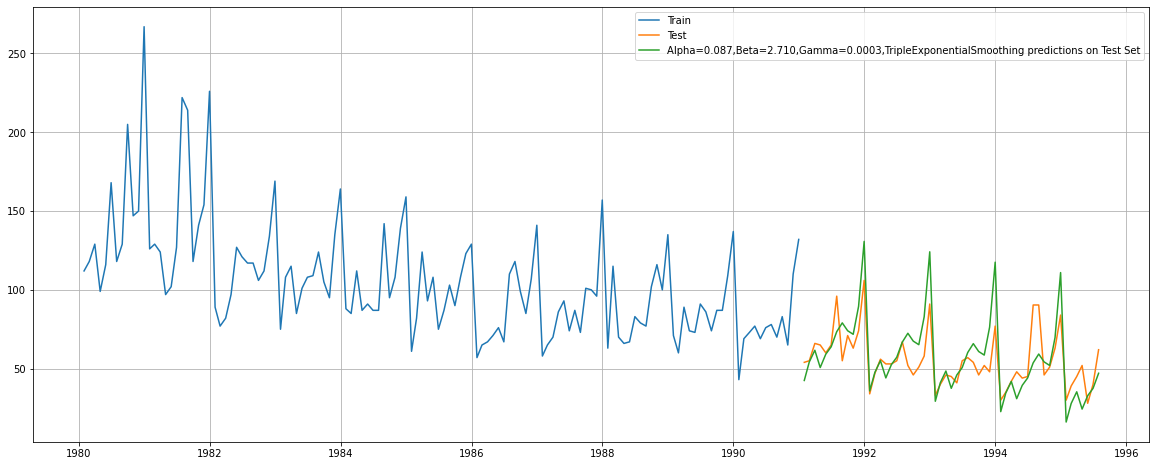

In [273]:
## Plotting on both the Training and Test using autofit

plt.figure(figsize=(20,8))
plt.plot(TES_train['Rose'], label='Train')
plt.plot(TES_test['Rose'], label='Test')

plt.plot(TES_test['auto_predict'], label='Alpha=0.087,Beta=2.710,Gamma=0.0003,TripleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

In [274]:
## Test Data

rmse_model7_test_1 = metrics.mean_squared_error(TES_test['Rose'],TES_test['auto_predict'],squared=False)
mape_model7_test_1=MAPE(TES_test['Rose'],TES_test['auto_predict'])
print("For Alpha=0.087,Beta=2.710,Gamma=0.0003,TripleExponentialSmoothing Model forecast on the Test Data,  RMSE is %3.3f" %(rmse_model7_test_1))

For Alpha=0.087,Beta=2.710,Gamma=0.0003,TripleExponentialSmoothing Model forecast on the Test Data,  RMSE is 15.502


In [275]:
resultsDf_8_1 = pd.DataFrame({'Test RMSE': [rmse_model6_test_1],'Test MAPE': [mape_model6_test_1]}
                           ,index=['Alpha=0.087,Beta=2.710,Gamma=0.0003,TripleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_8_1])
resultsDf

Test RMSE  Test MAPE
RegressionOnTime                                    16.979414      24.36
NaiveModel                                          78.396083     137.89
SimpleAverageModel                                  52.318735      89.19
2pointTrailingMovingAverage                         12.298291      14.59
4pointTrailingMovingAverage                         15.845558      21.55
6pointTrailingMovingAverage                         15.986163      22.40
9pointTrailingMovingAverage                         16.500823      23.18
Alpha=0.0987,SimpleExponentialSmoothing             35.936214      59.49
Alpha=0.1,SimpleExponentialSmoothing                40.397472      67.14
Alpha=0.2,SimpleExponentialSmoothing                46.437040      78.30
Alpha =0.129,Beta=0.053 Double Exponential Smoo...  37.338507      61.55
Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing       35.999680      59.20
Alpha=0.087,Beta=2.710,Gamma=0.0003,TripleExpon...  37.338507      61.55

In [276]:
## First we will define an empty dataframe to store our values from the loop

resultsDf_8_2 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Gamma Values':[],'Train RMSE':[],'Train MAPE':[],'Test RMSE': [], 'Test MAPE':[]})
resultsDf_8_2

Empty DataFrame
Columns: [Alpha Values, Beta Values, Gamma Values, Train RMSE, Train MAPE, Test RMSE, Test MAPE]
Index: []

In [277]:
for i in np.arange(0.1,1,0.1):
    for j in np.arange(0.1,1,0.1):
        for k in np.arange(0.1,1,0.1):
            model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_trend=j,smoothing_seasonal=k,optimized=False,use_brute=True)
            TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
            TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(len(test['Rose']))
        
            rmse_model8_train = metrics.mean_squared_error(TES_train['Rose'],TES_train['predict',i,j,k],squared=False)
            mape_model8_train = MAPE(TES_train['Rose'],TES_train['predict',i,j,k])
            rmse_model8_test = metrics.mean_squared_error(TES_test['Rose'],TES_test['predict',i,j,k],squared=False)
            mape_model8_test = MAPE(TES_test['Rose'],TES_test['predict',i,j,k])
            
            resultsDf_8_2 = resultsDf_8_2.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,
                                                  'Train RMSE':rmse_model8_train,'Train MAPE':mape_model8_train,'Test RMSE':rmse_model8_test,'Test MAPE':mape_model8_test}
                                                 , ignore_index=True)

In [278]:
resultsDf_8_2

Alpha Values  Beta Values  Gamma Values   Train RMSE  Train MAPE  \
0             0.1          0.1           0.1    28.249532       19.04   
1             0.1          0.1           0.2    25.082634       16.37   
2             0.1          0.1           0.3    23.855334       15.55   
3             0.1          0.1           0.4    23.419280       15.11   
4             0.1          0.1           0.5    23.398751       14.92   
..            ...          ...           ...          ...         ...   
724           0.9          0.9           0.5   125.250801       83.00   
725           0.9          0.9           0.6   242.476676      147.75   
726           0.9          0.9           0.7   586.043314      308.30   
727           0.9          0.9           0.8  1543.764498      733.13   
728           0.9          0.9           0.9  4033.109334     1717.38   

        Test RMSE  Test MAPE  
0       21.565231      28.77  
1       16.130391      20.42  
2       15.450570      20.07  
3       15.644466      20.50  
4       15.974174      21.07  
..            ...        ...  
724   5311.340630    8413.63  
725   6592.658316   10401.84  
726  11268.293802   17716.26  
727  28385.156023   44539.30  
728  53268.686445   83355.08  

[729 rows x 7 columns]

In [279]:
resultsDf_8_2 = resultsDf_8_2.sort_values(by=['Test MAPE']).head()
resultsDf_8_2

Alpha Values  Beta Values  Gamma Values  Train RMSE  Train MAPE  \
29           0.1          0.4           0.3   24.790282       16.13   
12           0.1          0.2           0.4   23.758573       15.41   
20           0.1          0.3           0.3   24.436088       15.87   
21           0.1          0.3           0.4   24.090662       15.62   
11           0.1          0.2           0.3   24.168872       15.76   

    Test RMSE  Test MAPE  
29  15.048441      18.70  
12  15.014086      18.73  
20  15.083122      18.79  
21  14.970968      18.80  
11  15.279396      19.05

In [280]:
resultsDf_8_3 = pd.DataFrame({'Test RMSE': [resultsDf_8_2['Test RMSE'][29]],'Test MAPE': [resultsDf_8_2['Test MAPE'][29]]}
                           ,index=['Alpha=0.1,Beta=0.9,Gamma=0.6,TripleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_8_3])
resultsDf

Test RMSE  Test MAPE
RegressionOnTime                                    16.979414      24.36
NaiveModel                                          78.396083     137.89
SimpleAverageModel                                  52.318735      89.19
2pointTrailingMovingAverage                         12.298291      14.59
4pointTrailingMovingAverage                         15.845558      21.55
6pointTrailingMovingAverage                         15.986163      22.40
9pointTrailingMovingAverage                         16.500823      23.18
Alpha=0.0987,SimpleExponentialSmoothing             35.936214      59.49
Alpha=0.1,SimpleExponentialSmoothing                40.397472      67.14
Alpha=0.2,SimpleExponentialSmoothing                46.437040      78.30
Alpha =0.129,Beta=0.053 Double Exponential Smoo...  37.338507      61.55
Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing       35.999680      59.20
Alpha=0.087,Beta=2.710,Gamma=0.0003,TripleExpon...  37.338507      61.55
Alpha=0.1,Beta=0.9,Gamma=0.6,TripleExponentialS...  15.048441      18.70

### 5. Check for the stationarity of the data on which the model is being built on using appropriate statistical tests and also mention the hypothesis for the statistical test. If the data is found to be non-stationary, take appropriate steps to make it stationary. Check the new data for stationarity and comment. Note: Stationarity should be checked at alpha = 0.05.

## Check for stationarity of the whole Time Series data.

In [281]:
## Test for stationarity of the series - Dicky Fuller test

from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=7).mean() #determining the rolling mean
    rolstd = timeseries.rolling(window=7).std()   #determining the rolling standard deviation

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput,'\n')

In [282]:
# By looking into the pvalue, pvalue is greater than 5% so it is failed to reject null hyposthesis
# so, our data is said to be non-stationary

Let us take a difference of order 1 and check whether the Time Series is stationary or not.

In [283]:
((Rose['Rose'].diff()).diff()).diff().dropna()

Time_Stamp
1980-04-30    -46.0
1980-05-31     88.0
1980-06-30    -12.0
1980-07-31   -137.0
1980-08-31    163.0
              ...  
1995-03-31    -66.0
1995-04-30      4.0
1995-05-31    -32.0
1995-06-30     67.0
1995-07-31    -26.0
Name: Rose, Length: 184, dtype: float64

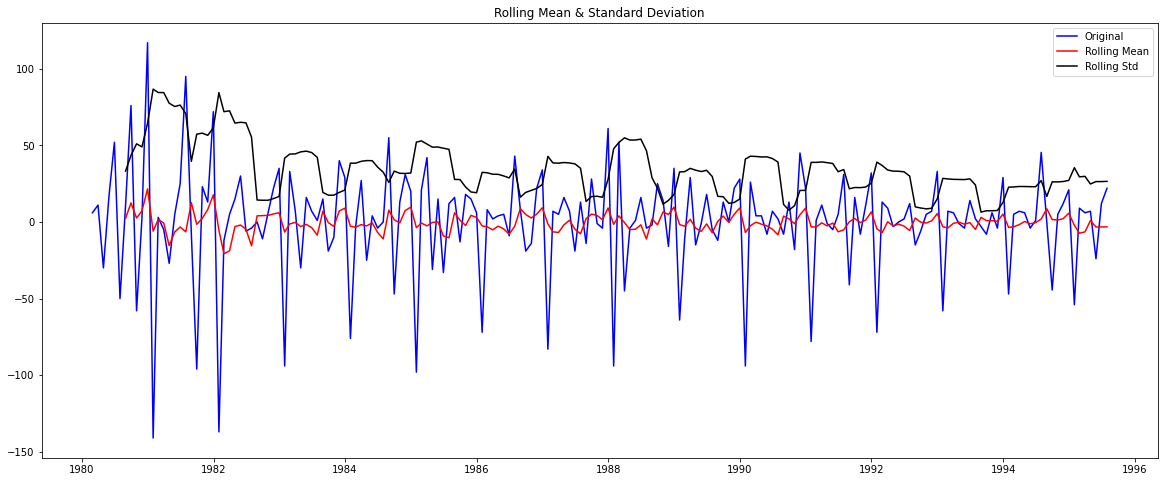

Results of Dickey-Fuller Test:
Test Statistic                -7.855944e+00
p-value                        5.442646e-12
#Lags Used                     1.200000e+01
Number of Observations Used    1.730000e+02
Critical Value (1%)           -3.468726e+00
Critical Value (5%)           -2.878396e+00
Critical Value (10%)          -2.575756e+00
dtype: float64 



In [284]:
test_stationarity(Rose['Rose'].diff().dropna())

### 6. Build an automated version of the ARIMA/SARIMA model in which the parameters are selected using the lowest Akaike Information Criteria (AIC) on the training data and evaluate this model on the test data using RMSE.

### Automated ARIMA

In [285]:
from statsmodels.tsa.arima_model import ARIMA

In [286]:
## The following loop helps us in getting a combination of different parameters of p and q in the range of 0 and 2
## We have kept the value of d as 1 as we need to take a difference of the series to make it stationary.

import itertools
p = q = range(0, 4)
d= range(1,2)
pdq = list(itertools.product(p, d, q))
print('Some parameter combinations for the Model...')
for i in range(1,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Some parameter combinations for the Model...
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (0, 1, 3)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (1, 1, 3)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)
Model: (2, 1, 3)
Model: (3, 1, 0)
Model: (3, 1, 1)
Model: (3, 1, 2)
Model: (3, 1, 3)


In [287]:
pdq

[(0, 1, 0),
 (0, 1, 1),
 (0, 1, 2),
 (0, 1, 3),
 (1, 1, 0),
 (1, 1, 1),
 (1, 1, 2),
 (1, 1, 3),
 (2, 1, 0),
 (2, 1, 1),
 (2, 1, 2),
 (2, 1, 3),
 (3, 1, 0),
 (3, 1, 1),
 (3, 1, 2),
 (3, 1, 3)]

In [288]:
# Creating an empty Dataframe with column names only
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC

Empty DataFrame
Columns: [param, AIC]
Index: []

In [289]:
from statsmodels.tsa.arima_model import ARIMA

for param in pdq:
    ARIMA_model = ARIMA(train['Rose'].values,order=param).fit()
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))
    ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)

ARIMA(0, 1, 0) - AIC:1335.1526583086775
ARIMA(0, 1, 1) - AIC:1280.7261830464035
ARIMA(0, 1, 2) - AIC:1276.8353726229147
ARIMA(0, 1, 3) - AIC:1278.074254285777
ARIMA(1, 1, 0) - AIC:1319.348310580781
ARIMA(1, 1, 1) - AIC:1277.7757468404075
ARIMA(1, 1, 2) - AIC:1277.359225603172
ARIMA(1, 1, 3) - AIC:1279.3126335366885
ARIMA(2, 1, 0) - AIC:1300.6092611745498
ARIMA(2, 1, 1) - AIC:1279.0456894093106
ARIMA(2, 1, 2) - AIC:1279.2986939364973
ARIMA(2, 1, 3) - AIC:1281.1962260422672
ARIMA(3, 1, 0) - AIC:1299.4787391543023
ARIMA(3, 1, 1) - AIC:1279.6059690497666
ARIMA(3, 1, 2) - AIC:1280.9692496508637
ARIMA(3, 1, 3) - AIC:1273.1940957775246


In [290]:
## Sort the above AIC values in the ascending order to get the parameters for the minimum AIC value

ARIMA_AIC.sort_values(by='AIC',ascending=True)

param          AIC
15  (3, 1, 3)  1273.194096
2   (0, 1, 2)  1276.835373
6   (1, 1, 2)  1277.359226
5   (1, 1, 1)  1277.775747
3   (0, 1, 3)  1278.074254
9   (2, 1, 1)  1279.045689
10  (2, 1, 2)  1279.298694
7   (1, 1, 3)  1279.312634
13  (3, 1, 1)  1279.605969
1   (0, 1, 1)  1280.726183
14  (3, 1, 2)  1280.969250
11  (2, 1, 3)  1281.196226
12  (3, 1, 0)  1299.478739
8   (2, 1, 0)  1300.609261
4   (1, 1, 0)  1319.348311
0   (0, 1, 0)  1335.152658

In [291]:
auto_ARIMA = ARIMA(train['Rose'], order=(3,1,3),freq='M')

results_auto_ARIMA = auto_ARIMA.fit()

print(results_auto_ARIMA.summary())

                             ARIMA Model Results                              
Dep. Variable:                 D.Rose   No. Observations:                  131
Model:                 ARIMA(3, 1, 3)   Log Likelihood                -628.597
Method:                       css-mle   S.D. of innovations             28.356
Date:                Sun, 05 Jun 2022   AIC                           1273.194
Time:                        23:39:14   BIC                           1296.196
Sample:                    02-29-1980   HQIC                          1282.541
                         - 12-31-1990                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.4906      0.088     -5.547      0.000      -0.664      -0.317
ar.L1.D.Rose    -0.7243      0.086     -8.403      0.000      -0.893      -0.555
ar.L2.D.Rose    -0.7217      0.087     -8.33

## Predict on the Test Set using this model and evaluate the model.

In [292]:
predicted_auto_ARIMA = results_auto_ARIMA.forecast(steps=len(test))

In [293]:
from sklearn.metrics import  mean_squared_error
rmse = mean_squared_error(test['Rose'],predicted_auto_ARIMA[0],squared=False)
print(rmse)

18.092417362699305


In [294]:
resultsDf_autoarima = pd.DataFrame({'Test RMSE': [rmse]}
                           ,index=['AUTO ARIMA(3,1,3)'])

resultsDf = pd.concat([resultsDf, resultsDf_autoarima])
resultsDf

Test RMSE  Test MAPE
RegressionOnTime                                    16.979414      24.36
NaiveModel                                          78.396083     137.89
SimpleAverageModel                                  52.318735      89.19
2pointTrailingMovingAverage                         12.298291      14.59
4pointTrailingMovingAverage                         15.845558      21.55
6pointTrailingMovingAverage                         15.986163      22.40
9pointTrailingMovingAverage                         16.500823      23.18
Alpha=0.0987,SimpleExponentialSmoothing             35.936214      59.49
Alpha=0.1,SimpleExponentialSmoothing                40.397472      67.14
Alpha=0.2,SimpleExponentialSmoothing                46.437040      78.30
Alpha =0.129,Beta=0.053 Double Exponential Smoo...  37.338507      61.55
Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing       35.999680      59.20
Alpha=0.087,Beta=2.710,Gamma=0.0003,TripleExpon...  37.338507      61.55
Alpha=0.1,Beta=0.9,Gamma=0.6,TripleExponentialS...  15.048441      18.70
AUTO ARIMA(3,1,3)                                   18.092417        NaN

### Automated SARIMA

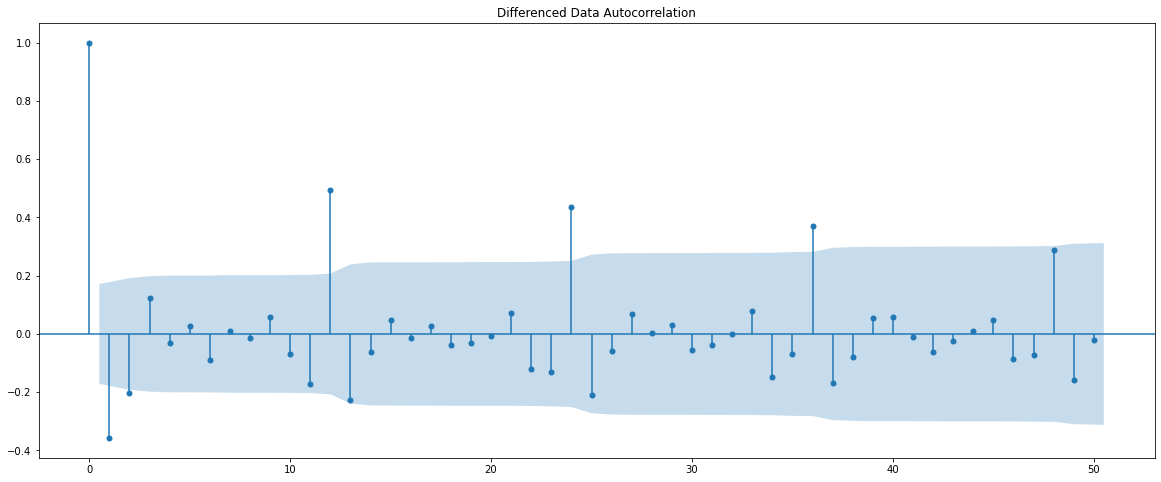

In [295]:
plot_acf(train['Rose'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plt.show()

In [296]:
pdq

[(0, 1, 0),
 (0, 1, 1),
 (0, 1, 2),
 (0, 1, 3),
 (1, 1, 0),
 (1, 1, 1),
 (1, 1, 2),
 (1, 1, 3),
 (2, 1, 0),
 (2, 1, 1),
 (2, 1, 2),
 (2, 1, 3),
 (3, 1, 0),
 (3, 1, 1),
 (3, 1, 2),
 (3, 1, 3)]

In [297]:
import itertools
p = q = range(0, 4)
P=Q=range(0,4)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 6) for x in list(itertools.product(P, D, Q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 0, 1, 6)
Model: (0, 1, 2)(0, 0, 2, 6)
Model: (0, 1, 3)(0, 0, 3, 6)
Model: (1, 1, 0)(1, 0, 0, 6)
Model: (1, 1, 1)(1, 0, 1, 6)
Model: (1, 1, 2)(1, 0, 2, 6)
Model: (1, 1, 3)(1, 0, 3, 6)
Model: (2, 1, 0)(2, 0, 0, 6)
Model: (2, 1, 1)(2, 0, 1, 6)
Model: (2, 1, 2)(2, 0, 2, 6)
Model: (2, 1, 3)(2, 0, 3, 6)
Model: (3, 1, 0)(3, 0, 0, 6)
Model: (3, 1, 1)(3, 0, 1, 6)
Model: (3, 1, 2)(3, 0, 2, 6)
Model: (3, 1, 3)(3, 0, 3, 6)


In [298]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

Empty DataFrame
Columns: [param, seasonal, AIC]
Index: []

In [299]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train['Rose'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 6) - AIC:1323.9657875279158
SARIMA(0, 1, 0)x(0, 0, 1, 6) - AIC:1264.4996261113863
SARIMA(0, 1, 0)x(0, 0, 2, 6) - AIC:1144.7077471827322
SARIMA(0, 1, 0)x(0, 0, 3, 6) - AIC:1081.271383062524
SARIMA(0, 1, 0)x(1, 0, 0, 6) - AIC:1274.7897737087983
SARIMA(0, 1, 0)x(1, 0, 1, 6) - AIC:1241.7870945149089
SARIMA(0, 1, 0)x(1, 0, 2, 6) - AIC:1146.3093266721867
SARIMA(0, 1, 0)x(1, 0, 3, 6) - AIC:1058.986174312437
SARIMA(0, 1, 0)x(2, 0, 0, 6) - AIC:1137.9167236212038
SARIMA(0, 1, 0)x(2, 0, 1, 6) - AIC:1137.4533629515088
SARIMA(0, 1, 0)x(2, 0, 2, 6) - AIC:1117.022442617828
SARIMA(0, 1, 0)x(2, 0, 3, 6) - AIC:1058.804820641965
SARIMA(0, 1, 0)x(3, 0, 0, 6) - AIC:1072.5465834695271
SARIMA(0, 1, 0)x(3, 0, 1, 6) - AIC:1061.3687765139873
SARIMA(0, 1, 0)x(3, 0, 2, 6) - AIC:1058.042505301648
SARIMA(0, 1, 0)x(3, 0, 3, 6) - AIC:1058.8917095262093
SARIMA(0, 1, 1)x(0, 0, 0, 6) - AIC:1263.5369097383968
SARIMA(0, 1, 1)x(0, 0, 1, 6) - AIC:1201.3832548029548
SARIMA(0, 1, 1)x(0, 0, 2, 6) - AI

SARIMA(2, 1, 1)x(2, 0, 1, 6) - AIC:1068.4781627387706
SARIMA(2, 1, 1)x(2, 0, 2, 6) - AIC:1051.6734607524152
SARIMA(2, 1, 1)x(2, 0, 3, 6) - AIC:965.1763959606204
SARIMA(2, 1, 1)x(3, 0, 0, 6) - AIC:974.125877864896
SARIMA(2, 1, 1)x(3, 0, 1, 6) - AIC:975.8068385702204
SARIMA(2, 1, 1)x(3, 0, 2, 6) - AIC:967.6521341296803
SARIMA(2, 1, 1)x(3, 0, 3, 6) - AIC:967.1740891873808
SARIMA(2, 1, 2)x(0, 0, 0, 6) - AIC:1253.9102116146698
SARIMA(2, 1, 2)x(0, 0, 1, 6) - AIC:1185.7691934897082
SARIMA(2, 1, 2)x(0, 0, 2, 6) - AIC:1082.5581033340713
SARIMA(2, 1, 2)x(0, 0, 3, 6) - AIC:1005.4894643085271
SARIMA(2, 1, 2)x(1, 0, 0, 6) - AIC:1200.4217492510952
SARIMA(2, 1, 2)x(1, 0, 1, 6) - AIC:1150.7283325558597
SARIMA(2, 1, 2)x(1, 0, 2, 6) - AIC:1063.1103215273422
SARIMA(2, 1, 2)x(1, 0, 3, 6) - AIC:996.8723993246779
SARIMA(2, 1, 2)x(2, 0, 0, 6) - AIC:1073.6961457923378
SARIMA(2, 1, 2)x(2, 0, 1, 6) - AIC:1070.0771798927149
SARIMA(2, 1, 2)x(2, 0, 2, 6) - AIC:1045.2203966608638
SARIMA(2, 1, 2)x(2, 0, 3, 6) - AIC:

In [300]:
SARIMA_AIC.sort_values(by=['AIC']).head()

param      seasonal         AIC
187  (2, 1, 3)  (2, 0, 3, 6)  951.744297
59   (0, 1, 3)  (2, 0, 3, 6)  952.073632
251  (3, 1, 3)  (2, 0, 3, 6)  952.582101
191  (2, 1, 3)  (3, 0, 3, 6)  953.205621
123  (1, 1, 3)  (2, 0, 3, 6)  953.684951

In [301]:
import statsmodels.api as sm

auto_SARIMA_6 = sm.tsa.statespace.SARIMAX(train['Rose'].values,
                                order=(2, 1, 3),
                                seasonal_order=(2, 0, 3, 6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA_6 = auto_SARIMA_6.fit(maxiter=1000)
print(results_auto_SARIMA_6.summary())

                                     SARIMAX Results                                     
Dep. Variable:                                 y   No. Observations:                  132
Model:             SARIMAX(2, 1, 3)x(2, 0, 3, 6)   Log Likelihood                -464.872
Date:                           Sun, 05 Jun 2022   AIC                            951.744
Time:                                   23:43:26   BIC                            981.349
Sample:                                        0   HQIC                           963.750
                                           - 132                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5027      0.083     -6.082      0.000      -0.665      -0.341
ar.L2         -0.6628      0.084     -7.918

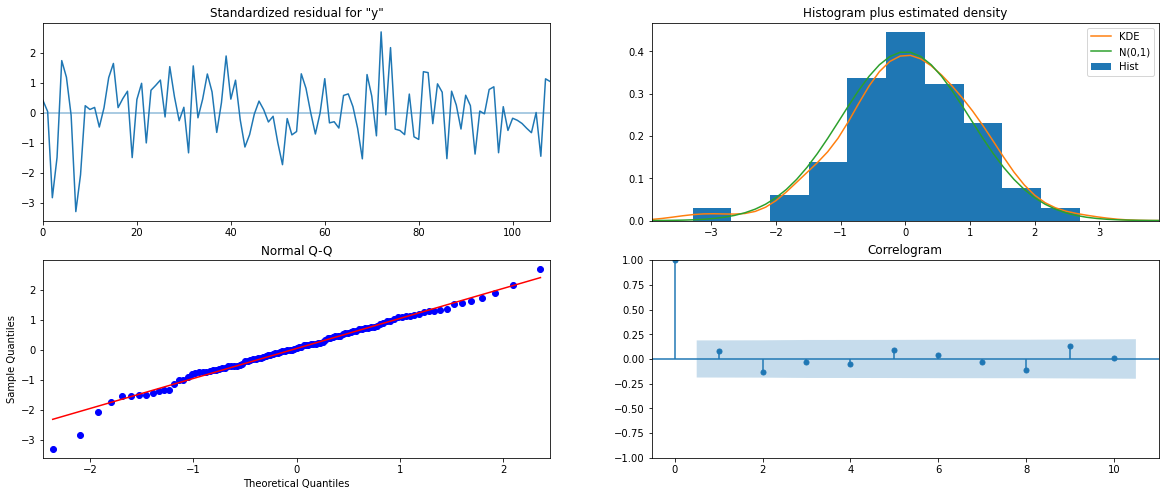

In [302]:
results_auto_SARIMA_6.plot_diagnostics()
plt.show()

From the model diagnostics plot, we can see that all the individual diagnostics plots almost follow the theoretical numbers and thus we cannot develop any pattern from these plots. 

## Predict on the Test Set using this model and evaluate the model.

In [303]:
predicted_auto_SARIMA_6 = results_auto_SARIMA_6.get_forecast(steps=len(test))

In [304]:
predicted_auto_SARIMA_6.summary_frame(alpha=0.05).head()

y       mean    mean_se  mean_ci_lower  mean_ci_upper
0  66.900092  16.350226      34.854239      98.945946
1  65.988158  16.481446      33.685118      98.291198
2  74.438688  16.587371      41.928039     106.949337
3  76.040407  16.709956      43.289494     108.791320
4  78.415084  16.710569      45.662970     111.167198

In [305]:
rmse = mean_squared_error(test['Rose'],predicted_auto_SARIMA_6.predicted_mean,squared=False)
print(rmse)

26.30148710430549


In [306]:
temp_resultsDf_auto_sarima6 = pd.DataFrame({'Test RMSE': [rmse]}
                           ,index=['Auto_SARIMA_6(2,1,3)(2,0,3,6)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf_auto_sarima6])

resultsDf

Test RMSE  Test MAPE
RegressionOnTime                                    16.979414      24.36
NaiveModel                                          78.396083     137.89
SimpleAverageModel                                  52.318735      89.19
2pointTrailingMovingAverage                         12.298291      14.59
4pointTrailingMovingAverage                         15.845558      21.55
6pointTrailingMovingAverage                         15.986163      22.40
9pointTrailingMovingAverage                         16.500823      23.18
Alpha=0.0987,SimpleExponentialSmoothing             35.936214      59.49
Alpha=0.1,SimpleExponentialSmoothing                40.397472      67.14
Alpha=0.2,SimpleExponentialSmoothing                46.437040      78.30
Alpha =0.129,Beta=0.053 Double Exponential Smoo...  37.338507      61.55
Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing       35.999680      59.20
Alpha=0.087,Beta=2.710,Gamma=0.0003,TripleExpon...  37.338507      61.55
Alpha=0.1,Beta=0.9,Gamma=0.6,TripleExponentialS...  15.048441      18.70
AUTO ARIMA(3,1,3)                                   18.092417        NaN
Auto_SARIMA_6(2,1,3)(2,0,3,6)                       26.301487        NaN

### Setting the seasonality as 12 for the second iteration of the auto SARIMA model.

In [307]:
import itertools
p = q = range(0, 3)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 0, 1, 12)
Model: (0, 1, 2)(0, 0, 2, 12)
Model: (1, 1, 0)(1, 0, 0, 12)
Model: (1, 1, 1)(1, 0, 1, 12)
Model: (1, 1, 2)(1, 0, 2, 12)
Model: (2, 1, 0)(2, 0, 0, 12)
Model: (2, 1, 1)(2, 0, 1, 12)
Model: (2, 1, 2)(2, 0, 2, 12)


In [308]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

Empty DataFrame
Columns: [param, seasonal, AIC]
Index: []

In [309]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train['Rose'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 12) - AIC:1323.9657875279158
SARIMA(0, 1, 0)x(0, 0, 1, 12) - AIC:1145.4230827207525
SARIMA(0, 1, 0)x(0, 0, 2, 12) - AIC:976.4375296380895
SARIMA(0, 1, 0)x(1, 0, 0, 12) - AIC:1139.921738995602
SARIMA(0, 1, 0)x(1, 0, 1, 12) - AIC:1116.0207869386875
SARIMA(0, 1, 0)x(1, 0, 2, 12) - AIC:969.6913635752474
SARIMA(0, 1, 0)x(2, 0, 0, 12) - AIC:960.8812220353041
SARIMA(0, 1, 0)x(2, 0, 1, 12) - AIC:962.8794540697533
SARIMA(0, 1, 0)x(2, 0, 2, 12) - AIC:955.5735408945699
SARIMA(0, 1, 1)x(0, 0, 0, 12) - AIC:1263.5369097383968
SARIMA(0, 1, 1)x(0, 0, 1, 12) - AIC:1098.5554825918334
SARIMA(0, 1, 1)x(0, 0, 2, 12) - AIC:923.6314049383752
SARIMA(0, 1, 1)x(1, 0, 0, 12) - AIC:1095.793632491829
SARIMA(0, 1, 1)x(1, 0, 1, 12) - AIC:1054.7434330947895
SARIMA(0, 1, 1)x(1, 0, 2, 12) - AIC:918.8573483315454
SARIMA(0, 1, 1)x(2, 0, 0, 12) - AIC:914.5982866535874
SARIMA(0, 1, 1)x(2, 0, 1, 12) - AIC:915.3332430461671
SARIMA(0, 1, 1)x(2, 0, 2, 12) - AIC:901.1988261883185
SARIMA(0, 1, 2)x(0, 0,

In [310]:
SARIMA_AIC.sort_values(by=['AIC']).head()

param       seasonal         AIC
26  (0, 1, 2)  (2, 0, 2, 12)  887.937509
80  (2, 1, 2)  (2, 0, 2, 12)  890.668798
69  (2, 1, 1)  (2, 0, 0, 12)  896.518161
53  (1, 1, 2)  (2, 0, 2, 12)  896.686964
78  (2, 1, 2)  (2, 0, 0, 12)  897.346444

In [311]:
import statsmodels.api as sm

auto_SARIMA_12 = sm.tsa.statespace.SARIMAX(train['Rose'].values,
                                order=(0, 1, 2),
                                seasonal_order=(2, 0, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA_12 = auto_SARIMA_12.fit(maxiter=1000)
print(results_auto_SARIMA_12.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  132
Model:             SARIMAX(0, 1, 2)x(2, 0, 2, 12)   Log Likelihood                -436.969
Date:                            Sun, 05 Jun 2022   AIC                            887.938
Time:                                    23:43:54   BIC                            906.448
Sample:                                         0   HQIC                           895.437
                                            - 132                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.8427    190.073     -0.004      0.996    -373.380     371.694
ma.L2         -0.1573     29.862   

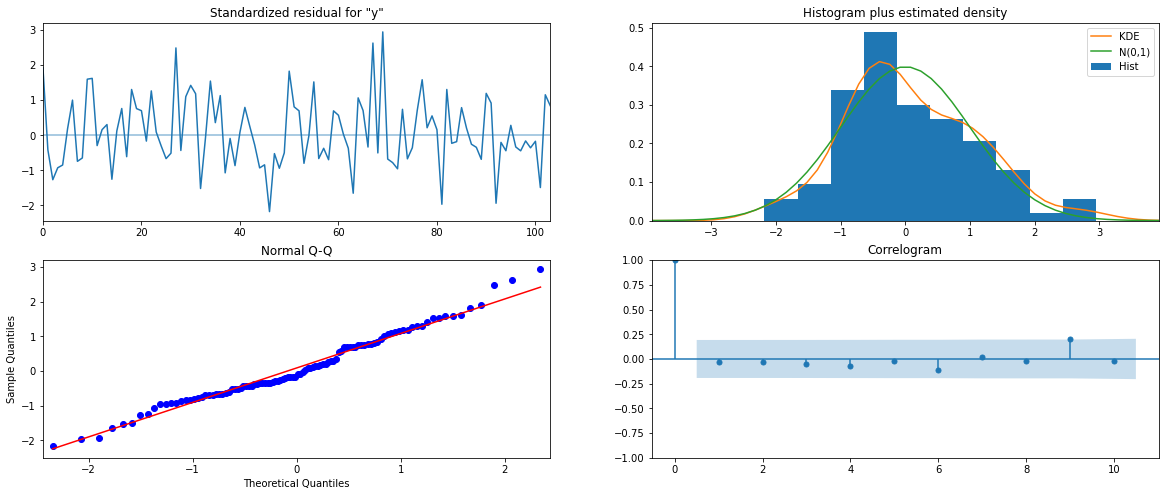

In [312]:
results_auto_SARIMA_12.plot_diagnostics()
plt.show()

Similar to the last iteration of the model where the seasonality parameter was taken as 6, here also we see that the model diagnostics plot does not indicate any remaining information that we can get.

## Predict on the Test Set using this model and evaluate the model.

In [313]:
predicted_auto_SARIMA_12 = results_auto_SARIMA_12.get_forecast(steps=len(test))

In [314]:
predicted_auto_SARIMA_12.summary_frame(alpha=0.05).head()

y       mean    mean_se  mean_ci_lower  mean_ci_upper
0  62.867265  15.928501      31.647977      94.086554
1  70.541190  16.147659      38.892360     102.190021
2  77.356411  16.147657      45.707585     109.005237
3  76.208814  16.147657      44.559988     107.857640
4  72.747398  16.147657      41.098572     104.396224

In [315]:
rmse = mean_squared_error(test['Rose'],predicted_auto_SARIMA_12.predicted_mean,squared=False)
print(rmse)

26.417374455793933


In [316]:
temp_resultsDf_auto_sarima12 = pd.DataFrame({'Test RMSE': [rmse]}
                           ,index=['AUTO_SARIMA_12(0,1,2)(2,0,2,12)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf_auto_sarima12])

resultsDf

Test RMSE  Test MAPE
RegressionOnTime                                    16.979414      24.36
NaiveModel                                          78.396083     137.89
SimpleAverageModel                                  52.318735      89.19
2pointTrailingMovingAverage                         12.298291      14.59
4pointTrailingMovingAverage                         15.845558      21.55
6pointTrailingMovingAverage                         15.986163      22.40
9pointTrailingMovingAverage                         16.500823      23.18
Alpha=0.0987,SimpleExponentialSmoothing             35.936214      59.49
Alpha=0.1,SimpleExponentialSmoothing                40.397472      67.14
Alpha=0.2,SimpleExponentialSmoothing                46.437040      78.30
Alpha =0.129,Beta=0.053 Double Exponential Smoo...  37.338507      61.55
Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing       35.999680      59.20
Alpha=0.087,Beta=2.710,Gamma=0.0003,TripleExpon...  37.338507      61.55
Alpha=0.1,Beta=0.9,Gamma=0.6,TripleExponentialS...  15.048441      18.70
AUTO ARIMA(3,1,3)                                   18.092417        NaN
Auto_SARIMA_6(2,1,3)(2,0,3,6)                       26.301487        NaN
AUTO_SARIMA_12(0,1,2)(2,0,2,12)                     26.417374        NaN

### 7. Build ARIMA/SARIMA models based on the cut-off points of ACF and PACF on the training data and evaluate this model on the test data using RMSE.

Let us look at the ACF and the PACF plots once more.

## Manual ARIMA

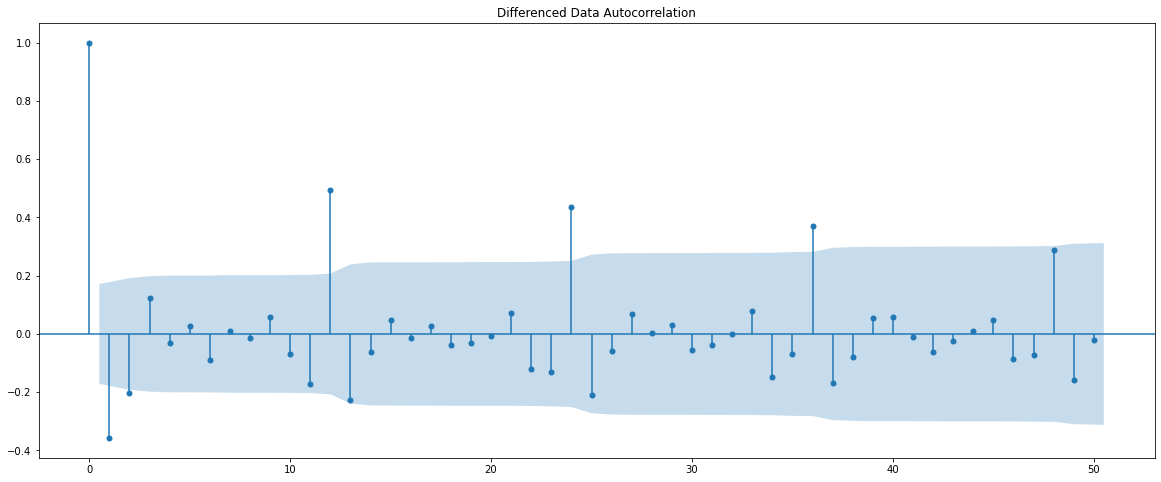

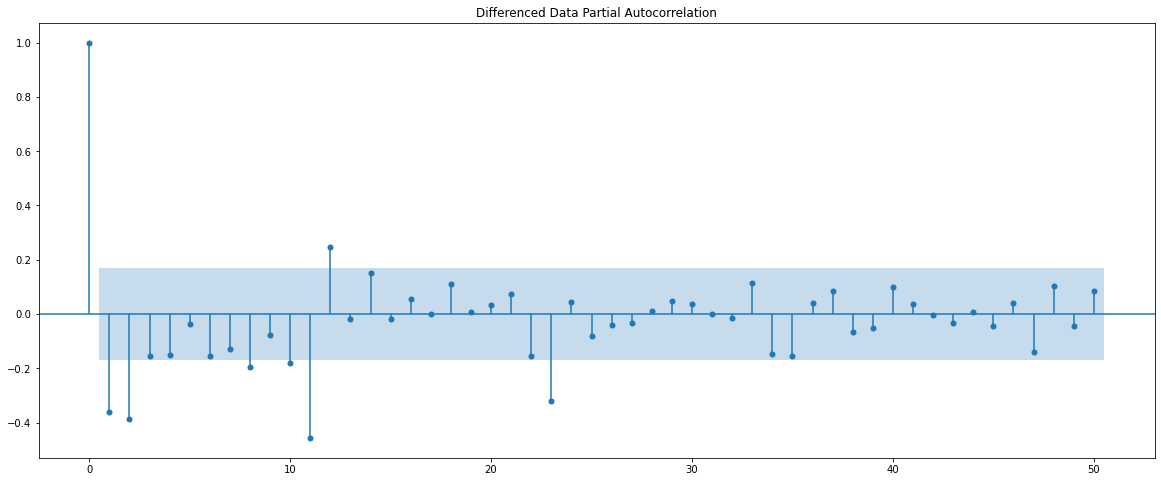

In [317]:
plot_acf(train['Rose'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plot_pacf(train['Rose'].diff().dropna(),lags=50,title='Differenced Data Partial Autocorrelation')
plt.show()

In [318]:
manual_ARIMA = ARIMA(train['Rose'].astype('float64'), order=(0,1,0),freq='M')

results_manual_ARIMA = manual_ARIMA.fit()

print(results_manual_ARIMA.summary())

                             ARIMA Model Results                              
Dep. Variable:                 D.Rose   No. Observations:                  131
Model:                 ARIMA(0, 1, 0)   Log Likelihood                -665.576
Method:                           css   S.D. of innovations             38.931
Date:                Sun, 05 Jun 2022   AIC                           1335.153
Time:                        23:43:55   BIC                           1340.903
Sample:                    02-29-1980   HQIC                          1337.489
                         - 12-31-1990                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1527      3.401      0.045      0.964      -6.514       6.819


## Predict on the Test Set using this model and evaluate the model.

In [319]:
predicted_manual_ARIMA = results_manual_ARIMA.forecast(steps=len(test))

In [320]:
rmse = mean_squared_error(test['Rose'],predicted_manual_ARIMA[0],squared=False)
print(rmse)

82.74988534974628


In [321]:
temp_resultsDf_manualarima = pd.DataFrame({'Test RMSE': [rmse]}
                           ,index=['MANUAL ARIMA(0,1,0)'])


resultsDf = pd.concat([resultsDf, temp_resultsDf_manualarima])
resultsDf

Test RMSE  Test MAPE
RegressionOnTime                                    16.979414      24.36
NaiveModel                                          78.396083     137.89
SimpleAverageModel                                  52.318735      89.19
2pointTrailingMovingAverage                         12.298291      14.59
4pointTrailingMovingAverage                         15.845558      21.55
6pointTrailingMovingAverage                         15.986163      22.40
9pointTrailingMovingAverage                         16.500823      23.18
Alpha=0.0987,SimpleExponentialSmoothing             35.936214      59.49
Alpha=0.1,SimpleExponentialSmoothing                40.397472      67.14
Alpha=0.2,SimpleExponentialSmoothing                46.437040      78.30
Alpha =0.129,Beta=0.053 Double Exponential Smoo...  37.338507      61.55
Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing       35.999680      59.20
Alpha=0.087,Beta=2.710,Gamma=0.0003,TripleExpon...  37.338507      61.55
Alpha=0.1,Beta=0.9,Gamma=0.6,TripleExponentialS...  15.048441      18.70
AUTO ARIMA(3,1,3)                                   18.092417        NaN
Auto_SARIMA_6(2,1,3)(2,0,3,6)                       26.301487        NaN
AUTO_SARIMA_12(0,1,2)(2,0,2,12)                     26.417374        NaN
MANUAL ARIMA(0,1,0)                                 82.749885        NaN

### 8. Build a table (create a data frame) with all the models built along with their corresponding parameters and the respective RMSE values on the test data.

In [322]:
Rose_results = pd.DataFrame(resultsDf.iloc[:,0])

In [323]:
Rose_results

Test RMSE
RegressionOnTime                                    16.979414
NaiveModel                                          78.396083
SimpleAverageModel                                  52.318735
2pointTrailingMovingAverage                         12.298291
4pointTrailingMovingAverage                         15.845558
6pointTrailingMovingAverage                         15.986163
9pointTrailingMovingAverage                         16.500823
Alpha=0.0987,SimpleExponentialSmoothing             35.936214
Alpha=0.1,SimpleExponentialSmoothing                40.397472
Alpha=0.2,SimpleExponentialSmoothing                46.437040
Alpha =0.129,Beta=0.053 Double Exponential Smoo...  37.338507
Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing       35.999680
Alpha=0.087,Beta=2.710,Gamma=0.0003,TripleExpon...  37.338507
Alpha=0.1,Beta=0.9,Gamma=0.6,TripleExponentialS...  15.048441
AUTO ARIMA(3,1,3)                                   18.092417
Auto_SARIMA_6(2,1,3)(2,0,3,6)                       26.301487
AUTO_SARIMA_12(0,1,2)(2,0,2,12)                     26.417374
MANUAL ARIMA(0,1,0)                                 82.749885

### 9. Based on the model-building exercise, build the most optimum model(s) on the complete data and predict 12 months into the future with appropriate confidence intervals/bands

In [324]:
Rose_results.sort_values(by=['Test RMSE'])

Test RMSE
2pointTrailingMovingAverage                         12.298291
Alpha=0.1,Beta=0.9,Gamma=0.6,TripleExponentialS...  15.048441
4pointTrailingMovingAverage                         15.845558
6pointTrailingMovingAverage                         15.986163
9pointTrailingMovingAverage                         16.500823
RegressionOnTime                                    16.979414
AUTO ARIMA(3,1,3)                                   18.092417
Auto_SARIMA_6(2,1,3)(2,0,3,6)                       26.301487
AUTO_SARIMA_12(0,1,2)(2,0,2,12)                     26.417374
Alpha=0.0987,SimpleExponentialSmoothing             35.936214
Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing       35.999680
Alpha =0.129,Beta=0.053 Double Exponential Smoo...  37.338507
Alpha=0.087,Beta=2.710,Gamma=0.0003,TripleExpon...  37.338507
Alpha=0.1,SimpleExponentialSmoothing                40.397472
Alpha=0.2,SimpleExponentialSmoothing                46.437040
SimpleAverageModel                                  52.318735
NaiveModel                                          78.396083
MANUAL ARIMA(0,1,0)                                 82.749885

### Manual SARIMA

In [325]:
full_data_model = sm.tsa.statespace.SARIMAX(Rose['Rose'],
                                order=(0,1,2),
                                seasonal_order=(2, 0, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_full_data_model = full_data_model.fit(maxiter=1000)
print(results_full_data_model.summary())

                                     SARIMAX Results                                      
Dep. Variable:                               Rose   No. Observations:                  187
Model:             SARIMAX(0, 1, 2)x(2, 0, 2, 12)   Log Likelihood                -653.272
Date:                            Sun, 05 Jun 2022   AIC                           1320.544
Time:                                    23:43:56   BIC                           1342.026
Sample:                                01-31-1980   HQIC                          1329.268
                                     - 07-31-1995                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9008      0.102     -8.827      0.000      -1.101      -0.701
ma.L2         -0.1982      0.083   

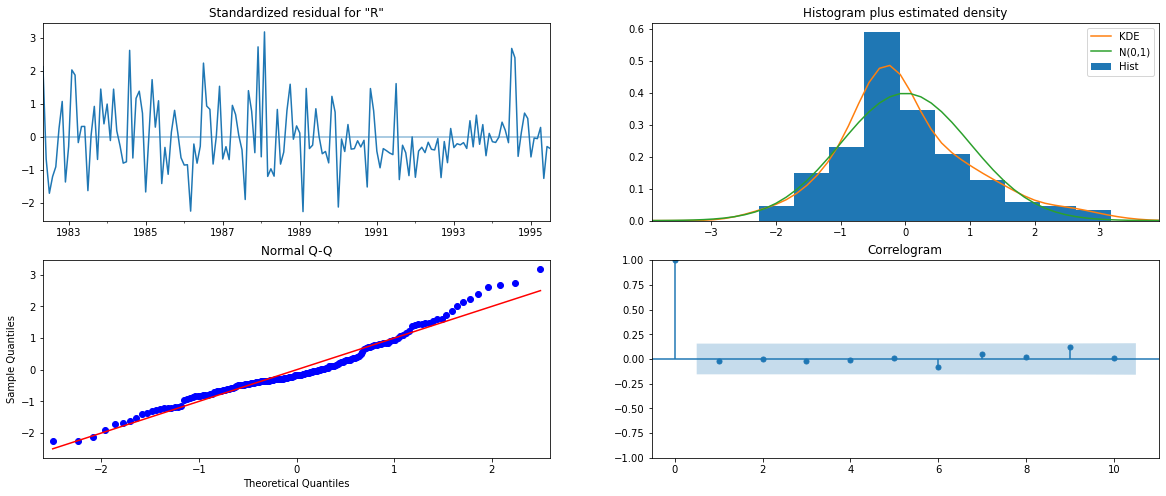

In [326]:
results_full_data_model.plot_diagnostics()
plt.show()

## Predict on the Test Set using this model and evaluate the model.

In [327]:
predicted_manual_SARIMA_12 = results_full_data_model.get_forecast(steps=12)

In [328]:
predicted_manual_SARIMA_12.summary_frame(alpha=0.05).head()

Rose             mean    mean_se  mean_ci_lower  mean_ci_upper
1995-08-31  64.136861  14.651646      35.420164      92.853559
1995-09-30  45.029046  15.139457      15.356255      74.701836
1995-10-31  48.218489  15.198582      18.429816      78.007162
1995-11-30  53.528680  15.257478      23.624574      83.432787
1995-12-31  70.604265  15.316147      40.585169     100.623362

In [329]:
rmse = mean_squared_error(Rose['Rose'],results_full_data_model.fittedvalues,squared=False)
print('RMSE of the Full Model',rmse)

RMSE of the Full Model 27.90834736379923


In [330]:
temp_resultsDf_manual_sarima_12 = pd.DataFrame({'Test RMSE': [rmse]}
                           ,index=['MANUAL_SARIMA_12(0,1,2)(2,0,2,12)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf_manual_sarima_12])

resultsDf

Test RMSE  Test MAPE
RegressionOnTime                                    16.979414      24.36
NaiveModel                                          78.396083     137.89
SimpleAverageModel                                  52.318735      89.19
2pointTrailingMovingAverage                         12.298291      14.59
4pointTrailingMovingAverage                         15.845558      21.55
6pointTrailingMovingAverage                         15.986163      22.40
9pointTrailingMovingAverage                         16.500823      23.18
Alpha=0.0987,SimpleExponentialSmoothing             35.936214      59.49
Alpha=0.1,SimpleExponentialSmoothing                40.397472      67.14
Alpha=0.2,SimpleExponentialSmoothing                46.437040      78.30
Alpha =0.129,Beta=0.053 Double Exponential Smoo...  37.338507      61.55
Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing       35.999680      59.20
Alpha=0.087,Beta=2.710,Gamma=0.0003,TripleExpon...  37.338507      61.55
Alpha=0.1,Beta=0.9,Gamma=0.6,TripleExponentialS...  15.048441      18.70
AUTO ARIMA(3,1,3)                                   18.092417        NaN
Auto_SARIMA_6(2,1,3)(2,0,3,6)                       26.301487        NaN
AUTO_SARIMA_12(0,1,2)(2,0,2,12)                     26.417374        NaN
MANUAL ARIMA(0,1,0)                                 82.749885        NaN
MANUAL_SARIMA_12(0,1,2)(2,0,2,12)                   27.908347        NaN

In [331]:
pred_full_manual_SARIMA_date = predicted_manual_SARIMA_12.summary_frame(alpha=0.05).set_index(pd.date_range(start='1995-08-31',end='1996-7-31', freq='M'))

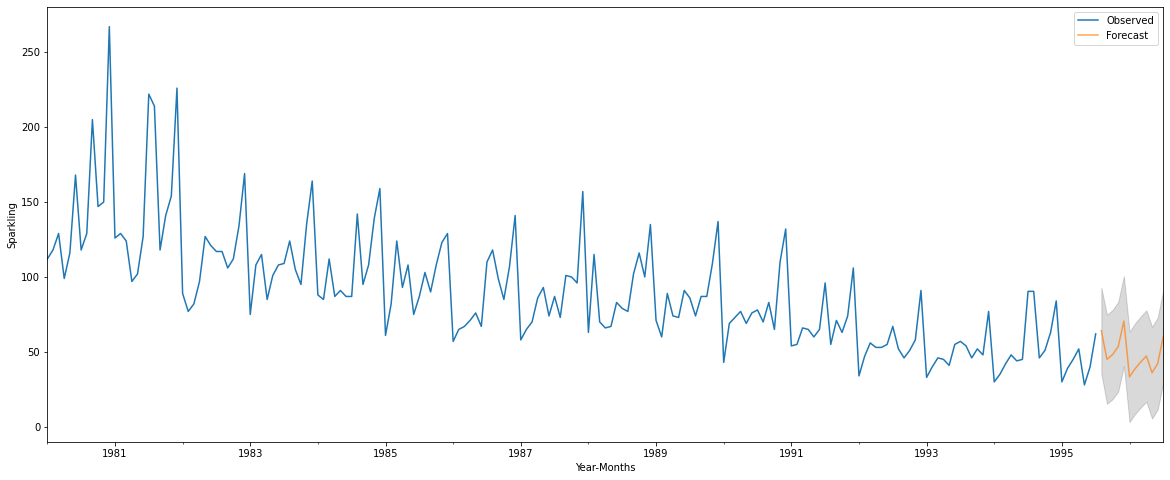

In [332]:
# plot the forecast along with the confidence band

axis = Rose['Rose'].plot(label='Observed')
pred_full_manual_SARIMA_date['mean'].plot(ax=axis, label='Forecast', alpha=0.7)
axis.fill_between(pred_full_manual_SARIMA_date.index, pred_full_manual_SARIMA_date['mean_ci_lower'], 
                  pred_full_manual_SARIMA_date['mean_ci_upper'], color='k', alpha=.15)
axis.set_xlabel('Year-Months')
axis.set_ylabel('Sparkling')
plt.legend(loc='best')
plt.show()